In [4]:
# # from termcolor import colored
# # print(colored("hello ",'blue', attrs=['bold']))
# from termcolor import coloredb
# print(colored(" \n HELLO ! <----------  file are saved in .dat format ---------->  ",'blue', attrs=['bold']))

In [5]:
# import numpy as np
# import pandas as pd

# from hamaker_calculation import hamaker_save_data

# data_path = "datac\\"
# # amp = pd.DataFrame([i for i in range(5)],columns=['amp'])
# # pizodf = pd.DataFrame([p for p in range(0,50,10)],columns=['piezo'])
# # pds = pd.DataFrame([d for d in range(6,11,1)],columns=['phase'])
# # print("all data and see\n",amp,"\n",pizodf,"\n",pds,"\n")
# amp = pd.DataFrame([i for i in range(5)])
# pizodf = pd.DataFrame([p for p in range(0,50,10)])
# pds = pd.DataFrame([d for d in range(6,11,1)])
# print("all data and see\n",amp,"\n",pizodf,"\n",pds,"\n")
# print("Data shape:\n",amp.shape,"\n",pizodf.shape,"\n",pds.shape,"\n")
# ampfilename = 'ampl.xlsx'
# phasefilename = 'phas.xlsx'
# A0 = 2
# K =5
# Q= 4
# R = 1e-3
# # hamaker_save_data(data_path, amp, pdf, pds, ampfilename, phasefilename, A0, K, Q, R)
# hamaker_save_data(data_path, amp, pizodf, pds, ampfilename, phasefilename, A0, K , Q, R )




In [6]:
import pandas as pd
import numpy as np
import os
from termcolor import colored

def hamaker_save_data(data_path, ampdf_data_nm, phasedf_degree, piezodf_data_nm, filenameAmplitude, filenamephase, A0_hamaker, K=None, Q=None, R=None):
    # Reset the indices of the DataFrames
    ampdf_data_nm = ampdf_data_nm.reset_index(drop=True)
    phasedf_degree = phasedf_degree.reset_index(drop=True)
    piezodf_data_nm = piezodf_data_nm.reset_index(drop=True)
    
    # Ensure that the DataFrames have the same length
    min_length = min(len(ampdf_data_nm), len(phasedf_degree), len(piezodf_data_nm))
    ampdf_data_nm = ampdf_data_nm[:min_length]
    phasedf_degree = phasedf_degree[:min_length]
    piezodf_data_nm = piezodf_data_nm[:min_length]
    
    # Convert values to meters and radians
    amp_df_meter = ampdf_data_nm * 1e-9
    piezo_df_meter = piezodf_data_nm * 1e-9
    phase_df_radian = np.deg2rad(phasedf_degree)
    
    # Calculate Hamaker values
    hamaker_values = ((-3 * K * A0_hamaker) / (Q * R)) * ((amp_df_meter ** 2) * np.cos(phase_df_radian)) * ((((piezo_df_meter + amp_df_meter) / amp_df_meter) ** 2) - 1) ** 1.5
    print("hamaker expected the df :\n",hamaker_values)
    hamaker_values_list = []
    avg_hamaker = np.average(hamaker_values)
    hamaker_values_list.append(avg_hamaker)

    # Create DataFrame with columns 'piezo', 'amplitude', 'phase', and 'hamaker_values'
    df = pd.DataFrame({
        'piezo_meter': piezo_df_meter.values.flatten(),
        'amplitude_meter': amp_df_meter.values.flatten(),
        'phase_degree': phasedf_degree.values.flatten(),
        'phase_radian': phase_df_radian.values.flatten(),
        'hamaker_values': hamaker_values.values.flatten()
    })

    # Create directory 'hamaker_data' if it doesn't exist
    hamaker_dir = os.path.join(data_path, 'hamaker_data')
    if not os.path.exists(hamaker_dir):
        os.makedirs(hamaker_dir)

    # Save DataFrame to Excel file in 'hamaker_data' directory
    hamaker_filename = filenameAmplitude[:-5] + filenamephase[:-5] + "hamaker.xlsx"
    excel_file_path = os.path.join(hamaker_dir, hamaker_filename)
    df.to_excel(excel_file_path, index=False)
    return avg_hamaker,hamaker_values
# Example usage
if __name__ == "__main__":
    data_path = "datac\\"
    amp = pd.DataFrame([i for i in range(2,7,1)])
    pdf = pd.DataFrame([p for p in range(1, 52, 10)])
    pds = pd.DataFrame([d for d in range(6, 11, 1)])
    # print("all data and see", amp, pdf, pds)
    ampfilename = 'ampl.xlsx'
    phasefilename = 'phas.xlsx'
    A0 = 20
    K = 50
    Q = 40
    R = 10
    res = hamaker_save_data(data_path, amp, pdf, pds, ampfilename, phasefilename, A0, K, Q, R)
    print(res[1])

hamaker expected the df :
               0
0 -1.742577e-15
1 -2.130339e-15
2 -2.534942e-15
3 -2.875087e-15
4 -3.078392e-15
              0
0 -1.742577e-15
1 -2.130339e-15
2 -2.534942e-15
3 -2.875087e-15
4 -3.078392e-15


In [7]:
# l1 = [i for i in range(1,11)]
# l1= pd.DataFrame(l1)
# avg = np.average(l1)
# print(l1,"\n \n",avg)

In [8]:
# l1 = [i for i in range(10)]
# print(l1)
# l1= {'values':l1 }
# import pandas as pd
# df_list = pd.DataFrame(l1)
# df_list = df_list *1e-2
# print("before reseting the dataframe.\n",df_list.head()  ) 
# df_list = df_list.reset_index(drop=True)
# print("After reseting the data frame:::\n",df_list.head()  ) 

# df = pd.DataFrame({
#     'value_nm': df_list
# #         'piezo_meter': piezo_df_meter,
# #         'amplitude_meter': amp_df_meter,
# #         'phase_degree': phasefrominflexion2flat_degree,
# #         'phase_rad': phase_df_radian,
# #         'hamaker_values': hamaker_values
#     })

#     # Create directory 'hamaker_data' if it doesn't exist
# #     hamaker_dir = os.path.join(data_path, 'hamaker_data')
# #     if not os.path.exists(hamaker_dir):
# #         os.makedirs(hamaker_dir)

#     # Save DataFrame to Excel file in 'hamaker_data' directory
#     # hamaker_filename = filenameAmplitude[0:-5]+filenamephase[0:-5]+'hamaker.xlsx'
    
# #     hamaker_filename = filenameAmplitude[:-5] + filenamephase[:-5]+"hamaker.xlsx"
# #     excel_file_path = os.path.join(hamaker_dir, hamaker_filename)
# excel_file_path = 'hamakernnnn.xlsx'
# df.to_excel(excel_file_path, index=True)


In [25]:
import pandas as pd
import numpy as np
import os
from termcolor import colored

def hamaker_save_data(data_path, ampdf_data_nm, phasedf_degree, piezodf_data_nm, filenameAmplitude, filenamephase, A0, K=None, Q=None, R=None):
    # Reset index for all DataFrames
    ampdf_data_nm = ampdf_data_nm.reset_index(drop=True)
    phasedf_degree = phasedf_degree.reset_index(drop=True)
    piezodf_data_nm = piezodf_data_nm.reset_index(drop=True)

    # Ensure that the DataFrames have the same length
    min_length = min(len(ampdf_data_nm), len(phasedf_degree), len(piezodf_data_nm))
    ampdf_data_nm = ampdf_data_nm[:min_length]
    phasedf_degree = phasedf_degree[:min_length]
    piezodf_data_nm = piezodf_data_nm[:min_length]

    # Convert values to meters and radians
    amp_df_meter = ampdf_data_nm * 1e-9
    piezo_df_meter = piezodf_data_nm * 1e-9
    phase_df_radian = np.deg2rad(phasedf_degree)

    # Calculate Hamaker values
    # hamaker_values = ((-3 * K * A0) / (Q * R)) * ((amp_df_meter ** 2) * np.cos(phase_df_radian)) * ((((piezo_df_meter + amp_df_meter) / amp_df_meter) ** 2) - 1) ** 1.5
    hamaker_values = ((-3 * K * A0) / (Q * R)) * ((amp_df_meter ** 2) * np.cos(phasedf_degree)) * ((((piezo_df_meter + amp_df_meter) / amp_df_meter) ** 2) - 1) ** 1.5
    avg_hamaker = np.average(hamaker_values)  # average value of hamaker dataframe

    # Create DataFrame with columns 'piezo', 'amplitude', 'phase', and 'hamaker_values'
    df = pd.DataFrame({
        'piezo_meter': piezo_df_meter.values.flatten(),
        'amplitude_meter': amp_df_meter.values.flatten(),
        'phase_degree': phasedf_degree.values.flatten(),
        'phase_radian': phase_df_radian.values.flatten(),
        'hamaker_values': hamaker_values.values.flatten()
    })

    # Create directory 'hamaker_data' if it doesn't exist
    hamaker_dir = os.path.join(data_path, 'hamaker_data')
    if not os.path.exists(hamaker_dir):
        os.makedirs(hamaker_dir)

    # Save DataFrame to Excel file in 'hamaker_data' directory
    hamaker_filename = filenameAmplitude[:-5] + filenamephase[:-5] + "hamaker.xlsx"
    excel_file_path = os.path.join(hamaker_dir, hamaker_filename)
    df.to_excel(excel_file_path, index=False)

    return hamaker_filename, avg_hamaker, hamaker_values

# Example usage
if __name__ == "__main__":
    data_path = "datac\\"
    amp = pd.DataFrame([i for i in range(1,6)])
    pdf = pd.DataFrame([p for p in range(0, 50, 10)])
    pds = pd.DataFrame([d for d in range(6, 11, 1)])
    print("all data and see", amp, pdf, pds)
    ampfilename = 'ampl.xlsx'
    phasefilename = 'phas.xlsx'
    A0 = 100
    K = 5
    Q = 4
    R = 1
    res_hamaker = hamaker_save_data(data_path, amp, pdf, pds, ampfilename, phasefilename, A0, K, Q, R)
    print(res_hamaker)


all data and see    0
0  1
1  2
2  3
3  4
4  5     0
0   0
1  10
2  20
3  30
4  40     0
0   6
1   7
2   8
3   9
4  10
('amplphashamaker.xlsx', 7.753257268972359e-18,               0
0 -1.371784e-16
1  1.169308e-16
2 -6.650851e-17
3 -3.010443e-17
4  1.556268e-16)


In [ ]:
# import pandas as pd
# import numpy as np
# x= list(range(1,10))
# y=list(range(11,20))
# A= pd.DataFrame(x)
# piezo = pd.DataFrame(x)
# phi = pd.DataFrame(y)
# print("size of x and y : \t",A.shape,phi.shape)
# K = 2.56
# Q = 234
# R = 10*10E-9
# A0 = 11
# df4 = ((-3*K*A0)/(Q*R))*((A**2 )*np.cos(phi))*(((piezo+A)/A)**2 -1)**1.5   
# # df4 = np.cos(x)+np.sin(y)
# df4
# print("value in rad in degre  :",2*x/3)

In [ ]:
# piezoa=piezo.set_axis(['Amplitude'],axis='columns')
# print(piezoa)
# data_endamp = piezoa.shape[0]
# print("rows",data_endamp)
# x = piezoa['Amplitude'][data_endamp-1]
# x

In [ ]:
import numpy as np
# x= list(range(5))
# x = np.array(x)
# print(x,type(x))
# # print(x)
# y = np.flipud(x)
# print(y,type(y))


In [9]:
x = int(input("enter x"))
y = int(input("enter y"))
z = x/y
print(z,"and ",int(z))

ValueError: invalid literal for int() with base 10: ''

In [ ]:

# def add(num1 =x,Num2= None ):
#     num1 =x
#     Num2 =y
#     return num1+Num2 

# add(num1=x,Num2=None)

In [ ]:
# import numpy as np
# # Sample data representing the change in y-values
# dy = np.array([0.1, 0.2, 0.05, 0.03, 0.002, 0.001, 0.0015, 0.0005, 0.0, -0.001, -0.003])
# print(dy)
# # Threshold for slope
# slope_threshold = 0.01
# # Find the index where the change in y-values becomes less than the threshold
# starting_point_index = np.where(np.abs(dy) < slope_threshold)
# print(starting_point_index)
# starting_point_index = np.where(np.abs(dy) < slope_threshold)[0][0]
# # Print the result
# print("Index of the starting point of flat region:", starting_point_index)

In [ ]:
# import pandas as pd
# dataex1 = {"fruit": ['banana','apple','nashpati','pomograned','guavava'],"vege" :['potato','cauli','spinich','tomato','onion']}
# dataex1pd = pd.DataFrame(dataex1)
# dataex1pd

In [ ]:
# dataex1pd = np.arange(8)
# dataex1pd

In [ ]:
# dataex1pd = np.array(dataex1pd)
# print(dataex1pd,"<------- org array")
# fliparray = np.flipud(dataex1pd)
# print("----->flipeed  ",fliparray)
# fliparray = fliparray[1:3]

In [ ]:
# dataex1pd
# list = []
# print(list)
# for val in dataex1pd:
# #     print(val,end='- "ho" - ')
#     list.append(val)
#     print(list)
# print(list)
# list= []
# print("Reset --> !! ",list)

In [ ]:
# # fliparray
# x1 = np.ones(3)/3
# x1 = x1.astype(float)
# x1

In [10]:
""" <-------------------  this is the code tested for the inflexion point of the noisy data ------------> """

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# def detect_inflexion_pointAfterAverage(values, consecutive_decreases):
#     values
    
    
#     num_decreases = 0
#     inflexion_index = None

#     for i in range(1, len(values)):
#         if values[i] < values[i-1]:  # Check if the current value is less than the previous one
#             num_decreases += 1
#             if num_decreases >= consecutive_decreases:
# #                 inflexion_index = i - consecutive_decreases + 1
# #                 inflexion_index_afterAverage = i - consecutive_decreases    # (<- it should be 1 less, index start from zero in actual.)
#                 inflexion_index_afterAverage = i - consecutive_decreases + 1   # (<- it should be 1 less, index start from zero in actual.)
#                 break
#         else:
#             num_decreases = 0  # Reset the count if the values start increasing again

#     return inflexion_index_afterAverage

# # Example usage:
# values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6]
# consecutive_decreases = 5
# inflexion_index = detect_inflexion_pointAfterAverage(values, consecutive_decreases)
# y=values[inflexion_index]
# print("Inflexion index:", inflexion_index)
# plt.plot(values)
# plt.scatter(inflexion_index,y)

' <-------------------  this is the code tested for the inflexion point of the noisy data ------------> '

In [12]:
# import numpy as np
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# excelpath = "E:\\python_programs\\xlsfileprocess\\dataproblem\\"

# comp_datapathAmp = os.path.join(excelpath,'Amplitude28.xlsx')
# comp_datapathPhase = os.path.join(excelpath,'phase28.xlsx')

# ampdf   = pd.read_excel(comp_datapathAmp)
# phasedf = pd.read_excel(comp_datapathPhase)

# #  < ----------- changing the column name (set index) from x,y to Piezo, Amplitude and Phase 
# ampdf= ampdf.set_axis(['Piezo','Amplitude'], axis ='columns')
# # print(ampdf.head())
# # print("\n ",ampdf.shape)

# phasedf= phasedf.set_axis(['Piezo','Phase'], axis ='columns')
# # print("\n",phasedf.head(),"\n",phasedf.shape,"\n")
# #  < ----------- Above changed the column name(set index) from x,y to Piezo, Amplitude and Phase 

# ampdfAmplitudeColumn = np.array(ampdf['Amplitude'])    # convert to numpy array
# ampdfPiezoColumn = np.array(ampdf['Piezo'])   # convert to numpy array
# slicingStartIndex = 4   

# # ampdfAmplitudeColumn = ampdfAmplitudeColumn[slicingStartIndex:zero_orFlatAmp]
# # ampdfAmplitudeColumn = ampdfAmplitudeColumn[slicingStartIndex:zero_orFlatAmp]

# # ampdfAmplitudeColumnSliced = ampdfAmplitudeColumn[slicingStartIndex:]
# # ampdfPiezoColumnSliced = ampdfPiezoColumn[slicingStartIndex:]

# reversed_ampdfAmplitudeColumn = np.flipud(ampdfAmplitudeColumn)
# # ampdfPiezoColumnSliced = ampdfPiezoColumn

# # print(" the shape and size of the amplitude array before the np.diff: (4:dataendpoint) \n",reversed_ampdfAmplitudeColumn.shape)
# x = ampdfPiezoColumn
# y = reversed_ampdfAmplitudeColumn
# # original_array = y
#   # Window size for difference calculation
# last_index_ampdf = y.shape[0]
# # col_ampdfAmp = y.shape[1]

# diff_window = 5
# avg_window = 10 
# list_avg_windowSize = []
# count_window = 0
# list_avg = []
# count_listavgEntry = 0

# for val in y:
#     count_window =count_window + 1
#     list_avg_windowSize.append(val)
# #     print(list_avg_windowSize,end=' ') 
#     if len(list_avg_windowSize)== avg_window:
# #         print(list_avg_windowSize)
#         count_listavgEntry +=1
#         avg_ofwindowsizeElements = sum(list_avg_windowSize)/avg_window
# #         print(avg_ofwindowsizeElements,end =' ,')
#         list_avg.append(avg_ofwindowsizeElements)
        
#         list_avg_windowSize = []   # here list is reset
# #         print(" to check the size of the is it reset or not -->!!!",len(list_avg_windowSize))
        
    
# #     print(list_avg_windowSize)

# print("\n counts 979:",count_window)
# print("here we can see the another list: of 5 in pair one")
# print("\n size of the pair of window size",len(list_avg))

# values = list_avg
# consecutive_decreases = diff_window
# inflexion_index_afterAverage = detect_inflexion_pointAfterAverage(values, consecutive_decreases)
# y=values[inflexion_index_afterAverage]
# print("Inflexion index:", inflexion_index_afterAverage)
# plt.plot(values)
# plt.scatter(inflexion_index_afterAverage,y)
# plt.show()

# # <---------------- now Calculate the original index for that resversed Array and then conver back that point in Straight array also ----> 
# inflexion_index_afterAverage_startZero =  inflexion_index_afterAverage-1
# index_Actual_reverseArray = ((inflexion_index_afterAverage_startZero+ 1)* avg_window) - avg_window + 1 
# index_Actual_Array = last_index_ampdf - index_Actual_reverseArray + 1
# final_Actual_index =  index_Actual_Array -1

# y_actual = ampdfAmplitudeColumn[final_Actual_index]
# x_scatter =x[final_Actual_index] 
# # plt.figure
# plt.plot(x,ampdfAmplitudeColumn,'-y')
# plt.scatter(x_scatter,y_actual,marker ='*',s=150, label='Data(nm)')
# plt.title(" it is final ")
# plt.show()
# # plt.plot(x,y)
# # plt.scatter(starting_x_value,y_start_value,marker ='*',label='Data(nm)')


In [ ]:
# import numpy as np 
# list = np.arange(10)
# print(list)
# x = list.shape[0]
# print(x)

In [ ]:
# import os
# data_path =  "E:\\python_programs\\xlsfileprocess\\dataproblem\\"
# def listxlsFiles(data_path):
#     listOfFiles = os.listdir(data_path)
#     # print(listOfFiles)
#     amp_seperate_list = []
#     phase_seperate_list = []
#     for file in listOfFiles:
#         if file[-5:] =='.xlsx':
#             if file[0:9] =="Amplitude":
#                 print("amplitude:",file[9:-5])
#                 num_Subscript = file[9:-5]
#                 amp_seperate_list.append(file)
#                 for file in listOfFiles:
#                     if file[0:5] == "phase" and num_Subscript == file[5:-5]:
#                         print("for pahse:",file[5:-5])
#                         phase_seperate_list.append(file)
#     print("\n",amp_seperate_list,"\n length of the amp list -->",len(amp_seperate_list))
#     print("\n",phase_seperate_list,"\n length of the phase list -->",len(phase_seperate_list))
#     l1= amp_seperate_list
#     l2= phase_seperate_list
#     return l1,l2


In [13]:
# amp_inOrder,Phase_inOrder = listxlsFiles(data_path)  

In [ ]:
# import pandas as pd
# import numpy as np 
# def readASdfsetaxisAmpasnp(data_path,filenameAmplitude,filenamephase): 

#     # from inflexionMinimadownbump import findDownBump 
#     # excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
# #     excel_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\"
#     # excel_path = "E:\\python_programs\\xlsfileprocess\\"
#     excel_path = data_path
# #     filenameAmplitude = 'Amplitude40.xlsx'
#     ampdf = pd.read_excel(excel_path+filenameAmplitude)
#     ampdf = ampdf.set_axis(['Piezo','Amplitude'],axis='columns')
#     print(ampdf.head(),"\n")
#     #  ------------------------- phase -------------------- > 
# #     filenamephase = 'phase40.xlsx' 
#     phasedf = pd.read_excel(excel_path+filenamephase)
#     phasedf = phasedf.set_axis(['Piezo','Phase'],axis='columns')
#     print(phasedf.head(),"\n")
#     print(ampdf.shape)
#     # x= nm  , y= nA
#     # <--------------------------- these two points are used later data_endamp and ampdfPiezoColumn  >
#     data_endamp = ampdf.shape[0]
#     print("end data points = \n",data_endamp)

#     ampdfPiezoColumnarr = np.array(ampdf['Piezo'])  # name chnaged to ampdfPiezoColumn from to ampdfPiezoColumnarr
# #     print()
# #     ampdfAmplitudeColumn = np.array(ampdf['Amplitude'])
#     ampdfAmplitudeColumnarr = np.array(ampdf['Amplitude'])
    
#     return  (ampdf,phasedf,data_endamp,ampdfPiezoColumnarr,ampdfAmplitudeColumnarr) 

amplitude: 118 | pahse: 118
amplitude: 121 | pahse: 121
amplitude: 122 | pahse: 122
amplitude: 123 | pahse: 123
amplitude: 124 | pahse: 124
amplitude: 125 | pahse: 125
amplitude: 131 | pahse: 131
amplitude: 134 | pahse: 134
amplitude: 135 | pahse: 135
amplitude: 136 | pahse: 136
amplitude: 137 | pahse: 137
amplitude: 138 | pahse: 138
amplitude: 139 | pahse: 139
amplitude: 140 | pahse: 140
amplitude: 141 | pahse: 141
amplitude: 143 | pahse: 143
amplitude: 144 | pahse: 144
amplitude: 145 | pahse: 145

 ['Amplitude118.xlsx', 'Amplitude121.xlsx', 'Amplitude122.xlsx', 'Amplitude123.xlsx', 'Amplitude124.xlsx', 'Amplitude125.xlsx', 'Amplitude131.xlsx', 'Amplitude134.xlsx', 'Amplitude135.xlsx', 'Amplitude136.xlsx', 'Amplitude137.xlsx', 'Amplitude138.xlsx', 'Amplitude139.xlsx', 'Amplitude140.xlsx', 'Amplitude141.xlsx', 'Amplitude143.xlsx', 'Amplitude144.xlsx', 'Amplitude145.xlsx'] 
 length of the amp list --> 18

 ['phase118.xlsx', 'phase121.xlsx', 'phase122.xlsx', 'phase123.xlsx', 'phase124.xl

<Figure size 640x480 with 0 Axes>

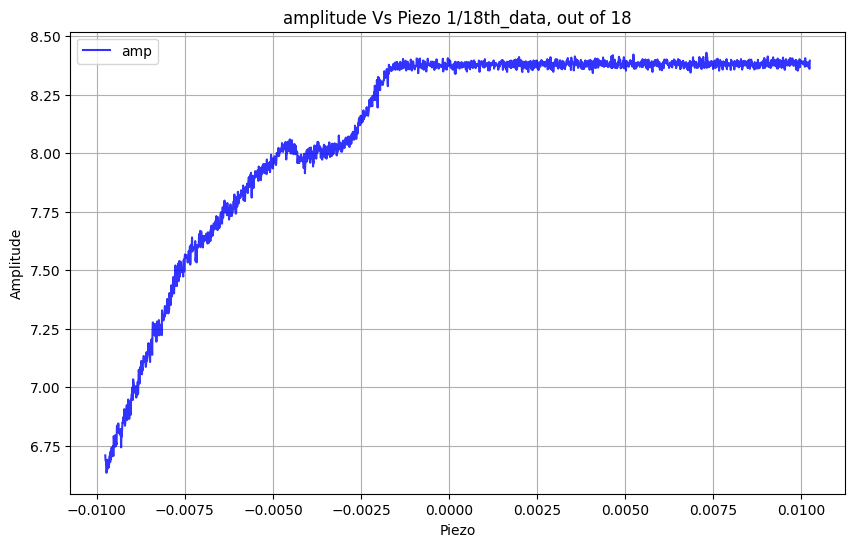

<Figure size 640x480 with 0 Axes>

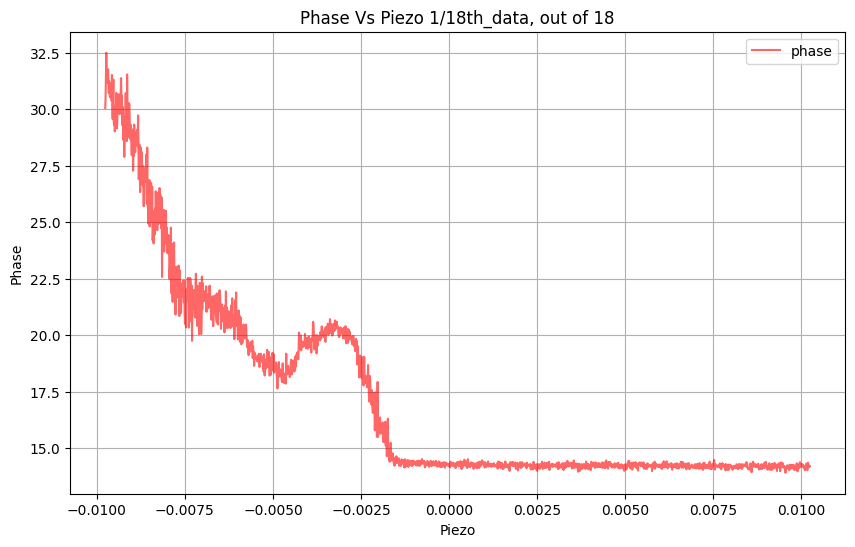

piezo array range:0.019999847307779817, no_of_points_IN_onedatafile:1998 and individual file file_no.:1
<------------------------!!!!-----------------------------> 8.189419956189091 8.377910789512725
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 26 <-->
Inflexion index: 26


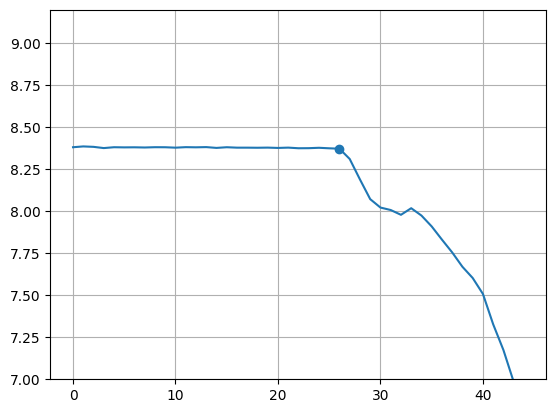

 this the actual index from where we get flat amplitude almost ! -->  897


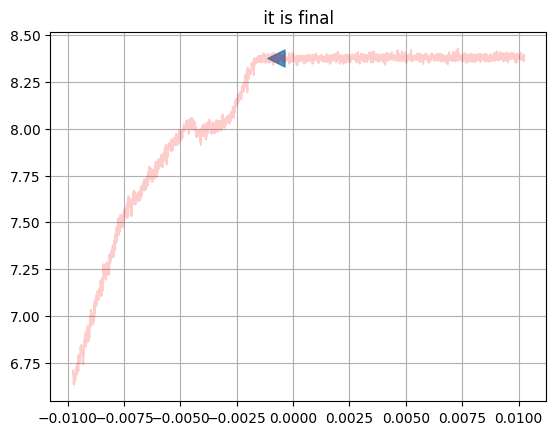

897
-0.0007765188587190594
The shape and size of the amplitude array before the np.diff: (4:data endpoint)
 (893,)
x values
 and shape of x  4   -0.00972
5   -0.00971
6   -0.00970
7   -0.00969
8   -0.00968
Name: Piezo, dtype: float64 (893,)
I am inside the array: function array
: [0.00639638 0.00625956 0.0061285  0.00600321 0.0058837  0.00576996
 0.00566198 0.00555978 0.00546335 0.00537269]
longest sequence =
 [523, 524, 526, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 547, 548, 549, 550, 551, 554, 555]
x axis=
 [-0.00448205 -0.00447203 -0.004452   -0.00443197 -0.00442196 -0.00441194
 -0.00440193 -0.00439191 -0.0043819  -0.00437188 -0.00436187 -0.00435185
 -0.00434184 -0.00433182 -0.00432181 -0.00431179 -0.00430178 -0.00429176
 -0.00428175 -0.00427174 -0.00426172 -0.00424169 -0.00423168 -0.00422166
 -0.00421165 -0.00420163 -0.00417159 -0.00416157]
scat val x: 	 
 523
scat val y: 	 
 -0.0018464808478562134


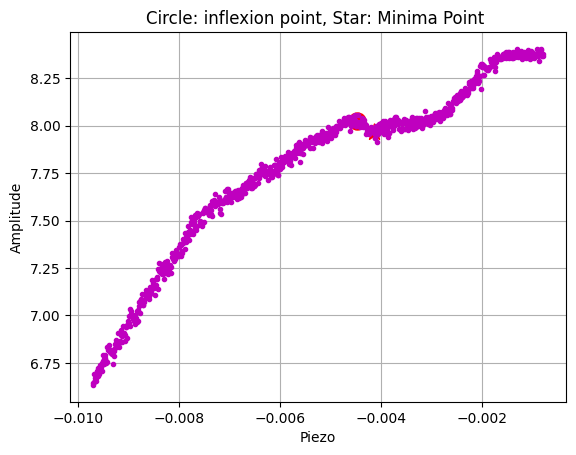

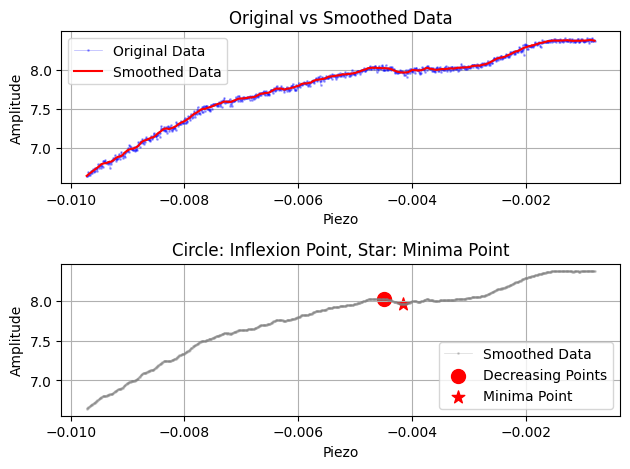


 Actual inflexion point Index with original data:  527 
 Actual Minima point Index before Slicing with original Data:  560 
 Inflexion point index after slicing:  523 
 smoothed array of same size as input in the filter here just see the size:  (893,) 
 Minima point Index After slicing:  556

 index_inflexion ----------> 527

 index_minima ----------> 560
n count back =  400.0

 index starting wrto inflexion :  127 
 index starting wrto Minima :  160
m (slope in nA/nm ): for 1 file data 0.20298037336420655
c, zero intercept nA (intercept): for 1 file data 9.00939747552224


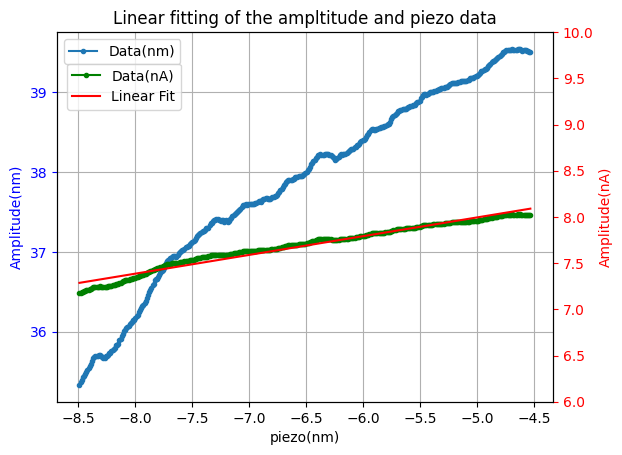

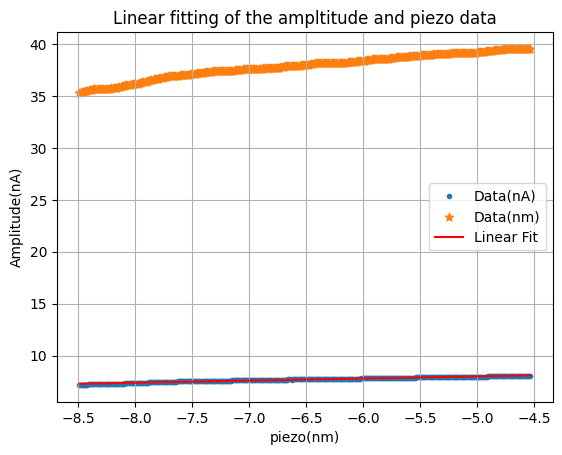

127   -8.488027
128   -8.478012
129   -8.467997
130   -8.457982
131   -8.447968
Name: Piezo, dtype: float64


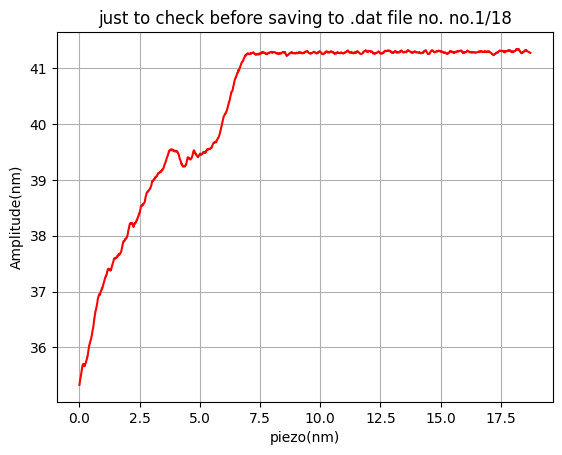

30.350296278359338

 (1998,)

 new phase values: 
 0   -106.150813
1   -106.649533
2   -107.015967
3   -107.264737
4   -107.410461
Name: Phase, dtype: float64


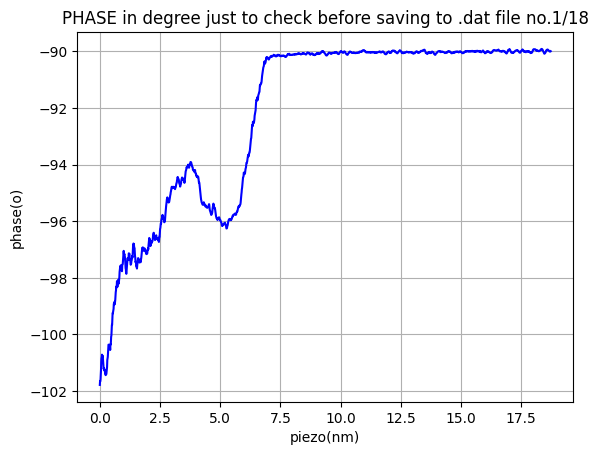

Directory 'processdata\' already exists.

 (1871,) 
 (1871,) 
 (1871,)
Below this is before reverse and scientific notation and deletion: 
             Piezo     Amplitude       Phase
127  0.000000e+00  3.533024e-08 -101.781818
128  1.001495e-11  3.536955e-08 -101.641219
129  2.002989e-11  3.539237e-08 -101.653092
130  3.004484e-11  3.542660e-08 -101.588012
131  4.005978e-11  3.544151e-08 -101.433193
without heading or column index next we will see with index: 
                 piezo        amplitude             phase
1997  1.872794916E-08  4.127145283E-08  -9.000000000E+01
1996  1.871793421E-08  4.127302386E-08  -9.000892048E+01
1995  1.870791926E-08  4.127479770E-08  -9.001350466E+01
1994  1.869790432E-08  4.127675177E-08  -9.001431944E+01
1993  1.868788937E-08  4.127886353E-08  -9.001193175E+01
after final procees:
              piezo        amplitude             phase
0  1.872794916E-08  4.127145283E-08  -9.000000000E+01
1  1.871793421E-08  4.127302386E-08  -9.000892048E+01
2  1.87

ValueError: If using all scalar values, you must pass an index

In [1]:
# this is main program start here ------------>

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import os
from termcolor import colored
import logging  

from listxlsfilesinOrder import listxlsFiles
from converdfSetAxisgetNumpyArray import readASdfsetaxisAmpasnp
from plotmatlabfun import plot_data
from reverseArrayOfAvgWindow import reverseArrayofAvgValuesWndsize
from detect_inflexiondy_dxZero import detect_inflexion_pointAfterAverage
from final_index_calculation import findActualInflexion
import average_windowsize as avgws
import inflexionMinimadownbump as smfitbp 
import fitselectdataRange1bymfind as fitsmoothsave
from savefiledf2dat import filesaveDatain_dat
from potential_force import potential_force_algo
from hamaker_calculation import hamaker_save_data
from hamaker_avgvalueeachfile import  save_avg_hamaker
from energy_dissipationEdiss import energy_dissipation


# data_path =  "dataproblem\\curvesongold\\"
# data_path =  "dataproblem\\old_data\\"
# data_path =  "dataproblem\\curvesonproteins2\\"  
data_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\"

point_density_OLd = 8910.417881801475  # corresponds to avg_windowsize = 4.
avg_windowsize = 4 
# Configure logging
logfilename = "file_process.log"
logfileData_Path = data_path+logfilename
logging.basicConfig(filename=logfileData_Path, level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

amp_inOrder,Phase_inOrder = listxlsFiles(data_path)
sameNo_of_amp_phase_length = min(len(amp_inOrder),len(Phase_inOrder))
TotalFiles_processed = 0
filter_saveData = 1  # keep it 1 if you want to save the filtered or smoothed data.

# avg_windowsize = calculate_avg_wndsize(data_path,sameNo_of_amp_phase_length,amp_inOrder,Phase_inOrder,point_density_OLd,avg_windowsize)
# print(f"---------------------------------------------------------------------------------------- calculated window size ,4: {avg_windowsize}") 

for i in range(sameNo_of_amp_phase_length):
    filenameAmplitude = amp_inOrder[i]
    filenamephase = Phase_inOrder[i]
    file_No = i+1     
    print("\n",f"<----- IN process with files {filenameAmplitude} and {filenamephase} and file No. {file_No} -------->")

    print("\n",f"I am dealing with file = {file_No}.")
#     readASdfsetaxisAmpasnp(data_path,filenameAmplitude,filenamephase)
    print(f"I have read and converted the data in dataframe and numpy array and no of row in amp as data_endamp for file {i+1} named as {filenameAmplitude} and {filenamephase}.")
    res = readASdfsetaxisAmpasnp(data_path,filenameAmplitude,filenamephase)
    ampdf = res[0]        # ampdf is two column dataframe with title: ['Piezo','Amplitude'] piezo(um) and Amplitude(nA) 
    phasedf = res[1]      # phasedf is two column dataframe with title: ['Piezo','Phase']
    data_endamp = res[2]   #  total length of ampdf, index of the last value is --> data_endamp-1
    ampdfPiezoColumnarr = res[3]  # it is single column Piezo numpy array  only
    ampdfAmplitudeColumnarr = res[4]    # it is single column  amplitude numpy array only
    A0 = res[5]    # A0 is the last value of the ampdf Amplitude  ***********  check for A0 values if this is in m . I think it is in nA here.

    plt.figure()
    plot_data(ampdf,label='amp',color='blue', marker='', markersize=1,alpha=0.8,title=f"amplitude Vs Piezo {i+1}/{sameNo_of_amp_phase_length}th_data, out of {sameNo_of_amp_phase_length}",Xaxis="Piezo",Yaxis='Amplitude')
    plt.show()
    plt.figure()
    plot_data(phasedf,label='phase',color='red', marker='', markersize=1,alpha=0.6,title=f"Phase Vs Piezo {i+1}/{sameNo_of_amp_phase_length}th_data, out of {sameNo_of_amp_phase_length}",Xaxis="Piezo",Yaxis='Phase')
    plt.show()
    
    # ------------ *********** here add a function to calculate the avg_window size for each file individually.
    
    avg_windowsize1 = avgws.calculate_avg_wndsize_Individual_filewise(ampdfPiezoColumnarr,file_No,point_density_OLd,avg_windowsize)
    avg_window = avg_windowsize1  # 7,4(more general)  # ******************
        
    list_avg = reverseArrayofAvgValuesWndsize(ampdf,phasedf,avg_window)  # list_avg -> reversed numpy array.
#     plt.figure()
#     plot_data(list_avg,label=f"avg of {avg_window} ",title=f"avg plot of reverse {avg_window} data points for {i+1} file")
#     plt.show()
    
    consecutive_decrease_windowsize = 3   #6,6(3,6 more general)
    index = detect_inflexion_pointAfterAverage(ampdf,list_avg,consecutive_decrease_windowsize) 
    inflexion_After_avg =  index
    print("index of inflexion point w.r.to the average list(i.e. in list_avg) :",inflexion_After_avg,"<-->")
    final_Actual_index = findActualInflexion(inflexion_After_avg,list_avg,data_endamp,avg_window,ampdfAmplitudeColumnarr,ampdfPiezoColumnarr,want_plot=1)
#     final_Actual_index = findActualInflexion(inflexion_After_avg,list_avg,data_endamp,avg_window,ampdfAmplitudeColumnarr,ampdfPiezoColumnarr)
    zero_orFlatAmp = final_Actual_index    #  this the actual index from where we get flat amplitude almost,,after bump Flat region start.
    print(zero_orFlatAmp )
    print(ampdf.iloc[final_Actual_index,0])
    
    # <--------- it is for the finding the downbump in the actual data ... >
    res_indices = smfitbp.findDownBump(ampdf, zero_orFlatAmp, window_length=30, polyorder=3)
    index_inflexion = res_indices[0]
    print("\n index_inflexion ---------->",index_inflexion)
    index_minima = res_indices[1]
    print("\n index_minima ---------->",index_minima)
    smoothed_array = res_indices[4]  # it returned the smoothed array after filtering.
    
    backward_MinimaBump_nmValue = 4.0
    forward_MinimaBump_nmValue = 10.0 
    
#     (ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,phasedata2savedegree)

    if filter_saveData == 1:
        try: 
            res_m = fitsmoothsave.find1bymcampdfandfit_smmothData(ampdf,phasedf,backward_MinimaBump_nmValue,forward_MinimaBump_nmValue,res_indices,data_endamp,i,zero_orFlatAmp,sameNo_of_amp_phase_length,part2 =None)
    #         res_m = find1bymcampdfandfit(ampdf,phasedf,backward_MinimaBump_nmValue,forward_MinimaBump_nmValue,res_indices,data_endamp,i,zero_orFlatAmp,part2 =None)
            # result_data2save => 
            """ 
            ampdata2saveAspiezo_nm, --------> piezo data in nm from index_inflexion: to dataselect1(zero_orFlatAmp).
            ampdata2saveAsAmplitude_nm, ----> ampdf amplitude data after converting(*1/m) to nm from desired_nmBackIndexwrtoInflexion: to data_choose_endindex(dataendamp)
            phasedata2savedegree, ----------> phase data saved in degree desired_nmBackIndexwrtoInflexion: to data_choose_endindex(dataendamp)
            ampfrominflexion2flat_nm, ------> amplitude from from index_inflexion: to dataselect1(zero_orFlatAmp)
            phasefrominflexion2flat_degree,-> phase from from index_inflexion: to dataselect1(zero_orFlatAmp)
            piezofrominflexion2flat_nm -----> piezo from from index_inflexion: to dataselect1(zero_orFlatAmp)
            m slope in nA/nm  --> do 1/m then become in nm/nA  then can change the ampdf any time from any range to any range.

            """ 
            ampdata2saveAspiezo_nm = res_m[0]           
            ampdata2saveAsAmplitude_nm = res_m[1]
            phasedata2savedegree = res_m[2]
            ampfrominflexion2flat_nm = res_m[3]   # <-- use for hamaker constant 
            phasefrominflexion2flat_degree = res_m[4]  # < -- use for hamaker constant
            piezofrominflexion2flat_nm = res_m[5]   # <--- use for piezo in hamaker constant
            slop_m = res_m[6]  #  do 1/m then become in nm/nA  then can change the ampdf any time from any range to any range
        except Exception as e:
            # Log the error along with the filename
            logging.error(f"Error:occured in function: find1bymcampdfandfit() and loop no:{i+1} and Error occurs in files with names:{filenameAmplitude} and {filenamephase} '{data_path}': {str(e)}")
            continue

#     if without_filter_originalsaveData == 1:
    else:
        try:
            res_m = fitsmoothsave.find1bymcampdfandfit(ampdf,phasedf,backward_MinimaBump_nmValue,forward_MinimaBump_nmValue,res_indices,data_endamp,i,zero_orFlatAmp,sameNo_of_amp_phase_length,part2 =None)
            # result_data2save => 
            """ 
            ampdata2saveAspiezo_nm, --------> piezo data in nm from index_inflexion: to dataselect1(zero_orFlatAmp).
            ampdata2saveAsAmplitude_nm, ----> ampdf amplitude data after converting(*1/m) to nm from desired_nmBackIndexwrtoInflexion: to data_choose_endindex(dataendamp)
            phasedata2savedegree, ----------> phase data saved in degree desired_nmBackIndexwrtoInflexion: to data_choose_endindex(dataendamp)
            ampfrominflexion2flat_nm, ------> amplitude from from index_inflexion: to dataselect1(zero_orFlatAmp)
            phasefrominflexion2flat_degree,-> phase from from index_inflexion: to dataselect1(zero_orFlatAmp)
            piezofrominflexion2flat_nm -----> piezo from from index_inflexion: to dataselect1(zero_orFlatAmp)
            m slope in nA/nm  --> do 1/m then become in nm/nA  then can change the ampdf any time from any range to any range.

            """ 
            ampdata2saveAspiezo_nm = res_m[0]
            ampdata2saveAsAmplitude_nm = res_m[1]
            phasedata2savedegree = res_m[2]
            ampfrominflexion2flat_nm = res_m[3]   # <-- use for hamaker constant 
            phasefrominflexion2flat_degree = res_m[4]  # < -- use for hamaker constant
            piezofrominflexion2flat_nm = res_m[5]   # <--- use for piezo in hamaker constant
            slop_m = res_m[6] 
        except Exception as e:
                # Log the error along with the filename
                logging.error(f"Error:occured in function: find1bymcampdfandfit() and loop no:{i+1} and Error occurs in files with names:{filenameAmplitude} and {filenamephase} '{data_path}': {str(e)}")
                continue    
        
        
    
    fdata_path = data_path
    directory_name = "processdata\\"
    directory_path = os.path.join(fdata_path,directory_name)
    if not os.path.exists(directory_path):
        # If not, create the directory
        os.makedirs(directory_path)
        print(f"Directory '{directory_name}' created successfully.")
    else:
        print(f"Directory '{directory_name}' already exists.")
    # here ampdata2saveAspiezo_m is in nm and ampdata2saveAsAmplitude_nm this is also in nm.
    filename_res = filesaveDatain_dat(directory_path,ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,phasedata2savedegree,filenameAmplitude,filenamephase,hamakerConstant = None,A0 = None)

    #  filename_res  from return (filename,filenamehawmaker) 

#     filesaveDatain_dat(directory_path,piezofrominflexion2flat_nm,ampfrominflexion2flat_nm ,phasefrominflexion2flat_degree,filenameAmplitude,filenamephase,hamakerConstant = 1,A0 = A0)
    
#     print("\n",f"<--------------- process is completed with files {filenameAmplitude} and {filenamephase} and file sequence No. {i+1}.------------------------------>")
    
#     potential_force_algo(directory_path,filename_res) 
# K=32.125 Q=442
    ampdata2saveAsAmplitude_converted2meter = ampdata2saveAsAmplitude_nm * 1e-9  # last value in ampdf converted to m  
    # Access the last value and assign to A0_hamaker
    A0_hamaker = ampdata2saveAsAmplitude_converted2meter.iloc[-1] 
    
    # hamaker_save_data(data_path, ampfrominflexion2flat_nm, phasefrominflexion2flat_degree, piezofrominflexion2flat_nm, filenameAmplitude, filenamephase, A0 = A0_hamaker, K = 26.98, Q = 466, R =10 * 10E-9)  # A0 = A0_hamaker(meter).  # this will calculate hamaker from inflexion(just before bump) to zero_flatAmp 

    res_hamaker = hamaker_save_data(data_path, ampfrominflexion2flat_nm, phasedata2savedegree, ampdata2saveAspiezo_nm, filenameAmplitude, filenamephase, A0 = A0_hamaker, K = 26.98, Q = 466, R =10 * 10E-9)  # A0 = A0_hamaker(meter). # hamaker constant from inflexion to end of dataframe (endAmp) 
    # these nm value of amp,phase and piezo changed in the meter inside the hamaker_save_data() function.
    # save_avg_hamaker(data_path, res_hamaker[0], res_hamaker[1], output_filename ='all_avg_hamaker.xlsx')  # average_hamaker values for each file --> res_hamker[1] , this is hamaker file name --> res_hamaker[0]

    TotalFiles_processed = TotalFiles_processed + 1
    print(f"<--! file saved and hawmaker constant caluclation processed file no out of:{TotalFiles_processed}/{sameNo_of_amp_phase_length}  ! ---------------->")
    
    # energy_dissipation(data_path, ampfrominflexion2flat_nm, phasefrominflexion2flat_degree, piezofrominflexion2flat_nm, filenameAmplitude, filenamephase, A0, K = 2.56, Q = 234)  # energy dessipation from inflexion(just before bump) to zero_flatAmp.
    energy_dissipation(data_path, ampfrominflexion2flat_nm, phasedata2savedegree, ampdata2saveAspiezo_nm, filenameAmplitude, filenamephase, A0 = A0_hamaker, K = 26.98, Q = 466)  # energy dessipation from inflexion to end of dataframe (endAmp) 
    
    print(f"<--! file saved and energy dissipation is done and processed file no out of:{TotalFiles_processed}/{sameNo_of_amp_phase_length}  ! ---------------->")
    
    

In [41]:
# #  A0_hamaker = 1e-9*ampdata2saveAsAmplitude_nm[-1]
ampdata2saveAsAmplitude_nm
# ampdata2saveAsAmplitude_m = ampdata2saveAsAmplitude_nm * 1e-9

# # Access the last value and assign to A0_hamaker
# A0_hamaker = ampdata2saveAsAmplitude_m.iloc[-1] 
# # type(A0_hamaker)
# A0_hamaker/1000
# print(res_hamaker)

127     35.330242
128     35.369552
129     35.392369
130     35.426597
131     35.441506
          ...    
1993    41.278864
1994    41.276752
1995    41.274798
1996    41.273024
1997    41.271453
Name: Amplitude, Length: 1871, dtype: float64

In [14]:
directory_path= "E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\processdata\\"
directory_path

'E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\processdata\\'

In [1]:
# # path  = os.path.join(data_path,processdata)
# # force_Filepath = data
# directory_path  # it will be the complete path of our process data files.
# import os
# import pandas
# import numpy as np
# import math
# from scipy.integrate import quad
# import matplotlib.pyplot as plt


# pi_val = math.pi
# c_z = 2.756  # --> it is in N/m spring constant , he was using 40
# # c_z = 2.756e-9   # now in N/nm spring constant
# fd = 72.7163e3
# f0 = 72.7163e3
# D_min = min(df['piezo'])
# Qfactor = 241
# # aexc = max(A) / Qfactor 
# # aexc = 220e-9/Qfactor

# def Kvalue(A_i, P_i):
#     """
#     call the function in a loop, it will calculate the
#     k value for each phase and amplitude value taken from the each data file.
#     """
#     k = (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
#     return k

# # ********* code for potential U integration ***********
# # import numpy as np

# def integration(A_i, P_i):
#     k = (0.5) * ((aexc / A_i) * (math.cos((P_i * pi_val) / 180)) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    
#     def u(t):  ## Define the integrand function
#         return (4 * c_z * k * (t ** 3 + ((((A_i) * (t ** 2)) / 16 * pi_val) ** 0.5) + ((((A_i) ** 3) ** 0.5) / ((2) ** 0.5))))
    
#     integral_value, error = quad(u, 0.001, 10e12, weight='cauchy', wvar=0)
    
# #     integral_value, error = quad(u, 0, np.inf, weight='cauchy', wvar=0)
# #     integral_value, error = quad(u, 0, np.inf)   # this is working 1st.
#     #  print("The value of the integral and error is:", integral_value,error)
#     #     print(integral_value,error)
#     return integral_value

# print("------------****** Integration is done ------------******\n ")
# # ********* code for writing data in the file ***********


# #*************** force using k expression.**********

# def Force_integrating_K(A_i, P_i):
#     def k_exp(zeta = c_z):
#         return (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))*(2*zeta)
#     integral_value, error = quad(k_exp, D_min, 10, weight='cauchy', wvar=0)
#     #     integral_value, error = quad(u, 0, np.inf, weight='cauchy', wvar=0)
# #     integral_value, error = quad(u, 1, np.inf)   # this is working 1st.
#     #     print("The value of the integral and error is:", integral_value,error)
# #     print(integral_value,error)
#     return integral_value



# listDatfiles = os.listdir(directory_path)
# count = 0 
# for file in listDatfiles:
#     count +=1
#     df = pd.read_csv(directory_path+file,delimiter=' ')
#     print(" read the .dat file processed \n",df.head(5))
#     p = df['phase']  # p phase is a vector
#     A = df['amplitude']
#     aexc = max(A) / Qfactor 
#     # Apply the Kvalue function to the DataFrame
#     df['kval'] = df.apply(lambda row: Kvalue(row['amplitude'], row['phase']), axis=1)
    
#     print(df.head(5))
    
#     if count == 1:
#         break
# #     res_kvaluesout = Kvalue(A,p)
# #     print(res_kvaluesout)
# #     if count ==1:
# #         break
    
    


Directory 'processpotential\' already exists.
Read the .dat file processed 
           piezo     amplitude      phase
0  1.872795e-08  4.127145e-08 -90.000000
1  1.871793e-08  4.127302e-08 -90.008920
2  1.870792e-08  4.127480e-08 -90.013505
3  1.869790e-08  4.127675e-08 -90.014319
4  1.868789e-08  4.127886e-08 -90.011932
          piezo     amplitude      phase  near_distance       K_value  \
0  1.872795e-08  4.127145e-08 -90.000000  -2.254350e-08  1.272546e-19   
1  1.871793e-08  4.127302e-08 -90.008920  -2.255509e-08 -3.235502e-07   
2  1.870792e-08  4.127480e-08 -90.013505  -2.256688e-08 -4.897996e-07   
3  1.869790e-08  4.127675e-08 -90.014319  -2.257885e-08 -5.193262e-07   
4  1.868789e-08  4.127886e-08 -90.011932  -2.259097e-08 -4.327092e-07   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.545092e-18  4.676182e+20       2.063558e+33  -2.289888e+43  
1  -6.471004e-06 -1.188939e+33       1.798252e+33  -2.182029e+43  
2  -9.795992e-06 -1.799850e+33       

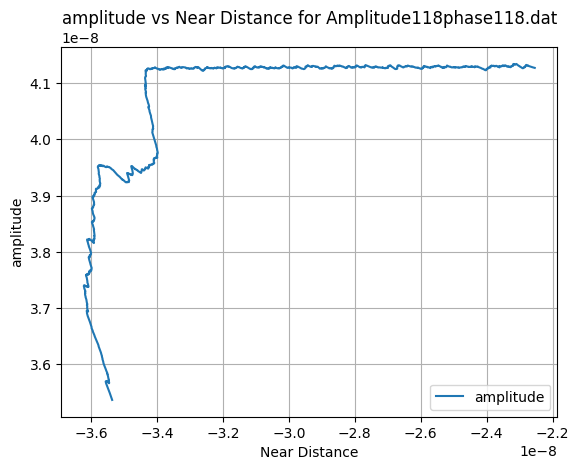

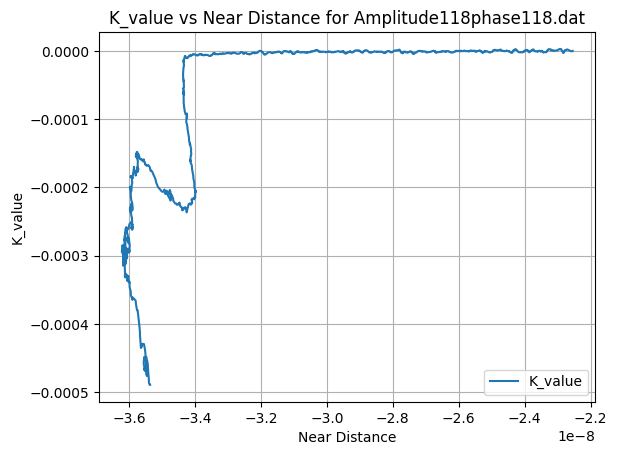

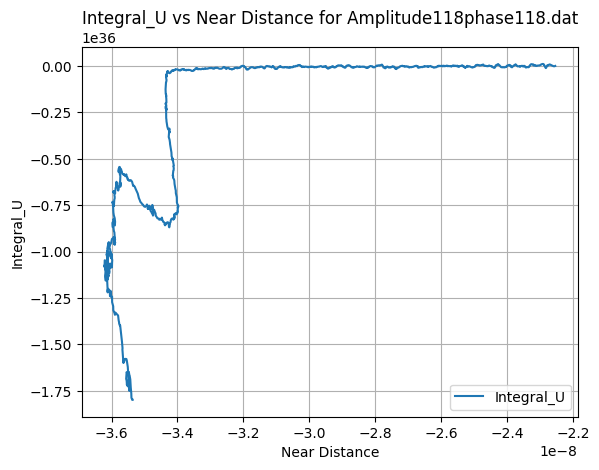

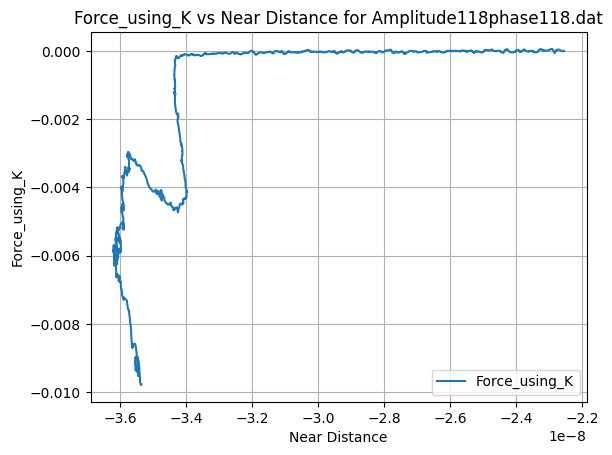

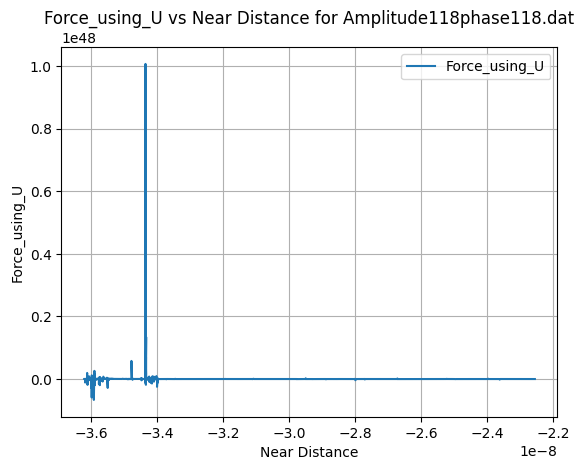

Read the .dat file processed 
           piezo     amplitude      phase
0  1.999985e-08  1.415409e-08 -90.000000
1  1.998983e-08  1.415273e-08 -90.038799
2  1.997982e-08  1.415185e-08 -90.068201
3  1.996980e-08  1.415142e-08 -90.089190
4  1.995979e-08  1.415137e-08 -90.102749
          piezo     amplitude      phase  near_distance       K_value  \
0  1.999985e-08  1.415409e-08 -90.000000   5.845761e-09  1.271569e-19   
1  1.998983e-08  1.415273e-08 -90.038799   5.837106e-09 -1.406351e-06   
2  1.997982e-08  1.415185e-08 -90.068201   5.827966e-09 -2.472263e-06   
3  1.996980e-08  1.415142e-08 -90.089190   5.818386e-09 -3.233212e-06   
4  1.995979e-08  1.415137e-08 -90.102749   5.808414e-09 -3.724750e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.543139e-18  4.672594e+20      -8.774833e+33  -2.132188e+43  
1  -2.812701e-05 -5.167869e+33      -8.959365e+33  -2.021053e+43  
2  -4.944526e-05 -9.084743e+33      -9.133364e+33  -1.805679e+43  
3  -6.466425e-05

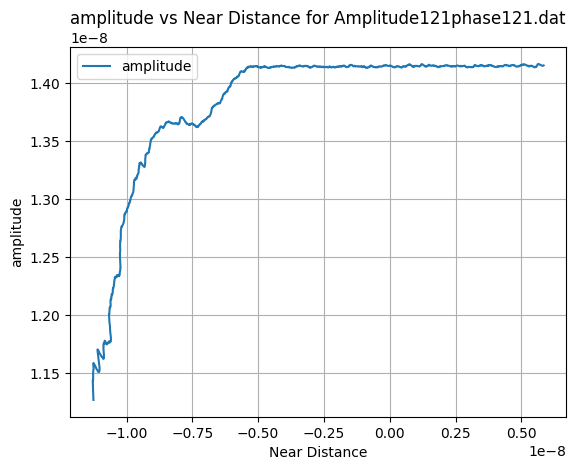

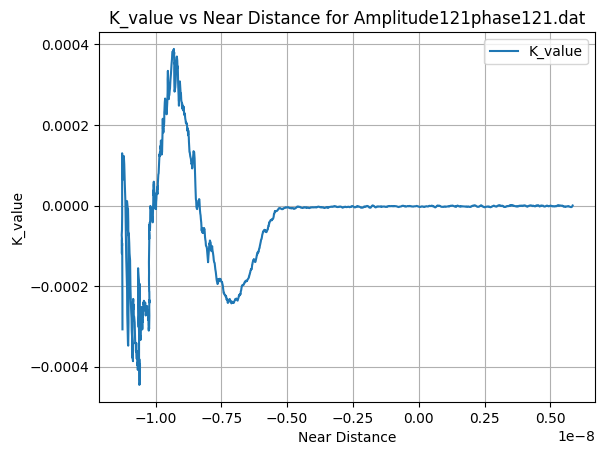

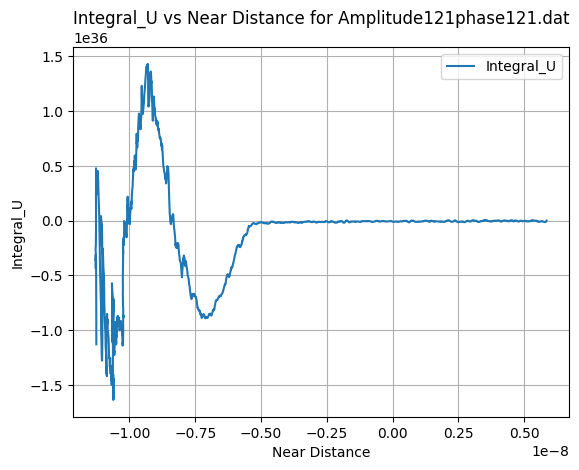

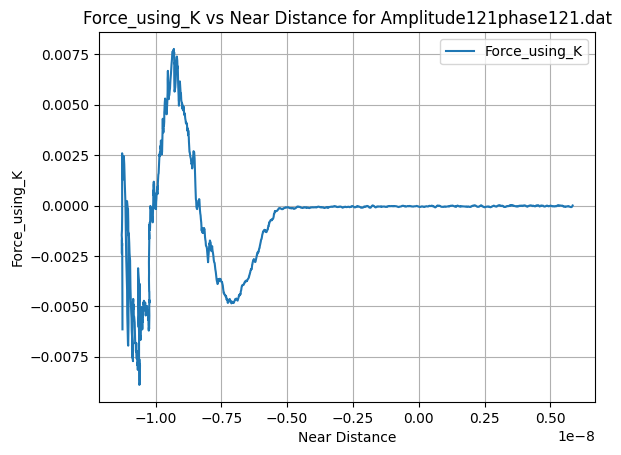

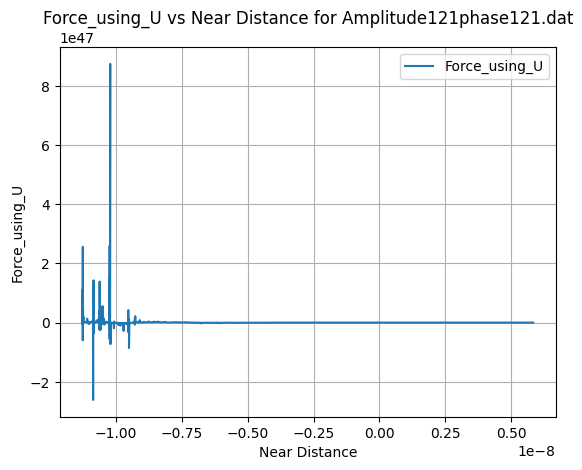

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  3.209870e-08 -90.000000
1  1.796418e-08  3.208322e-08 -89.937249
2  1.795517e-08  3.206972e-08 -89.889178
3  1.794616e-08  3.205811e-08 -89.854274
4  1.793714e-08  3.204827e-08 -89.831023
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  3.209870e-08 -90.000000  -1.412551e-08  1.270380e-19   
1  1.796418e-08  3.208322e-08 -89.937249  -1.411904e-08  2.273311e-06   
2  1.795517e-08  3.206972e-08 -89.889178  -1.411456e-08  4.016496e-06   
3  1.794616e-08  3.205811e-08 -89.854274  -1.411196e-08  5.283440e-06   
4  1.793714e-08  3.204827e-08 -89.831023  -1.411112e-08  6.128303e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.540761e-18  4.668225e+20       1.446927e+34  -8.714472e+43  
1   4.546622e-05  8.353660e+33       1.503309e+34  -1.035268e+44  
2   8.032991e-05  1.475928e+34       1.554777e+34  -1.559024e+44  
3   1.056688e-04

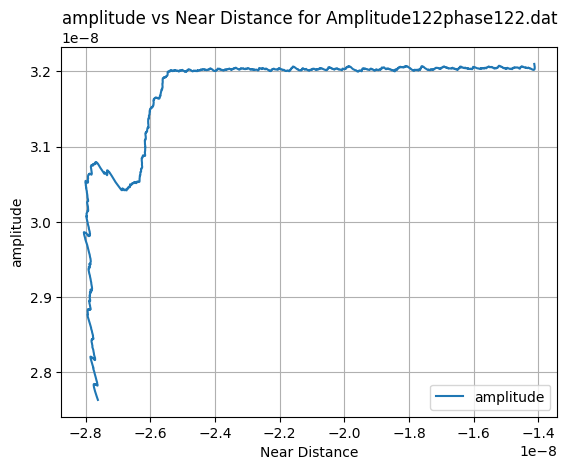

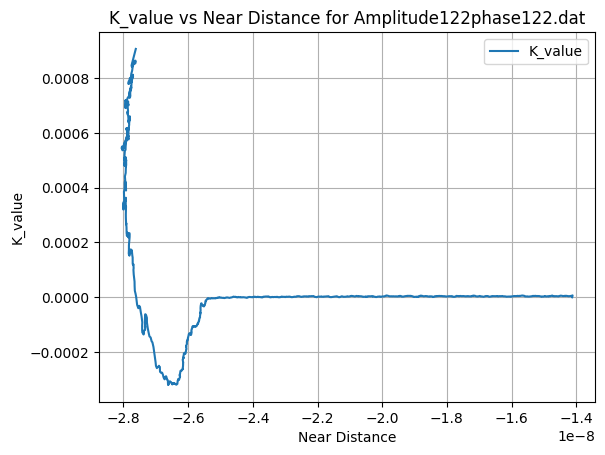

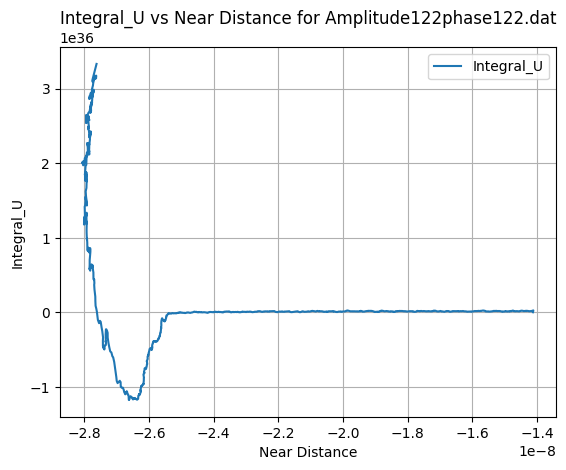

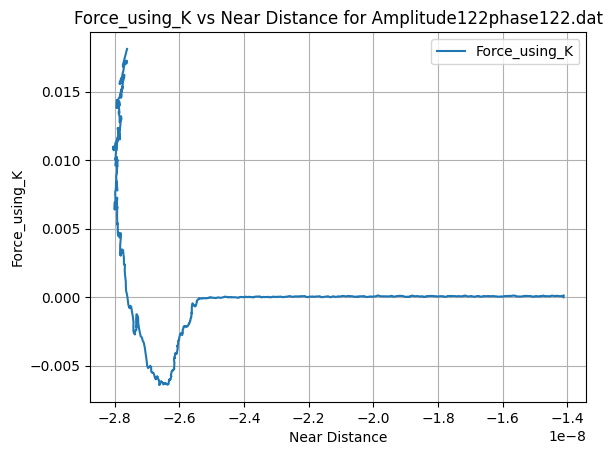

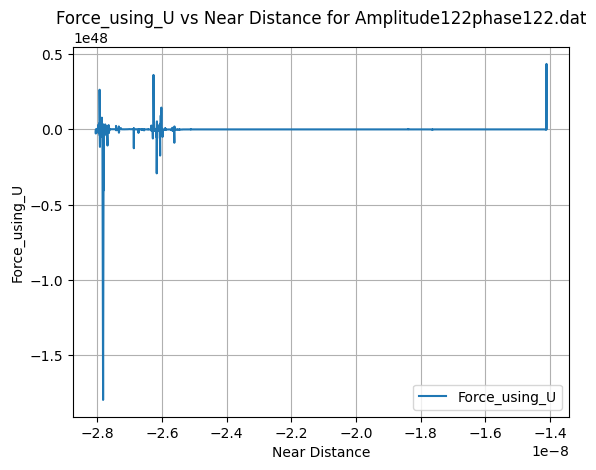

Read the .dat file processed 
           piezo     amplitude      phase
0  1.772983e-08  2.423799e-08 -90.000000
1  1.772081e-08  2.424251e-08 -89.968494
2  1.771180e-08  2.424676e-08 -89.942272
3  1.770279e-08  2.425075e-08 -89.920912
4  1.769377e-08  2.425450e-08 -89.903989
          piezo     amplitude      phase  near_distance       K_value  \
0  1.772983e-08  2.423799e-08 -90.000000  -6.508164e-09  1.273697e-19   
1  1.772081e-08  2.424251e-08 -89.968494  -6.521693e-09  1.143619e-06   
2  1.771180e-08  2.424676e-08 -89.942272  -6.534957e-09  2.095032e-06   
3  1.770279e-08  2.425075e-08 -89.920912  -6.547967e-09  2.869756e-06   
4  1.769377e-08  2.425450e-08 -89.903989  -6.560730e-09  3.483285e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.547394e-18  4.680412e+20       5.935553e+33   8.515983e+43  
1   2.287239e-05  4.202420e+33       7.087637e+33   8.388306e+43  
2   4.190065e-05  7.698546e+33       8.183706e+33   8.129791e+43  
3   5.739513e-05

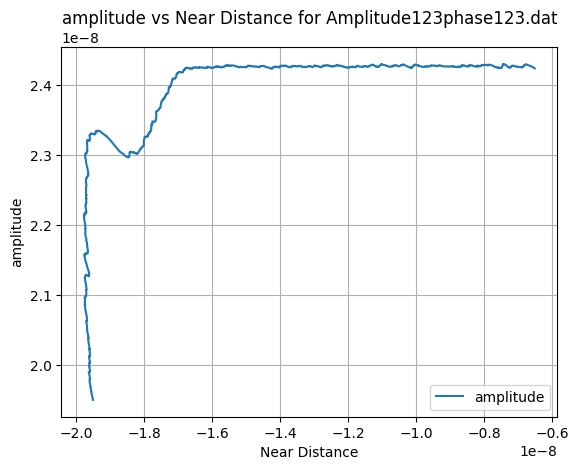

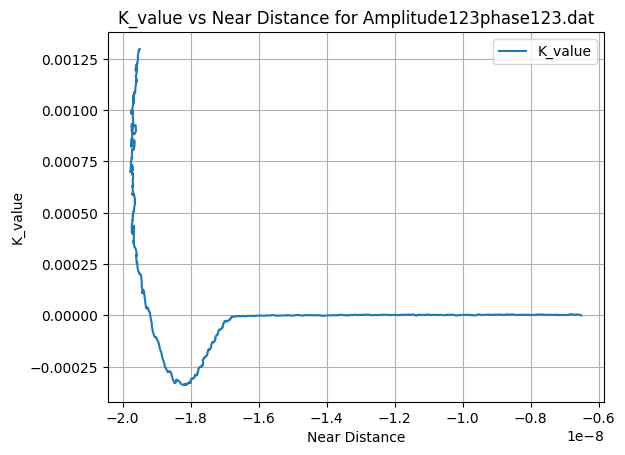

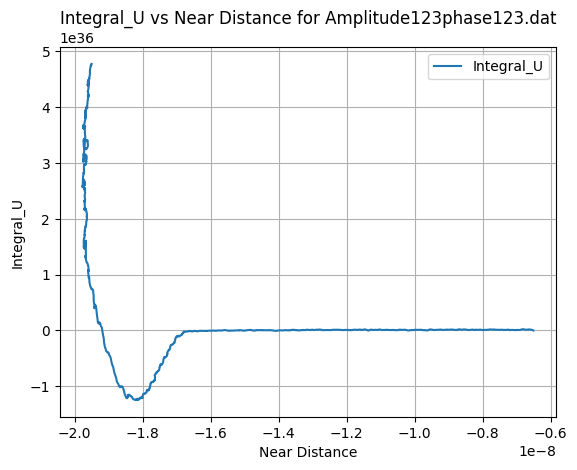

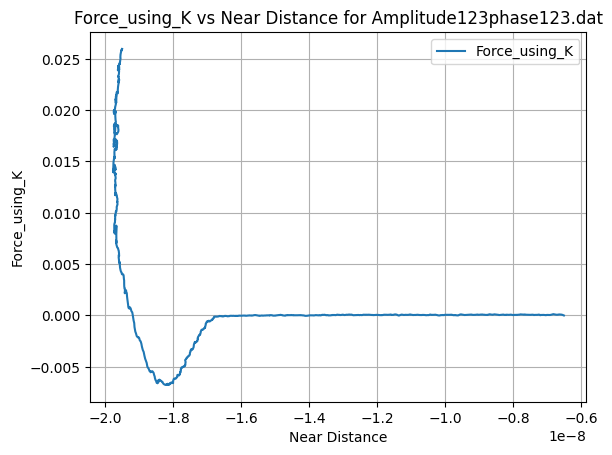

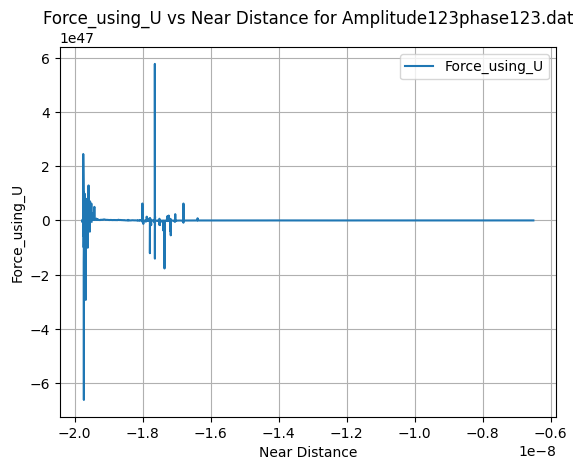

Read the .dat file processed 
           piezo     amplitude      phase
0  1.643186e-08  2.645405e-08 -90.000000
1  1.642285e-08  2.645357e-08 -90.002865
2  1.641384e-08  2.645261e-08 -90.005320
3  1.640482e-08  2.645121e-08 -90.007460
4  1.639581e-08  2.644944e-08 -90.009381
          piezo     amplitude      phase  near_distance       K_value  \
0  1.643186e-08  2.645405e-08 -90.000000  -1.002218e-08  1.270380e-19   
1  1.642285e-08  2.645357e-08 -90.002865  -1.003072e-08 -1.037335e-07   
2  1.641384e-08  2.645261e-08 -90.005320  -1.003877e-08 -1.926485e-07   
3  1.640482e-08  2.645121e-08 -90.007460  -1.004639e-08 -2.701737e-07   
4  1.639581e-08  2.644944e-08 -90.009381  -1.005363e-08 -3.397382e-07   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.540761e-18  4.668225e+20      -1.906845e+32  -4.073929e+43  
1  -2.074669e-06 -3.811859e+32      -5.384543e+32  -4.100976e+43  
2  -3.852970e-06 -7.079189e+32      -8.707249e+32  -4.144143e+43  
3  -5.403473e-06

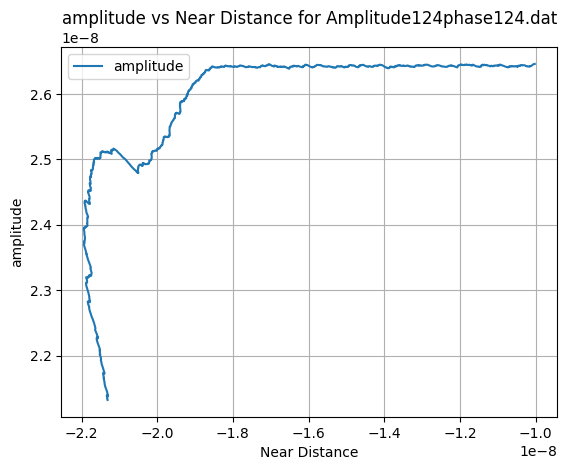

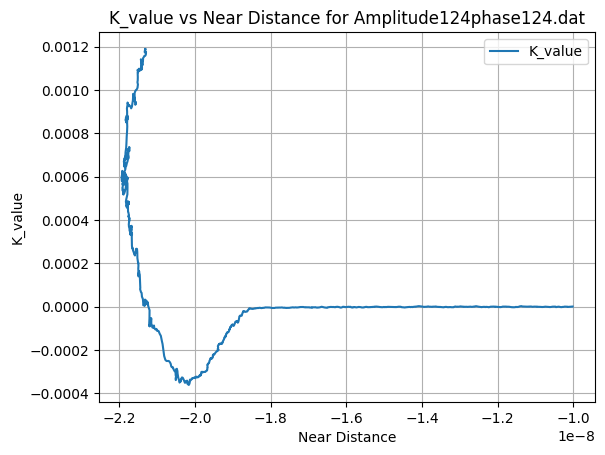

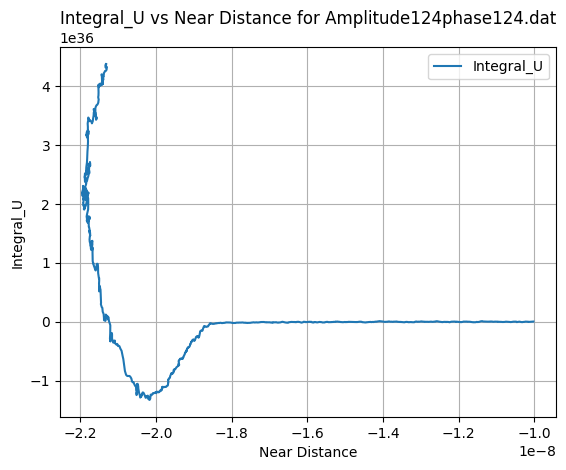

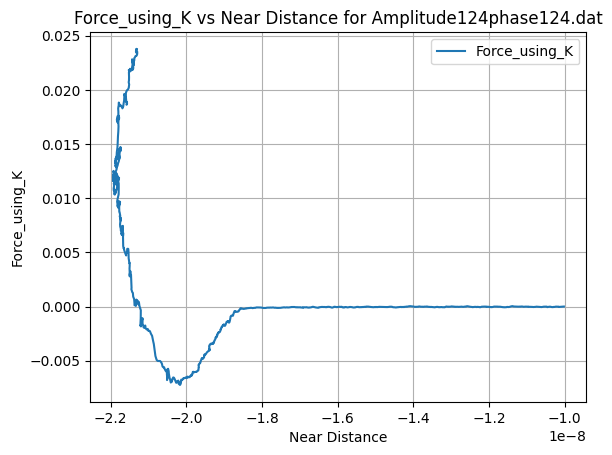

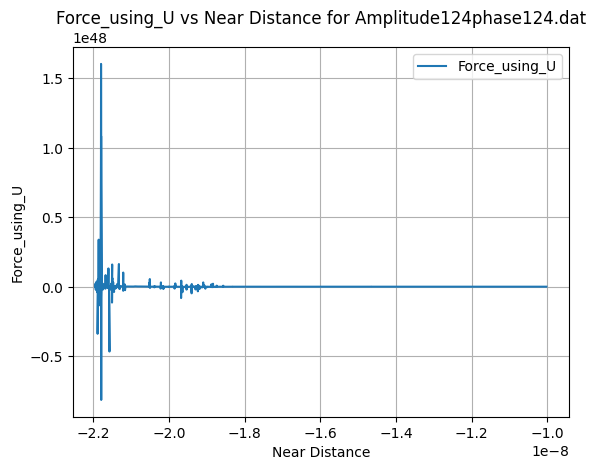

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  3.230468e-08 -90.000000
1  1.796418e-08  3.231730e-08 -90.010815
2  1.795517e-08  3.232819e-08 -90.019165
3  1.794616e-08  3.233747e-08 -90.025301
4  1.793714e-08  3.234524e-08 -90.029475
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  3.230468e-08 -90.000000  -1.433148e-08  1.273310e-19   
1  1.796418e-08  3.231730e-08 -90.010815  -1.435311e-08 -3.923506e-07   
2  1.795517e-08  3.232819e-08 -90.019165  -1.437302e-08 -6.950510e-07   
3  1.794616e-08  3.233747e-08 -90.025301  -1.439132e-08 -9.173434e-07   
4  1.793714e-08  3.234524e-08 -90.029475  -1.440810e-08 -1.068431e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.546620e-18  4.678989e+20      -1.482634e+33  -2.032163e+43  
1  -7.847012e-06 -1.441758e+33      -1.922175e+33  -2.006522e+43  
2  -1.390102e-05 -2.554081e+33      -2.316986e+33  -1.952137e+43  
3  -1.834687e-05

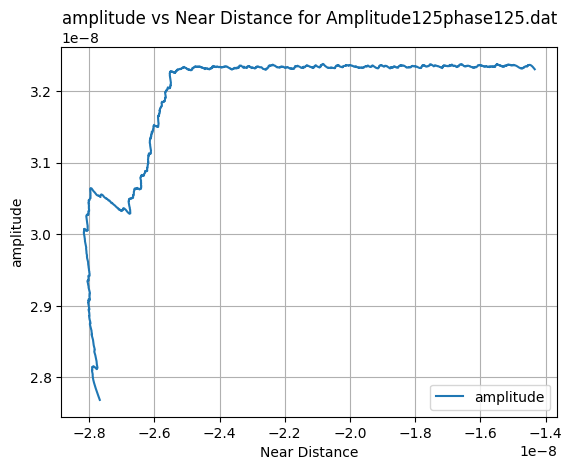

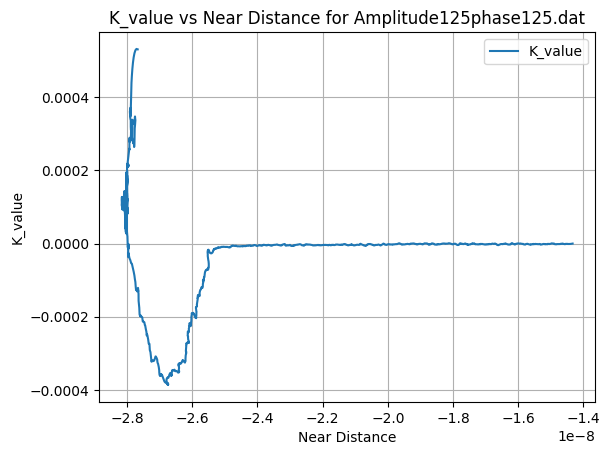

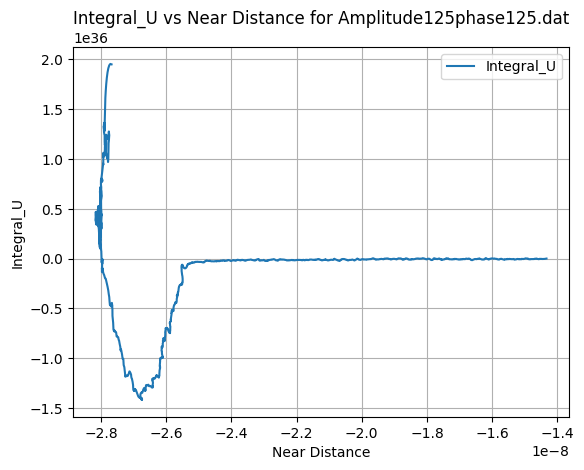

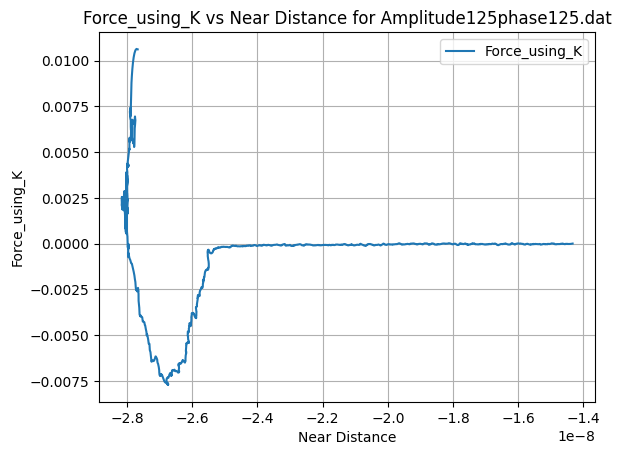

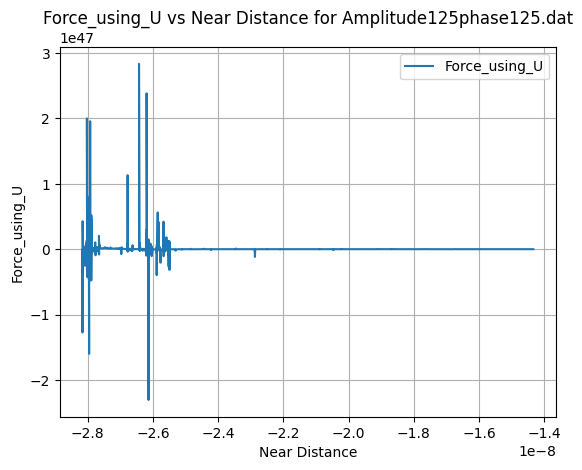

Read the .dat file processed 
           piezo     amplitude      phase
0  1.599988e-08  3.737062e-08 -90.000000
1  1.599187e-08  3.738348e-08 -89.975361
2  1.598385e-08  3.739448e-08 -89.954969
3  1.597584e-08  3.740371e-08 -89.938609
4  1.596783e-08  3.741130e-08 -89.926063
          piezo     amplitude      phase  near_distance       K_value  \
0  1.599988e-08  3.737062e-08 -90.000000  -2.137074e-08  1.272760e-19   
1  1.599187e-08  3.738348e-08 -89.975361  -2.139162e-08  8.935520e-07   
2  1.598385e-08  3.739448e-08 -89.954969  -2.141062e-08  1.632590e-06   
3  1.597584e-08  3.740371e-08 -89.938609  -2.142787e-08  2.225185e-06   
4  1.596783e-08  3.741130e-08 -89.926063  -2.144347e-08  2.679349e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.545520e-18  4.676968e+20       7.104220e+33  -1.531662e+42  
1   1.787104e-05  3.283506e+33       7.072239e+33  -1.436106e+42  
2   3.265180e-05  5.999225e+33       7.046598e+33  -1.238895e+42  
3   4.450371e-05

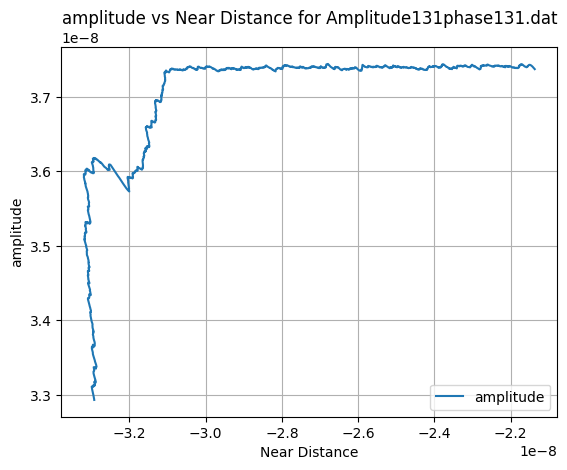

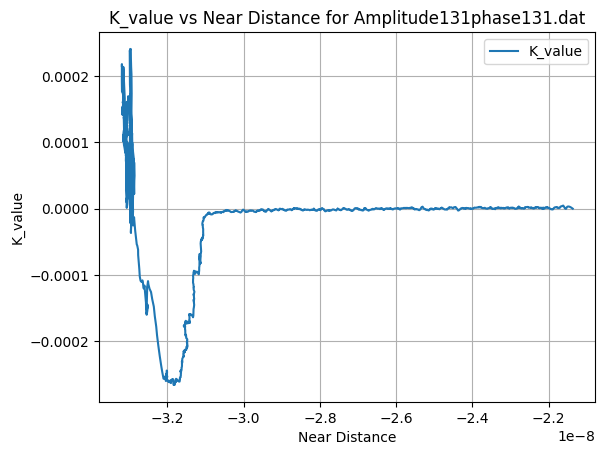

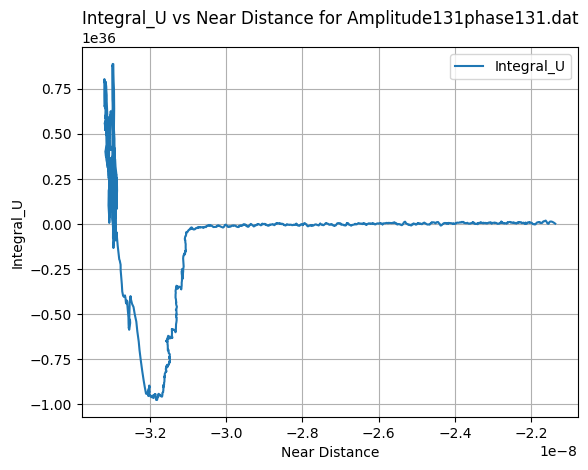

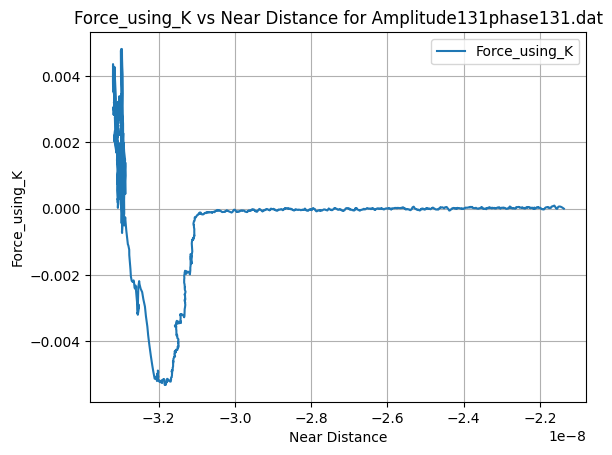

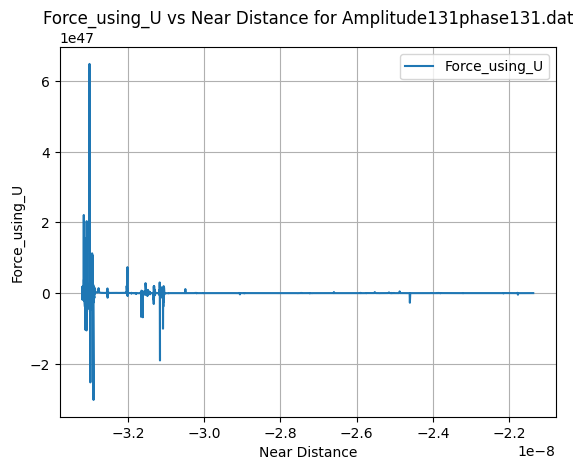

Read the .dat file processed 
           piezo     amplitude      phase
0  1.788306e-08  2.285229e-08 -90.000000
1  1.787405e-08  2.286188e-08 -90.020794
2  1.786503e-08  2.286904e-08 -90.033620
3  1.785602e-08  2.287397e-08 -90.039506
4  1.784701e-08  2.287687e-08 -90.039480
          piezo     amplitude      phase  near_distance       K_value  \
0  1.788306e-08  2.285229e-08 -90.000000  -4.969226e-09  1.271807e-19   
1  1.787405e-08  2.286188e-08 -90.020794  -4.987830e-09 -7.534709e-07   
2  1.786503e-08  2.286904e-08 -90.033620  -5.004003e-09 -1.217844e-06   
3  1.785602e-08  2.287397e-08 -90.039506  -5.017946e-09 -1.430755e-06   
4  1.784701e-08  2.287687e-08 -90.039480  -5.029860e-09 -1.429640e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.543613e-18  4.673465e+20      -5.579868e+33   6.048852e+43  
1  -1.506942e-05 -2.768754e+33      -4.454508e+33   6.212874e+43  
2  -2.435688e-05 -4.475170e+33      -3.426633e+33   6.539670e+43  
3  -2.861510e-05

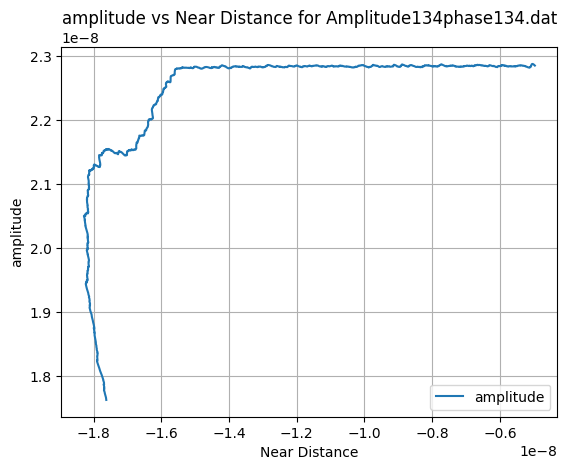

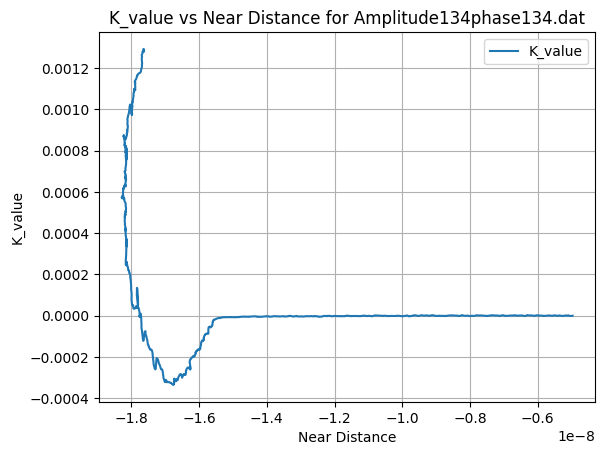

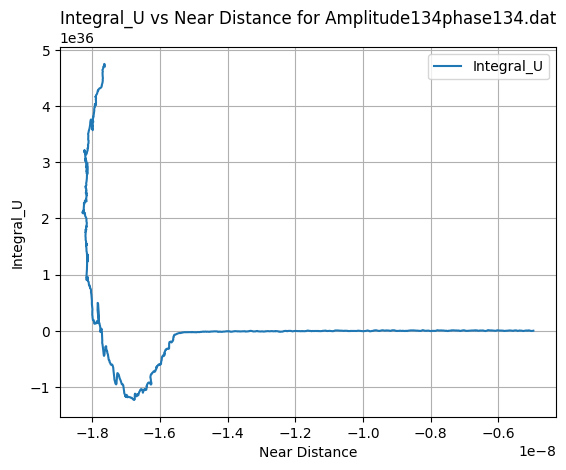

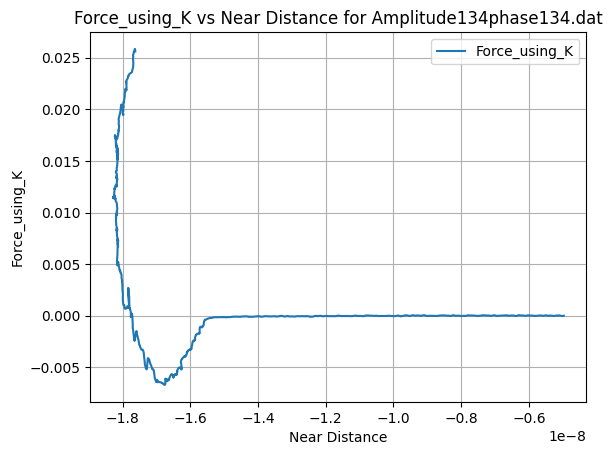

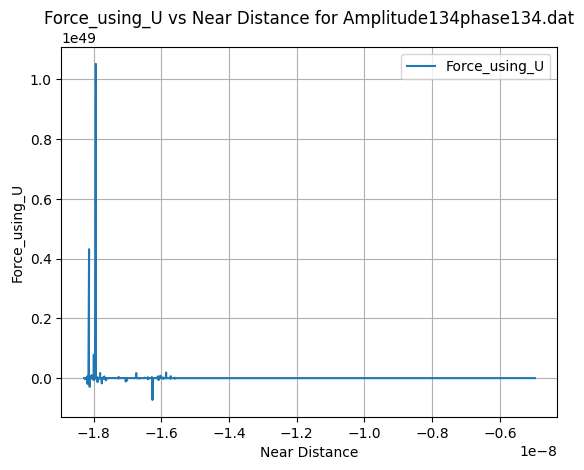

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.162807e-08 -90.000000
1  1.796418e-08  2.162354e-08 -89.994977
2  1.795517e-08  2.161906e-08 -89.992330
3  1.794616e-08  2.161467e-08 -89.991770
4  1.793714e-08  2.161038e-08 -89.993009
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  2.162807e-08 -90.000000  -3.654876e-09  1.270380e-19   
1  1.796418e-08  2.162354e-08 -89.994977  -3.659354e-09  1.819116e-07   
2  1.795517e-08  2.161906e-08 -89.992330  -3.663894e-09  2.778490e-07   
3  1.794616e-08  2.161467e-08 -89.991770  -3.668517e-09  2.982008e-07   
4  1.793714e-08  2.161038e-08 -89.993009  -3.673243e-09  2.533654e-07   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.540761e-18  4.668225e+20       3.060302e+33  -1.937404e+44  
1   3.638232e-06  6.684645e+32       2.192719e+33  -1.863346e+44  
2   5.556981e-06  1.021003e+33       1.380767e+33  -1.714832e+44  
3   5.964016e-06

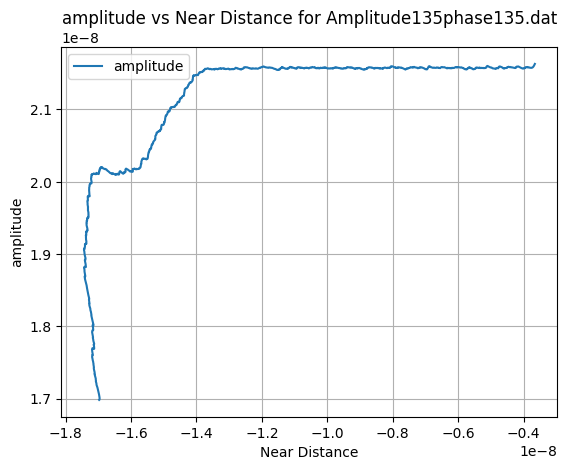

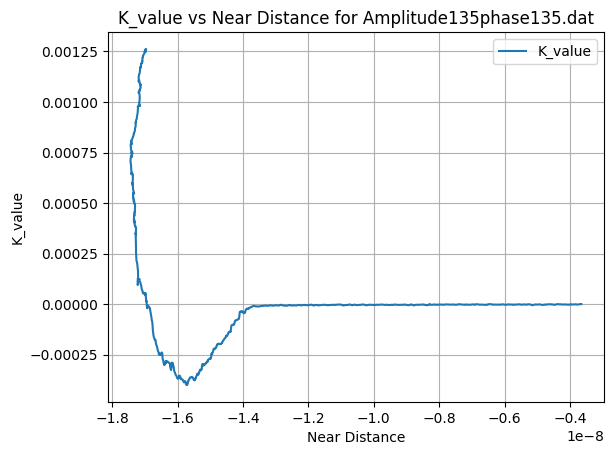

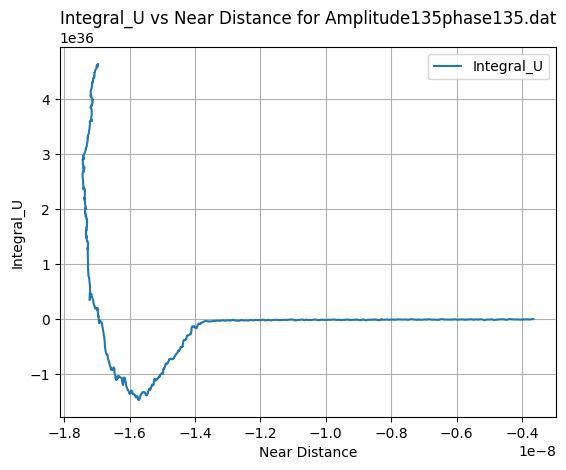

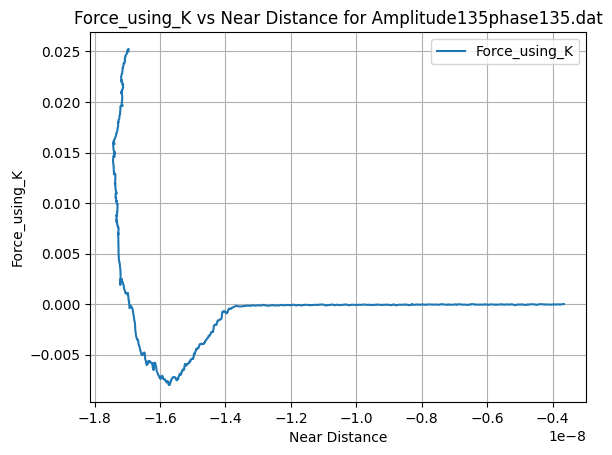

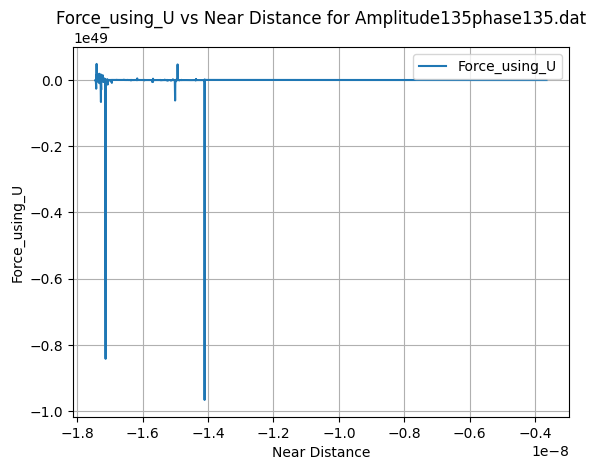

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.017108e-08 -90.000000
1  1.796418e-08  2.017460e-08 -90.002824
2  1.795517e-08  2.017775e-08 -90.005486
3  1.794616e-08  2.018053e-08 -90.007931
4  1.793714e-08  2.018297e-08 -90.010105
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  2.017108e-08 -90.000000  -2.197887e-09  1.273509e-19   
1  1.796418e-08  2.017460e-08 -90.002824  -2.210422e-09 -1.024761e-07   
2  1.795517e-08  2.017775e-08 -90.005486  -2.222577e-09 -1.990614e-07   
3  1.794616e-08  2.018053e-08 -90.007931  -2.234373e-09 -2.877632e-07   
4  1.793714e-08  2.018297e-08 -90.010105  -2.245831e-09 -3.665886e-07   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.547018e-18  4.679721e+20       2.041851e+32  -3.638484e+43  
1  -2.049523e-06 -3.765657e+32      -2.519153e+32  -3.423254e+43  
2  -3.981229e-06 -7.314844e+32      -6.426326e+32  -2.995661e+43  
3  -5.755263e-06

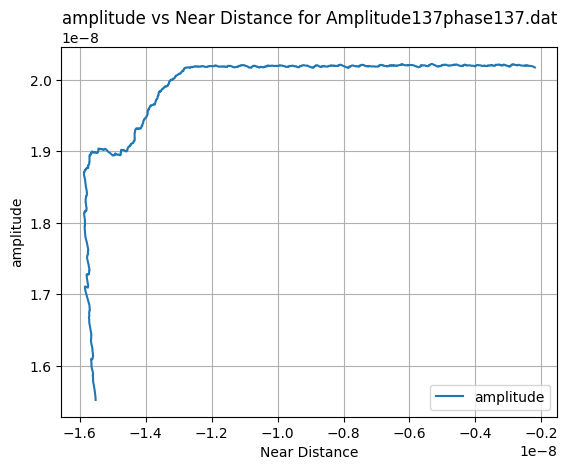

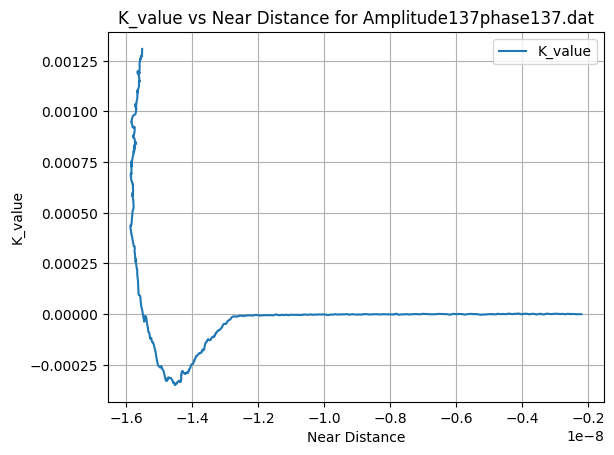

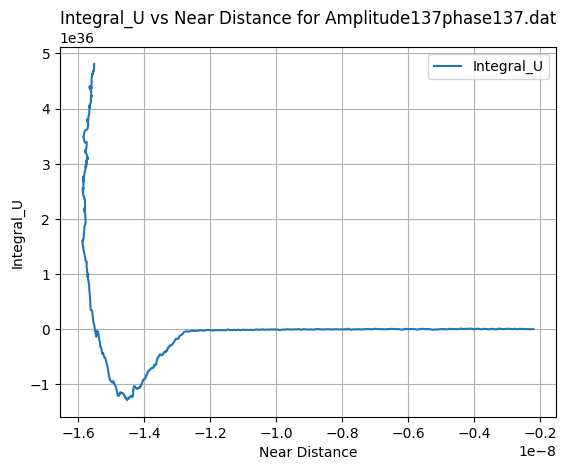

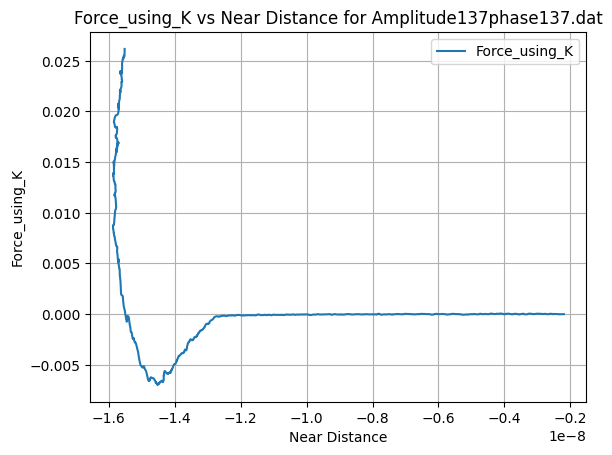

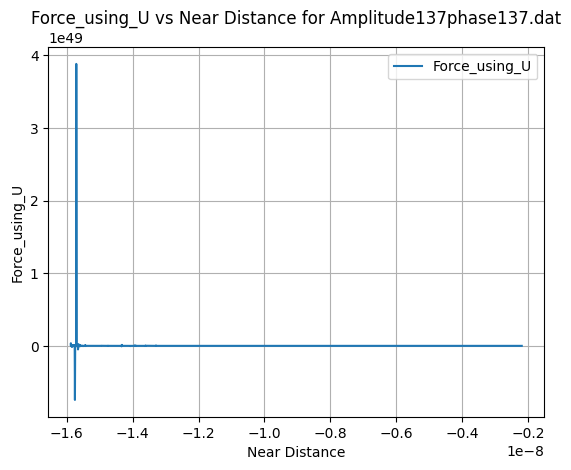

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.496717e-08 -90.000000
1  1.796418e-08  2.496750e-08 -89.965926
2  1.795517e-08  2.496729e-08 -89.940099
3  1.794616e-08  2.496661e-08 -89.921645
4  1.793714e-08  2.496552e-08 -89.909690
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  2.496717e-08 -90.000000  -6.993973e-09  1.271113e-19   
1  1.796418e-08  2.496750e-08 -89.965926  -7.003316e-09  1.234517e-06   
2  1.795517e-08  2.496729e-08 -89.940099  -7.012123e-09  2.170251e-06   
3  1.794616e-08  2.496661e-08 -89.921645  -7.020455e-09  2.838933e-06   
4  1.793714e-08  2.496552e-08 -89.909690  -7.028375e-09  3.272255e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.542226e-18  4.670917e+20       7.874673e+33   2.399286e+43  
1   2.469033e-05  4.536437e+33       8.098829e+33   2.348697e+43  
2   4.340501e-05  7.974948e+33       8.301471e+33   2.240884e+43  
3   5.677865e-05

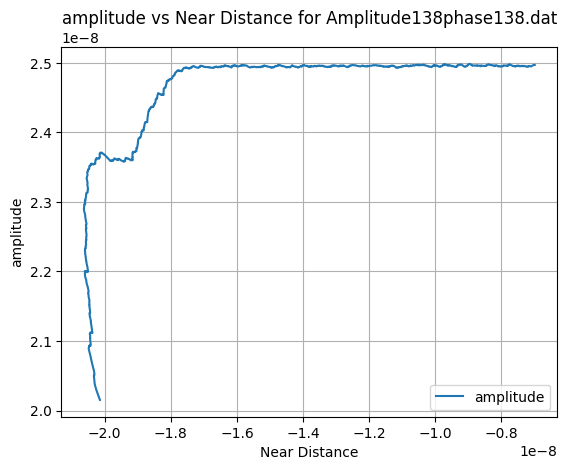

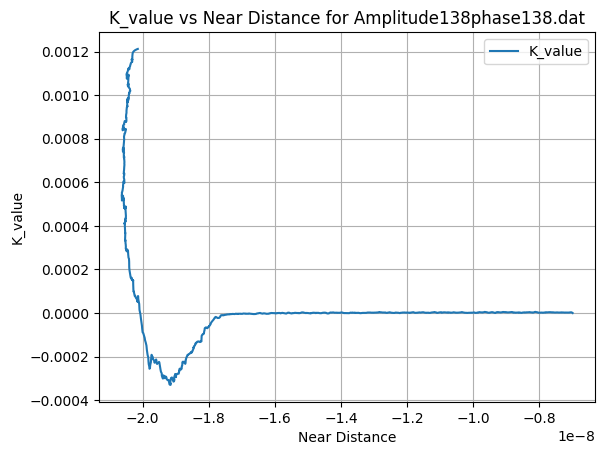

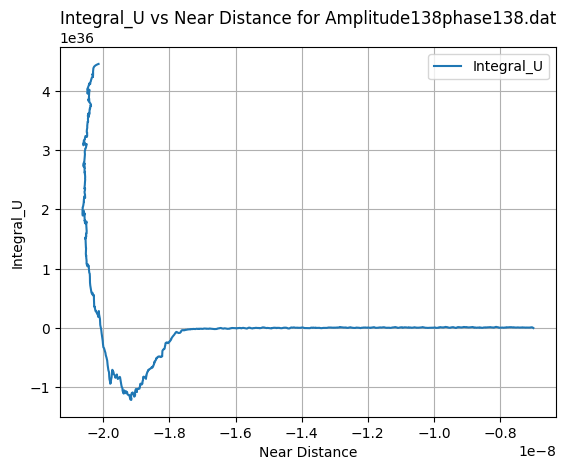

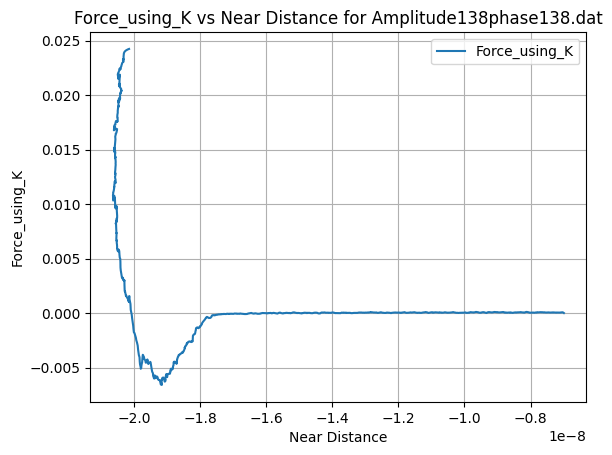

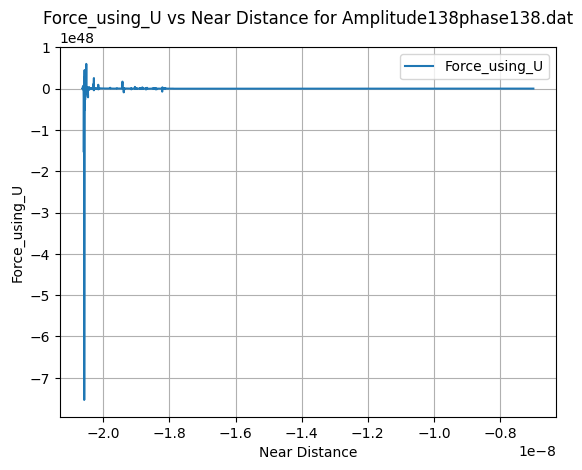

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.513228e-08 -90.000000
1  1.796418e-08  2.512805e-08 -89.970785
2  1.795517e-08  2.512470e-08 -89.947792
3  1.794616e-08  2.512218e-08 -89.930414
4  1.793714e-08  2.512040e-08 -89.918044
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  2.513228e-08 -90.000000  -7.159087e-09  1.271768e-19   
1  1.796418e-08  2.512805e-08 -89.970785  -7.163868e-09  1.059216e-06   
2  1.795517e-08  2.512470e-08 -89.947792  -7.169535e-09  1.893091e-06   
3  1.794616e-08  2.512218e-08 -89.930414  -7.176020e-09  2.523476e-06   
4  1.793714e-08  2.512040e-08 -89.918044  -7.183258e-09  2.972282e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.543535e-18  4.673322e+20       5.602308e+33   2.096312e+44  
1   2.118433e-05  3.892267e+33       6.604521e+33   1.839028e+44  
2   3.786182e-05  6.956478e+33       7.473851e+33   1.352691e+44  
3   5.046952e-05

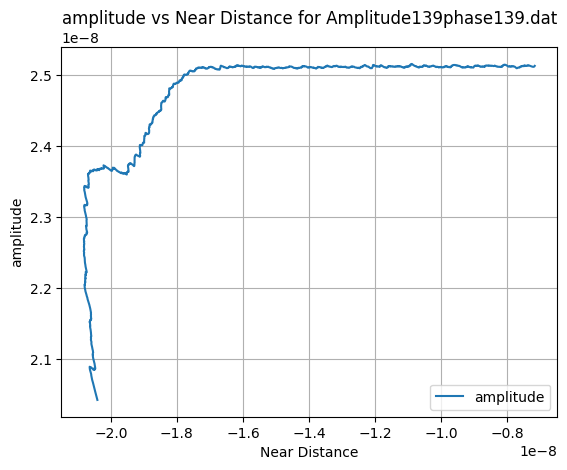

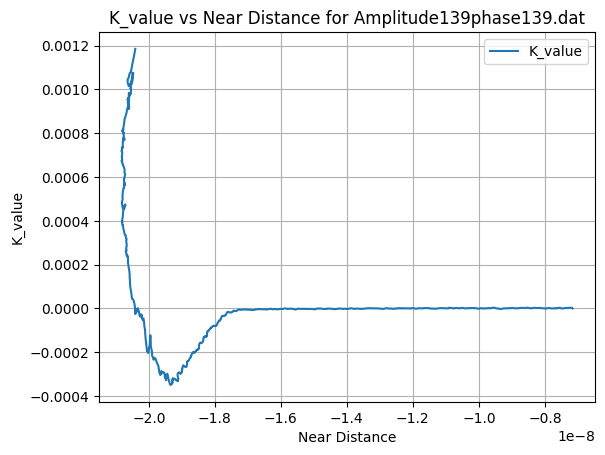

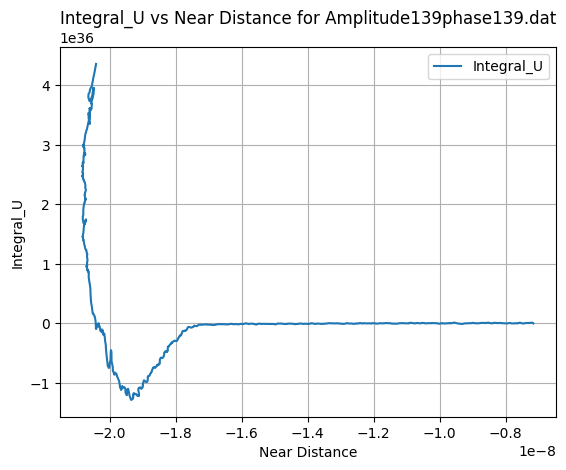

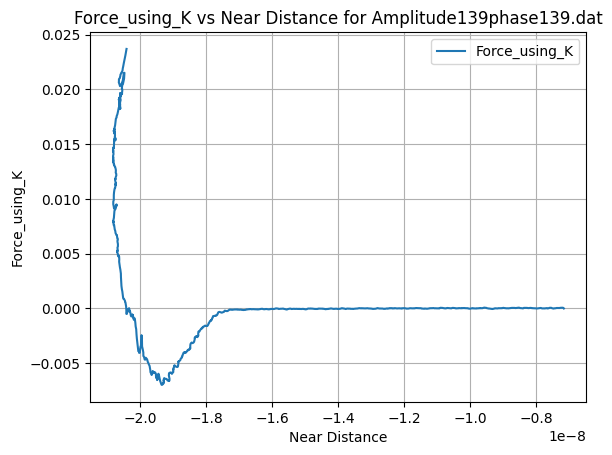

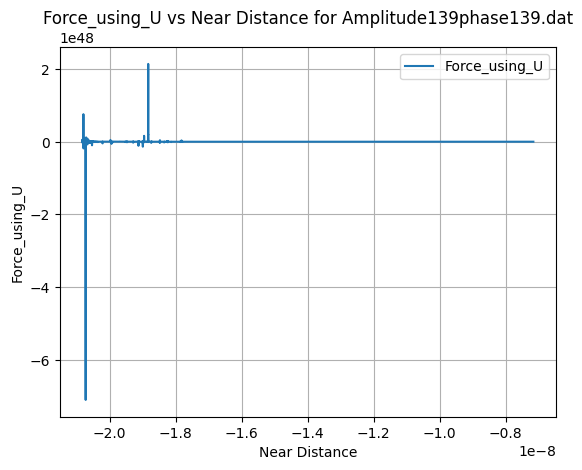

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.390954e-08 -90.000000
1  1.796418e-08  2.391657e-08 -90.001742
2  1.795517e-08  2.392198e-08 -90.004446
3  1.794616e-08  2.392591e-08 -90.008026
4  1.793714e-08  2.392850e-08 -90.012398
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  2.390954e-08 -90.000000  -5.936343e-09  1.272062e-19   
1  1.796418e-08  2.391657e-08 -90.001742  -5.952388e-09 -6.315642e-08   
2  1.795517e-08  2.392198e-08 -90.004446  -5.966814e-09 -1.611239e-07   
3  1.794616e-08  2.392591e-08 -90.008026  -5.979757e-09 -2.908234e-07   
4  1.793714e-08  2.392850e-08 -90.012398  -5.991356e-09 -4.491871e-07   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.544124e-18  4.674404e+20       1.823721e+33  -7.726511e+43  
1  -1.263128e-06 -2.320788e+32       5.839693e+32  -7.875456e+43  
2  -3.222479e-06 -5.920767e+32      -5.714418e+32  -8.158384e+43  
3  -5.816469e-06

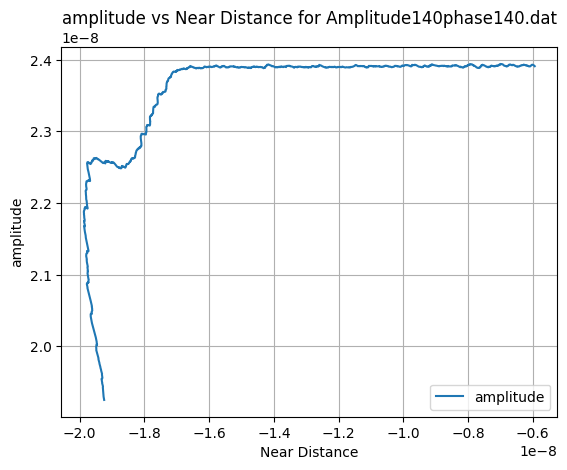

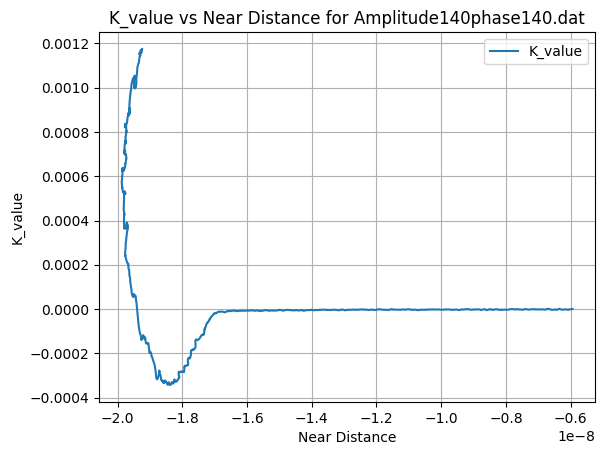

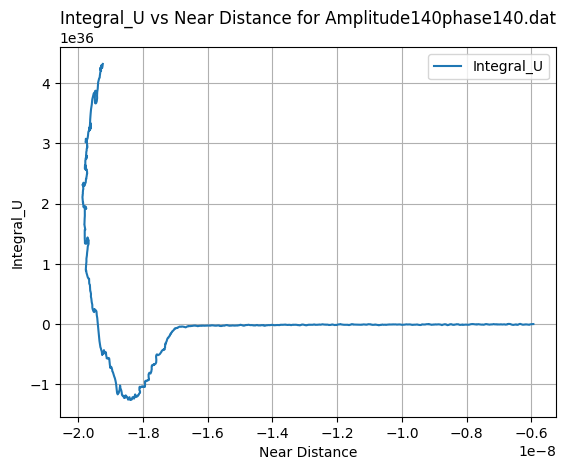

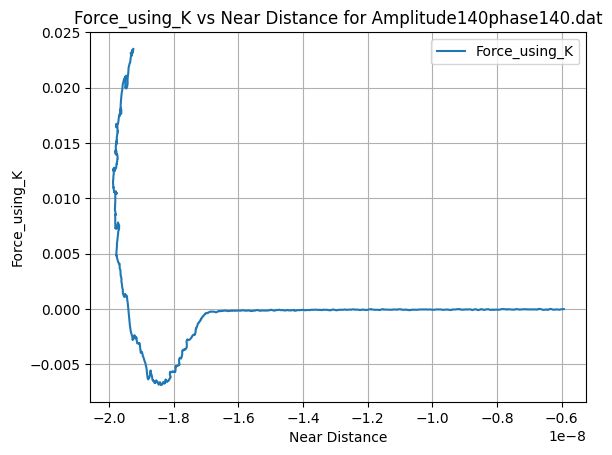

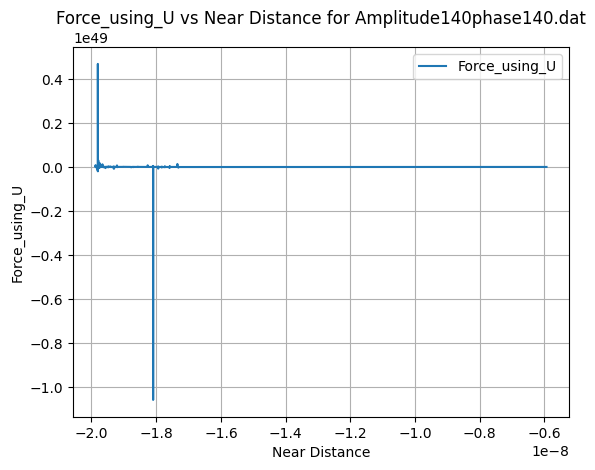

Read the .dat file processed 
           piezo     amplitude      phase
0  1.668425e-08  2.467734e-08 -90.000000
1  1.667523e-08  2.468757e-08 -89.988259
2  1.666622e-08  2.469660e-08 -89.974989
3  1.665720e-08  2.470450e-08 -89.960623
4  1.664819e-08  2.471133e-08 -89.945593
          piezo     amplitude      phase  near_distance       K_value  \
0  1.668425e-08  2.467734e-08 -90.000000  -7.993096e-09  1.273345e-19   
1  1.667523e-08  2.468757e-08 -89.988259  -8.012337e-09  4.259513e-07   
2  1.666622e-08  2.469660e-08 -89.974989  -8.030384e-09  9.070463e-07   
3  1.665720e-08  2.470450e-08 -89.960623  -8.047297e-09  1.427600e-06   
4  1.664819e-08  2.471133e-08 -89.945593  -8.063140e-09  1.971955e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.546690e-18  4.679119e+20       2.665149e+33   7.048687e+43  
1   8.519026e-06  1.565229e+33       4.021426e+33   7.103007e+43  
2   1.814093e-05  3.333093e+33       5.312456e+33   7.205304e+43  
3   2.855200e-05

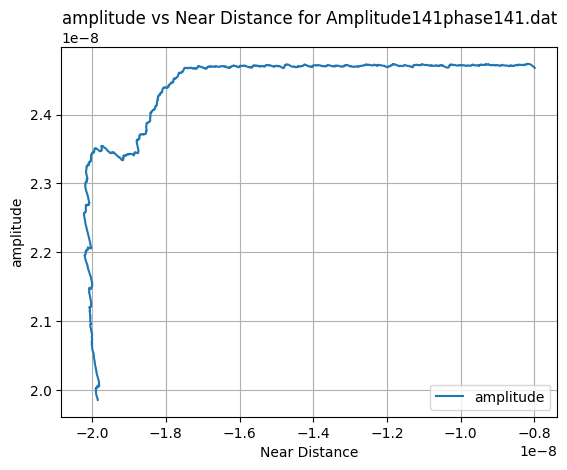

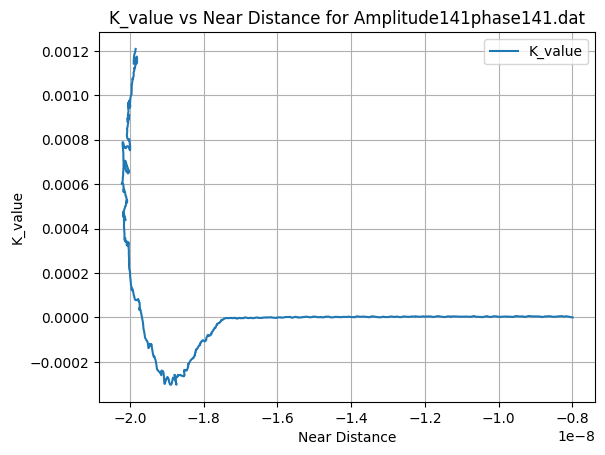

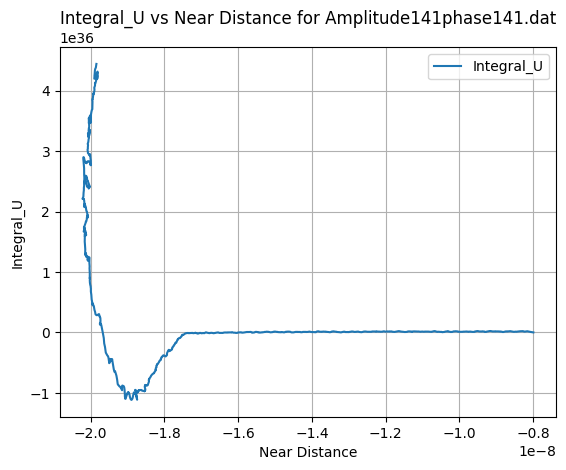

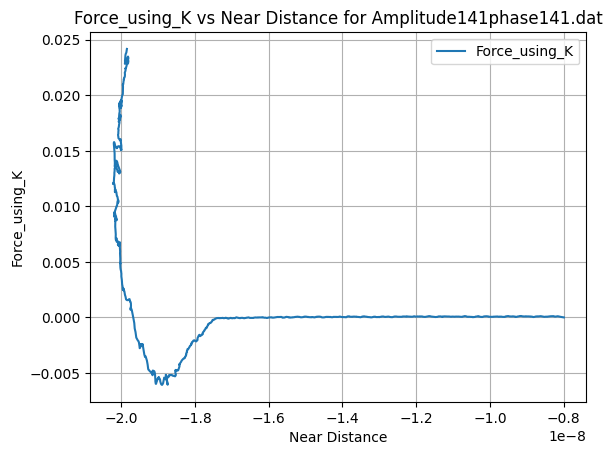

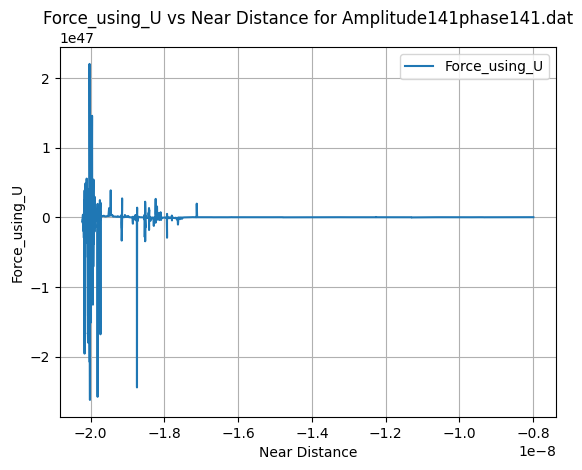

Read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  5.288198e-09 -90.000000
1  1.796418e-08  5.289130e-09 -89.989323
2  1.795517e-08  5.290001e-09 -89.978990
3  1.794616e-08  5.290810e-09 -89.969023
4  1.793714e-08  5.291556e-09 -89.959447
          piezo     amplitude      phase  near_distance       K_value  \
0  1.797320e-08  5.288198e-09 -90.000000   1.268500e-08  1.273381e-19   
1  1.796418e-08  5.289130e-09 -89.989323   1.267505e-08  3.874566e-07   
2  1.795517e-08  5.290001e-09 -89.978990   1.266517e-08  7.623288e-07   
3  1.794616e-08  5.290810e-09 -89.969023   1.265535e-08  1.123778e-06   
4  1.793714e-08  5.291556e-09 -89.959447   1.264559e-08  1.470965e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.546762e-18  4.679250e+20      -7.112740e+32   1.714567e+44  
1   7.749132e-06  1.423774e+33       9.940133e+32   1.665041e+44  
2   1.524658e-05  2.801304e+33       2.591182e+33   1.567402e+44  
3   2.247556e-05

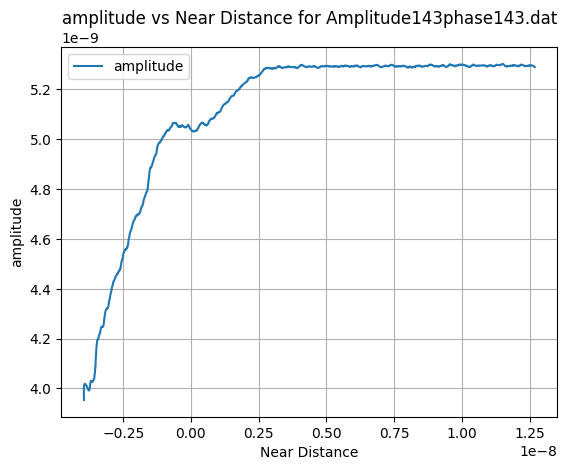

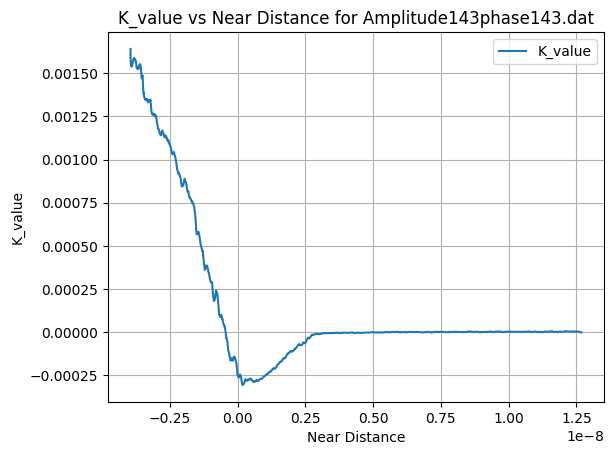

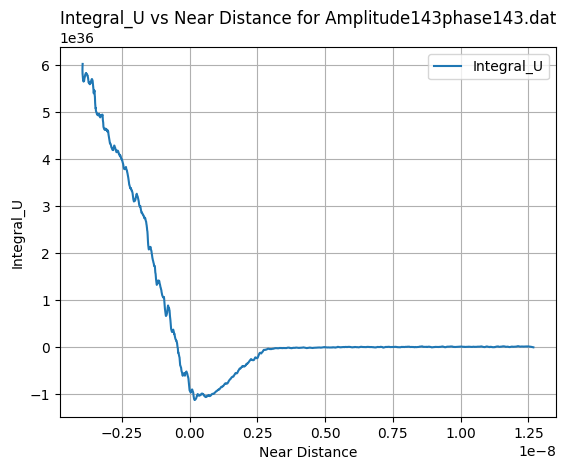

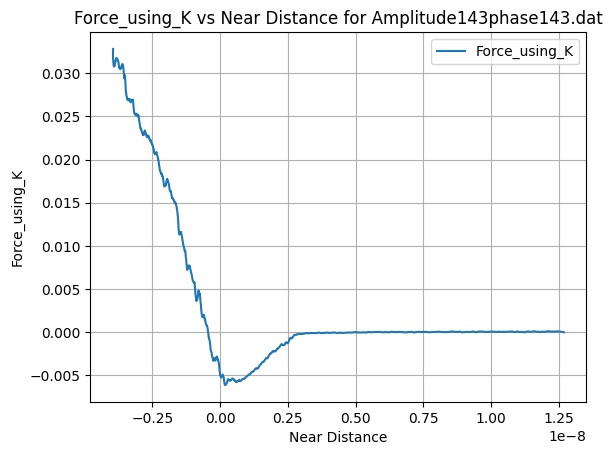

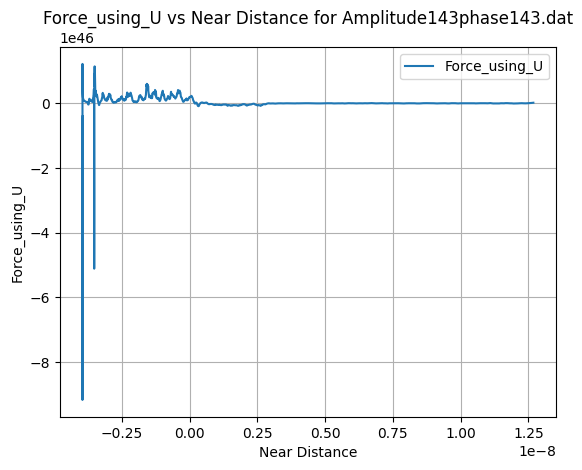

Read the .dat file processed 
           piezo     amplitude      phase
0  1.778391e-08  2.227188e-08 -90.000000
1  1.777490e-08  2.228668e-08 -89.991638
2  1.776588e-08  2.229882e-08 -89.985599
3  1.775687e-08  2.230850e-08 -89.981604
4  1.774786e-08  2.231590e-08 -89.979373
          piezo     amplitude      phase  near_distance       K_value  \
0  1.778391e-08  2.227188e-08 -90.000000  -4.487970e-09  1.274302e-19   
1  1.777490e-08  2.228668e-08 -89.991638  -4.511788e-09  3.035399e-07   
2  1.776588e-08  2.229882e-08 -89.985599  -4.532941e-09  5.224559e-07   
3  1.775687e-08  2.230850e-08 -89.981604  -4.551627e-09  6.670984e-07   
4  1.774786e-08  2.231590e-08 -89.979373  -4.568045e-09  7.477413e-07   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.548604e-18  4.682634e+20       3.410023e+33  -2.233399e+43  
1   6.070799e-06  1.115408e+33       2.878067e+33  -2.208357e+43  
2   1.044912e-05  1.919851e+33       2.415642e+33  -2.149988e+43  
3   1.334197e-05

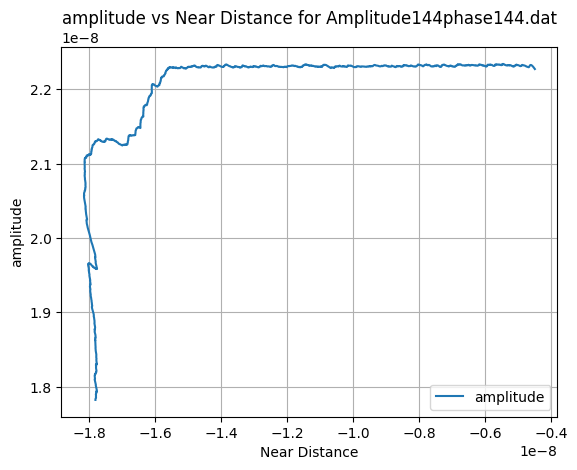

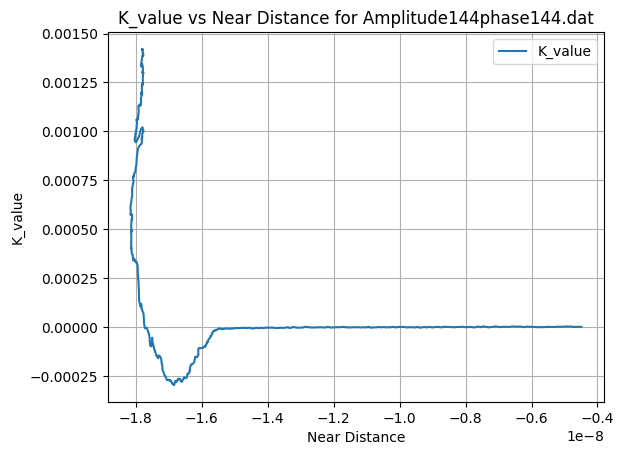

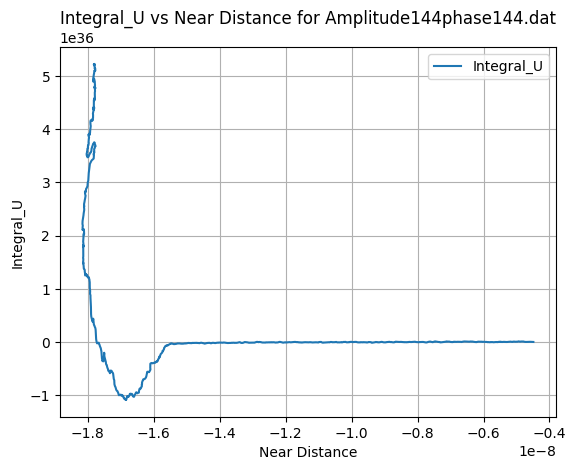

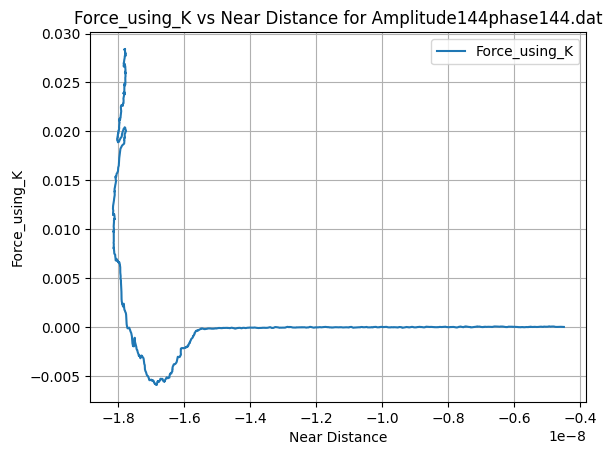

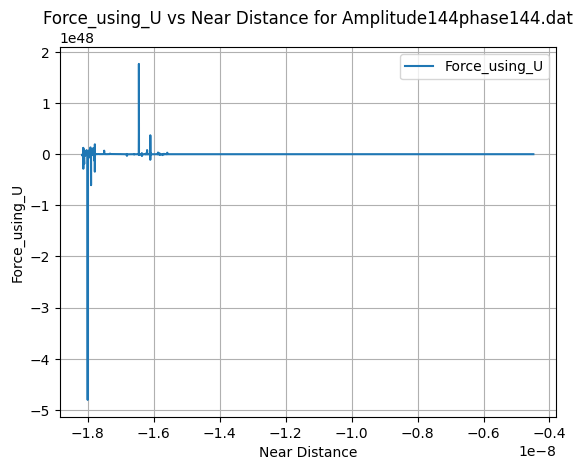

Read the .dat file processed 
           piezo     amplitude      phase
0  1.766673e-08  2.297547e-08 -90.000000
1  1.765772e-08  2.296454e-08 -90.043105
2  1.764871e-08  2.295489e-08 -90.075606
3  1.763969e-08  2.294644e-08 -90.098730
4  1.763068e-08  2.293912e-08 -90.113702
          piezo     amplitude      phase  near_distance       K_value  \
0  1.766673e-08  2.297547e-08 -90.000000  -5.308733e-09  1.270380e-19   
1  1.765772e-08  2.296454e-08 -90.043105  -5.306825e-09 -1.561572e-06   
2  1.764871e-08  2.295489e-08 -90.075606  -5.306185e-09 -2.740166e-06   
3  1.763969e-08  2.294644e-08 -90.098730  -5.306745e-09 -3.579555e-06   
4  1.763068e-08  2.293912e-08 -90.113702  -5.308439e-09 -4.123699e-06   

   Force_using_K    Integral_U  Integral_U_smooth  Force_using_U  
0   2.540761e-18  4.668225e+20      -7.232193e+33   6.405332e+44  
1  -3.123143e-05 -5.738255e+33      -8.453940e+33   1.457405e+45  
2  -5.480332e-05 -1.006920e+34      -9.562519e+33  -2.637626e+46  
3  -7.159110e-05

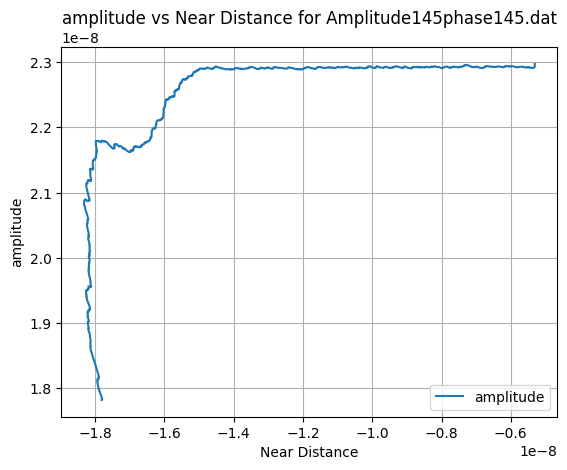

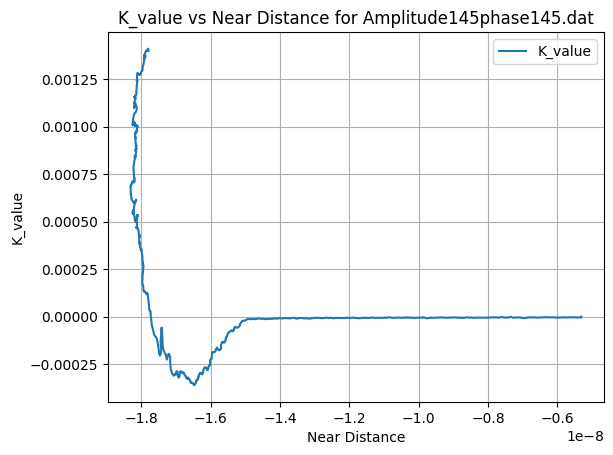

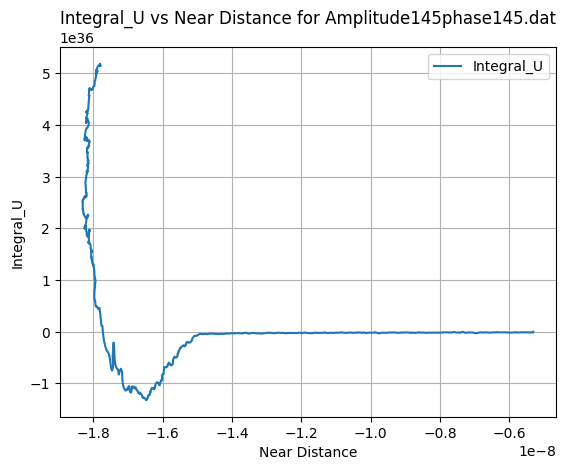

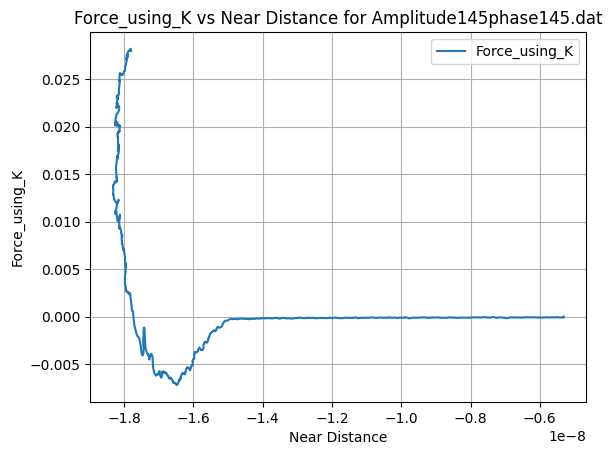

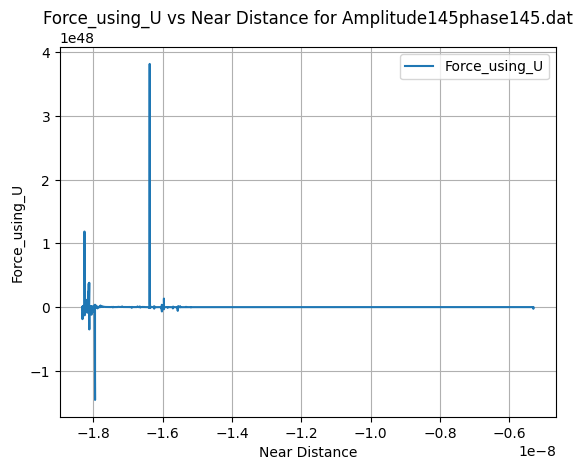

PermissionError: [Errno 13] Permission denied: 'E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\processdata\\processpotential'

In [7]:
import os
import pandas as pd
import numpy as np
import math
from scipy.integrate import quad
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Constants
pi_val = math.pi
c_z = 2.756  # N/m spring constant
fd = 72.7163e3
f0 = 72.7163e3
Qfactor = 241

# Define the functions
def Kvalue(A_i, P_i, aexc):
    k = (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    return k

def integration(A_i, P_i, aexc):
    k = (0.5) * ((aexc / A_i) * (math.cos((P_i * pi_val) / 180)) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    
    def u(t):  # Define the integrand function
        return 4 * c_z * k * (t ** 3 + ((((A_i) * (t ** 2)) / (16 * pi_val)) ** 0.5) + ((((A_i) ** 3) ** 0.5) / ((2) ** 0.5)))
    
    integral_value, error = quad(u, 0.001, 10e12, weight='cauchy', wvar=0)
    return integral_value

def Force_integrating_K(A_i, P_i, aexc, D_min):
    def k_exp(zeta=c_z):
        return (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2)) * (2 * zeta)
    
    integral_value, error = quad(k_exp, D_min, 10, weight='cauchy', wvar=0)
    return integral_value

def calculate_force_using_U(integral_U, piezo):
    # Numerical differentiation
    force_using_U = -np.gradient(integral_U, piezo)
    return force_using_U

# Directory paths
directory_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\processdata\\"  # Change this to your directory containing the .dat files
output_directory = "processpotential\\"
directory_pathnew = os.path.join(directory_path, output_directory)
if not os.path.exists(directory_pathnew):
    os.makedirs(directory_pathnew)
    print(f"Directory '{output_directory}' created successfully.")
else:
    print(f"Directory '{output_directory}' already exists.")

listDatfiles = os.listdir(directory_path)
count = 0
for file in listDatfiles:
    count += 1
    df = pd.read_csv(os.path.join(directory_path, file), delimiter=' ')
    print("Read the .dat file processed \n", df.head(5))
    
    p = df['phase']  # p phase is a vector
    A = df['amplitude']
    piezo = df['piezo']
    aexc = max(A) / Qfactor
    df['near_distance'] = df['piezo'] - df['amplitude']
    
    # Calculate k values using apply
    df['K_value'] = df.apply(lambda row: Kvalue(row['amplitude'], row['phase'], aexc), axis=1)
    
    # Calculate Force using K using apply
    D_min = min(piezo)
    df['Force_using_K'] = df.apply(lambda row: Force_integrating_K(row['amplitude'], row['phase'], aexc, D_min), axis=1)
    
    # Calculate integral U using apply
    df['Integral_U'] = df.apply(lambda row: integration(row['amplitude'], row['phase'], aexc), axis=1)
    
    # Smooth the Integral_U values using Savitzky-Golay filter
    df['Integral_U_smooth'] = savgol_filter(df['Integral_U'], 51, 3)  # Window size 51, polynomial order 3
    
    # Calculate Force using U on the smoothed data
    df['Force_using_U'] = calculate_force_using_U(df['Integral_U_smooth'], df['near_distance'])
    
    # Handle extreme values (clipping)
#     df['Force_using_U'] = np.clip(df['Force_using_U'], -1e6, 1e6)
    
    # Save the DataFrame to an Excel file
    output_file_path = os.path.join(directory_pathnew, f"{file[0:-4]}_potential.xlsx")
    print(df.head())
    df.to_excel(output_file_path, index=False)
    
    # Plot each dataframe column against near_distance
    columns_to_plot = ['amplitude', 'K_value', 'Integral_U', 'Force_using_K', 'Force_using_U']
    for column in columns_to_plot:
        plt.figure()
        plt.plot(df['near_distance'], df[column], label=column)
        plt.xlabel('Near Distance')
        plt.ylabel(column)
        plt.title(f'{column} vs Near Distance for {file}')
        plt.legend()
        plt.grid()
        plt.show()


Directory 'processpotential\' created successfully.
 read the .dat file processed 
           piezo     amplitude      phase
0  1.872795e-08  4.127145e-08 -90.000000
1  1.871793e-08  4.127302e-08 -90.008920
2  1.870792e-08  4.127480e-08 -90.013505
3  1.869790e-08  4.127675e-08 -90.014319
4  1.868789e-08  4.127886e-08 -90.011932
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.872795e-08  4.127145e-08 -90.000000  1.272546e-19   2.545092e-18   
1  1.871793e-08  4.127302e-08 -90.008920 -3.235502e-07  -6.471004e-06   
2  1.870792e-08  4.127480e-08 -90.013505 -4.897996e-07  -9.795992e-06   
3  1.869790e-08  4.127675e-08 -90.014319 -5.193262e-07  -1.038652e-05   
4  1.868789e-08  4.127886e-08 -90.011932 -4.327092e-07  -8.654184e-06   

     Integral_U  Force_using_U  
0  4.676182e+20   1.187164e+44  
1 -1.188939e+33   8.985818e+43  
2 -1.799850e+33   3.591688e+43  
3 -1.908351e+33  -1.047373e+43  
4 -1.590062e+33  -4.931388e+43  


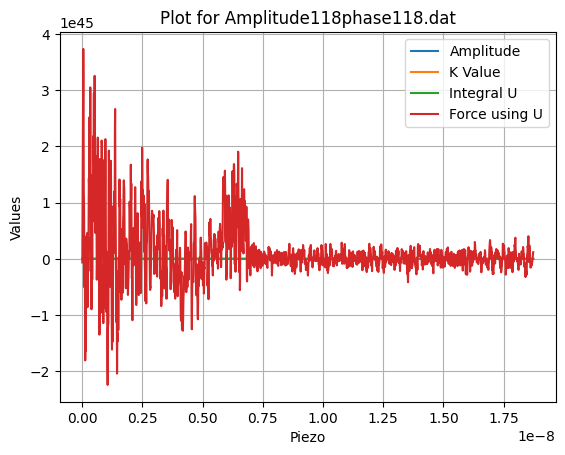

 read the .dat file processed 
           piezo     amplitude      phase
0  1.999985e-08  1.415409e-08 -90.000000
1  1.998983e-08  1.415273e-08 -90.038799
2  1.997982e-08  1.415185e-08 -90.068201
3  1.996980e-08  1.415142e-08 -90.089190
4  1.995979e-08  1.415137e-08 -90.102749
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.999985e-08  1.415409e-08 -90.000000  1.271569e-19   2.543139e-18   
1  1.998983e-08  1.415273e-08 -90.038799 -1.406351e-06  -2.812701e-05   
2  1.997982e-08  1.415185e-08 -90.068201 -2.472263e-06  -4.944526e-05   
3  1.996980e-08  1.415142e-08 -90.089190 -3.233212e-06  -6.466425e-05   
4  1.995979e-08  1.415137e-08 -90.102749 -3.724750e-06  -7.449499e-05   

     Integral_U  Force_using_U  
0  4.672594e+20   5.160155e+44  
1 -5.167869e+33   4.535592e+44  
2 -9.084743e+33   3.351546e+44  
3 -1.188098e+34   2.297800e+44  
4 -1.368721e+34   1.374602e+44  


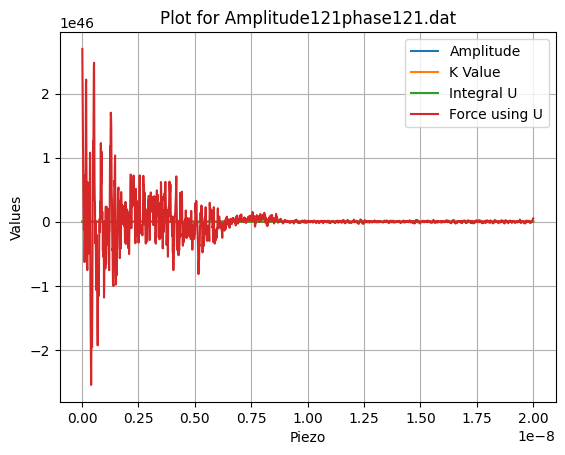

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  3.209870e-08 -90.000000
1  1.796418e-08  3.208322e-08 -89.937249
2  1.795517e-08  3.206972e-08 -89.889178
3  1.794616e-08  3.205811e-08 -89.854274
4  1.793714e-08  3.204827e-08 -89.831023
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  3.209870e-08 -90.000000  1.270380e-19   2.540761e-18   
1  1.796418e-08  3.208322e-08 -89.937249  2.273311e-06   4.546622e-05   
2  1.795517e-08  3.206972e-08 -89.889178  4.016496e-06   8.032991e-05   
3  1.794616e-08  3.205811e-08 -89.854274  5.283440e-06   1.056688e-04   
4  1.793714e-08  3.204827e-08 -89.831023  6.128303e-06   1.225661e-04   

     Integral_U  Force_using_U  
0  4.668225e+20  -9.267799e+44  
1  8.353660e+33  -8.187197e+44  
2  1.475928e+34  -6.135828e+44  
3  1.941488e+34  -4.304691e+44  
4  2.251947e+34  -2.694818e+44  


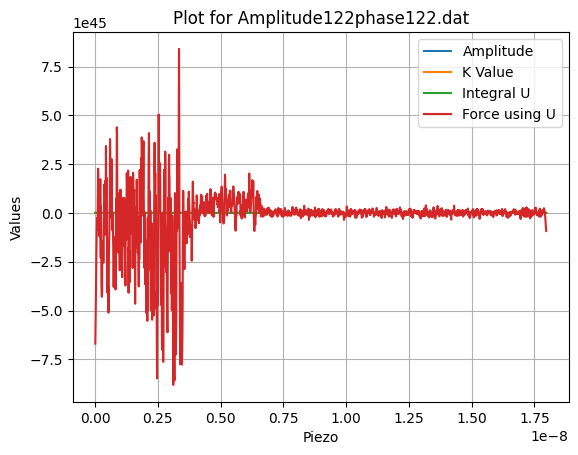

 read the .dat file processed 
           piezo     amplitude      phase
0  1.772983e-08  2.423799e-08 -90.000000
1  1.772081e-08  2.424251e-08 -89.968494
2  1.771180e-08  2.424676e-08 -89.942272
3  1.770279e-08  2.425075e-08 -89.920912
4  1.769377e-08  2.425450e-08 -89.903989
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.772983e-08  2.423799e-08 -90.000000  1.273697e-19   2.547394e-18   
1  1.772081e-08  2.424251e-08 -89.968494  1.143619e-06   2.287239e-05   
2  1.771180e-08  2.424676e-08 -89.942272  2.095032e-06   4.190065e-05   
3  1.770279e-08  2.425075e-08 -89.920912  2.869756e-06   5.739513e-05   
4  1.769377e-08  2.425450e-08 -89.903989  3.483285e-06   6.966570e-05   

     Integral_U  Force_using_U  
0  4.680412e+20  -4.662289e+44  
1  4.202420e+33  -4.270498e+44  
2  7.698546e+33  -3.518544e+44  
3  1.054540e+34  -2.829805e+44  
4  1.279991e+34  -2.204190e+44  


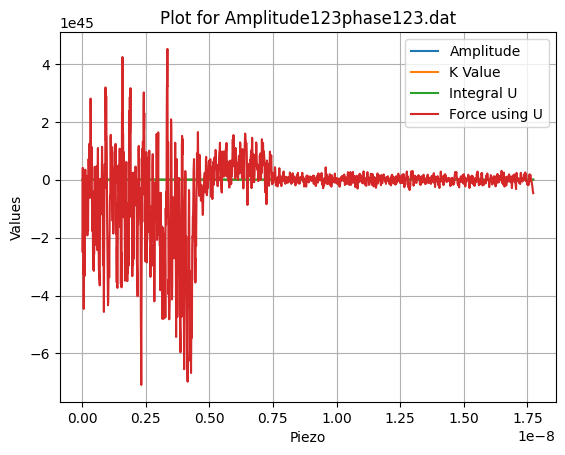

 read the .dat file processed 
           piezo     amplitude      phase
0  1.643186e-08  2.645405e-08 -90.000000
1  1.642285e-08  2.645357e-08 -90.002865
2  1.641384e-08  2.645261e-08 -90.005320
3  1.640482e-08  2.645121e-08 -90.007460
4  1.639581e-08  2.644944e-08 -90.009381
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.643186e-08  2.645405e-08 -90.000000  1.270380e-19   2.540761e-18   
1  1.642285e-08  2.645357e-08 -90.002865 -1.037335e-07  -2.074669e-06   
2  1.641384e-08  2.645261e-08 -90.005320 -1.926485e-07  -3.852970e-06   
3  1.640482e-08  2.645121e-08 -90.007460 -2.701737e-07  -5.403473e-06   
4  1.639581e-08  2.644944e-08 -90.009381 -3.397382e-07  -6.794764e-06   

     Integral_U  Force_using_U  
0  4.668225e+20   4.228989e+43  
1 -3.811859e+32   3.926932e+43  
2 -7.079189e+32   3.392704e+43  
3 -9.927981e+32   2.998266e+43  
4 -1.248425e+33   2.743582e+43  


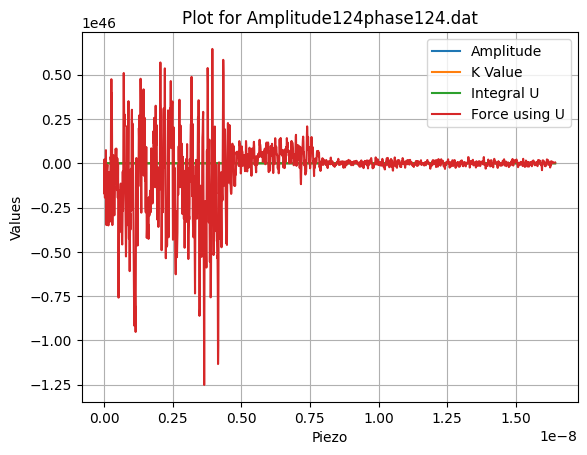

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  3.230468e-08 -90.000000
1  1.796418e-08  3.231730e-08 -90.010815
2  1.795517e-08  3.232819e-08 -90.019165
3  1.794616e-08  3.233747e-08 -90.025301
4  1.793714e-08  3.234524e-08 -90.029475
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  3.230468e-08 -90.000000  1.273310e-19   2.546620e-18   
1  1.796418e-08  3.231730e-08 -90.010815 -3.923506e-07  -7.847012e-06   
2  1.795517e-08  3.232819e-08 -90.019165 -6.950510e-07  -1.390102e-05   
3  1.794616e-08  3.233747e-08 -90.025301 -9.173434e-07  -1.834687e-05   
4  1.793714e-08  3.234524e-08 -90.029475 -1.068431e-06  -2.136861e-05   

     Integral_U  Force_using_U  
0  4.678989e+20   1.599529e+44  
1 -1.441758e+33   1.416787e+44  
2 -2.554081e+33   1.070142e+44  
3 -3.370931e+33   7.610943e+43  
4 -3.926127e+33   4.895015e+43  


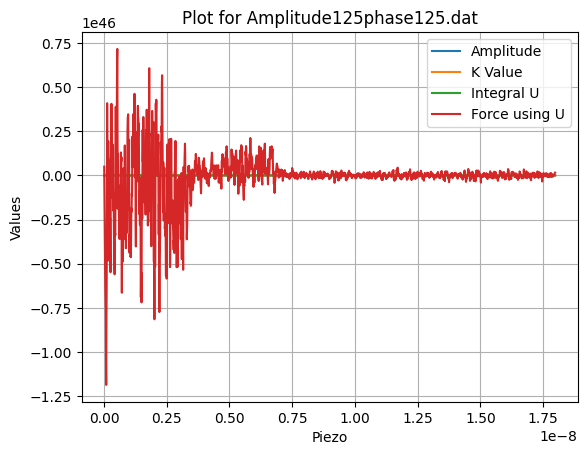

 read the .dat file processed 
           piezo     amplitude      phase
0  1.599988e-08  3.737062e-08 -90.000000
1  1.599187e-08  3.738348e-08 -89.975361
2  1.598385e-08  3.739448e-08 -89.954969
3  1.597584e-08  3.740371e-08 -89.938609
4  1.596783e-08  3.741130e-08 -89.926063
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.599988e-08  3.737062e-08 -90.000000  1.272760e-19   2.545520e-18   
1  1.599187e-08  3.738348e-08 -89.975361  8.935520e-07   1.787104e-05   
2  1.598385e-08  3.739448e-08 -89.954969  1.632590e-06   3.265180e-05   
3  1.597584e-08  3.740371e-08 -89.938609  2.225185e-06   4.450371e-05   
4  1.596783e-08  3.741130e-08 -89.926063  2.679349e-06   5.358698e-05   

     Integral_U  Force_using_U  
0  4.676968e+20  -4.098255e+44  
1  3.283506e+33  -3.743918e+44  
2  5.999225e+33  -3.053754e+44  
3  8.176814e+33  -2.400470e+44  
4  9.845715e+33  -1.783817e+44  


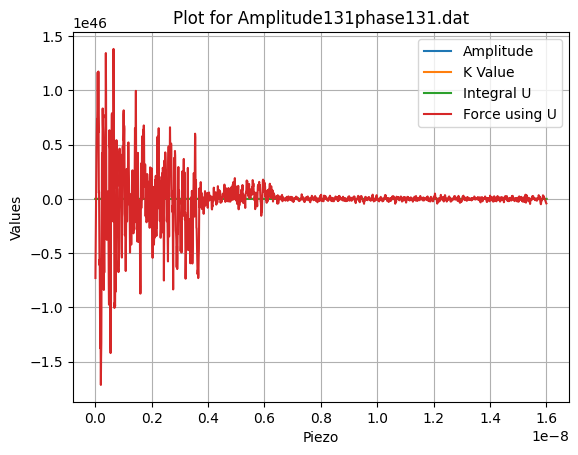

 read the .dat file processed 
           piezo     amplitude      phase
0  1.788306e-08  2.285229e-08 -90.000000
1  1.787405e-08  2.286188e-08 -90.020794
2  1.786503e-08  2.286904e-08 -90.033620
3  1.785602e-08  2.287397e-08 -90.039506
4  1.784701e-08  2.287687e-08 -90.039480
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.788306e-08  2.285229e-08 -90.000000  1.271807e-19   2.543613e-18   
1  1.787405e-08  2.286188e-08 -90.020794 -7.534709e-07  -1.506942e-05   
2  1.786503e-08  2.286904e-08 -90.033620 -1.217844e-06  -2.435688e-05   
3  1.785602e-08  2.287397e-08 -90.039506 -1.430755e-06  -2.861510e-05   
4  1.784701e-08  2.287687e-08 -90.039480 -1.429640e-06  -2.859281e-05   

     Integral_U  Force_using_U  
0  4.673465e+20   3.071742e+44  
1 -2.768754e+33   2.482445e+44  
2 -4.475170e+33   1.380571e+44  
3 -5.257548e+33   4.317244e+43  
4 -5.253452e+33  -3.647966e+43  


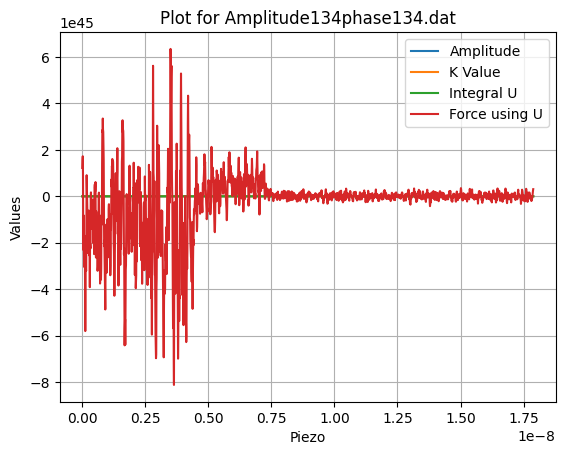

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.162807e-08 -90.000000
1  1.796418e-08  2.162354e-08 -89.994977
2  1.795517e-08  2.161906e-08 -89.992330
3  1.794616e-08  2.161467e-08 -89.991770
4  1.793714e-08  2.161038e-08 -89.993009
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  2.162807e-08 -90.000000  1.270380e-19   2.540761e-18   
1  1.796418e-08  2.162354e-08 -89.994977  1.819116e-07   3.638232e-06   
2  1.795517e-08  2.161906e-08 -89.992330  2.778490e-07   5.556981e-06   
3  1.794616e-08  2.161467e-08 -89.991770  2.982008e-07   5.964016e-06   
4  1.793714e-08  2.161038e-08 -89.993009  2.533654e-07   5.067308e-06   

     Integral_U  Force_using_U  
0  4.668225e+20  -7.416143e+43  
1  6.684645e+32  -5.663654e+43  
2  1.021003e+33  -2.370433e+43  
3  1.095789e+33   4.990725e+42  
4  9.310334e+32   2.944442e+43  


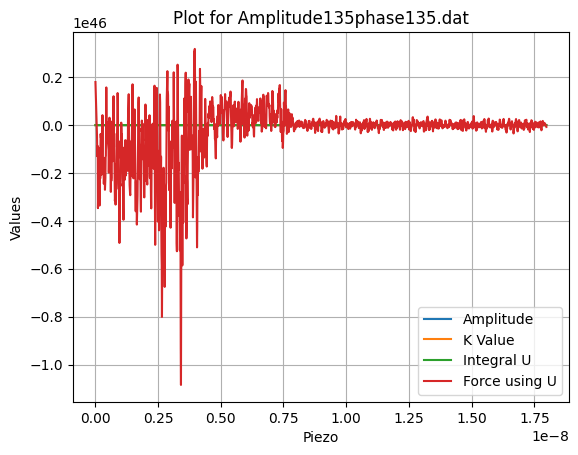

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.017108e-08 -90.000000
1  1.796418e-08  2.017460e-08 -90.002824
2  1.795517e-08  2.017775e-08 -90.005486
3  1.794616e-08  2.018053e-08 -90.007931
4  1.793714e-08  2.018297e-08 -90.010105
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  2.017108e-08 -90.000000  1.273509e-19   2.547018e-18   
1  1.796418e-08  2.017460e-08 -90.002824 -1.024761e-07  -2.049523e-06   
2  1.795517e-08  2.017775e-08 -90.005486 -1.990614e-07  -3.981229e-06   
3  1.794616e-08  2.018053e-08 -90.007931 -2.877632e-07  -5.755263e-06   
4  1.793714e-08  2.018297e-08 -90.010105 -3.665886e-07  -7.331771e-06   

     Integral_U  Force_using_U  
0  4.679721e+20   4.177732e+43  
1 -3.765657e+32   4.057655e+43  
2 -7.314844e+32   3.776878e+43  
3 -1.057434e+33   3.414860e+43  
4 -1.347091e+33   2.971596e+43  


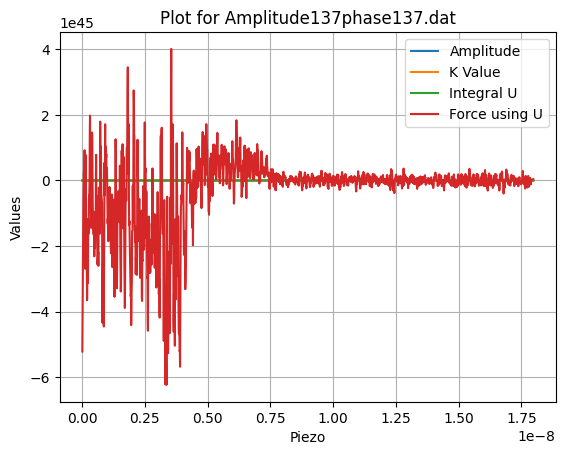

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.496717e-08 -90.000000
1  1.796418e-08  2.496750e-08 -89.965926
2  1.795517e-08  2.496729e-08 -89.940099
3  1.794616e-08  2.496661e-08 -89.921645
4  1.793714e-08  2.496552e-08 -89.909690
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  2.496717e-08 -90.000000  1.271113e-19   2.542226e-18   
1  1.796418e-08  2.496750e-08 -89.965926  1.234517e-06   2.469033e-05   
2  1.795517e-08  2.496729e-08 -89.940099  2.170251e-06   4.340501e-05   
3  1.794616e-08  2.496661e-08 -89.921645  2.838933e-06   5.677865e-05   
4  1.793714e-08  2.496552e-08 -89.909690  3.272255e-06   6.544511e-05   

     Integral_U  Force_using_U  
0  4.670917e+20  -5.032858e+44  
1  4.536437e+33  -4.423824e+44  
2  7.974948e+33  -3.270431e+44  
3  1.043213e+34  -2.246318e+44  
4  1.202445e+34  -1.351364e+44  


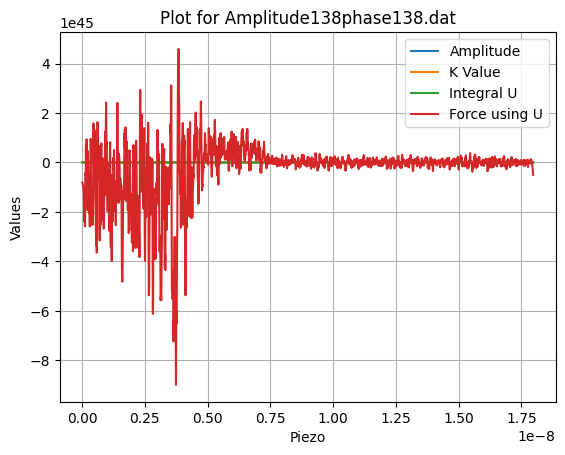

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.513228e-08 -90.000000
1  1.796418e-08  2.512805e-08 -89.970785
2  1.795517e-08  2.512470e-08 -89.947792
3  1.794616e-08  2.512218e-08 -89.930414
4  1.793714e-08  2.512040e-08 -89.918044
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  2.513228e-08 -90.000000  1.271768e-19   2.543535e-18   
1  1.796418e-08  2.512805e-08 -89.970785  1.059216e-06   2.118433e-05   
2  1.795517e-08  2.512470e-08 -89.947792  1.893091e-06   3.786182e-05   
3  1.794616e-08  2.512218e-08 -89.930414  2.523476e-06   5.046952e-05   
4  1.793714e-08  2.512040e-08 -89.918044  2.972282e-06   5.944564e-05   

     Integral_U  Force_using_U  
0  4.673322e+20  -4.318196e+44  
1  3.892267e+33  -3.858863e+44  
2  6.956478e+33  -2.984738e+44  
3  9.272934e+33  -2.199815e+44  
4  1.092215e+34  -1.504311e+44  


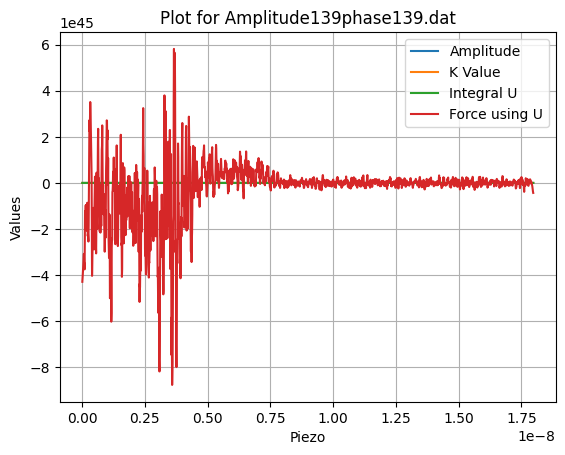

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  2.390954e-08 -90.000000
1  1.796418e-08  2.391657e-08 -90.001742
2  1.795517e-08  2.392198e-08 -90.004446
3  1.794616e-08  2.392591e-08 -90.008026
4  1.793714e-08  2.392850e-08 -90.012398
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  2.390954e-08 -90.000000  1.272062e-19   2.544124e-18   
1  1.796418e-08  2.391657e-08 -90.001742 -6.315642e-08  -1.263128e-06   
2  1.795517e-08  2.392198e-08 -90.004446 -1.611239e-07  -3.222479e-06   
3  1.794616e-08  2.392591e-08 -90.008026 -2.908234e-07  -5.816469e-06   
4  1.793714e-08  2.392850e-08 -90.012398 -4.491871e-07  -8.983743e-06   

     Integral_U  Force_using_U  
0  4.674404e+20   2.574751e+43  
1 -2.320788e+32   3.284340e+43  
2 -5.920767e+32   4.640749e+43  
3 -1.068679e+33   5.871858e+43  
4 -1.650613e+33   6.978080e+43  


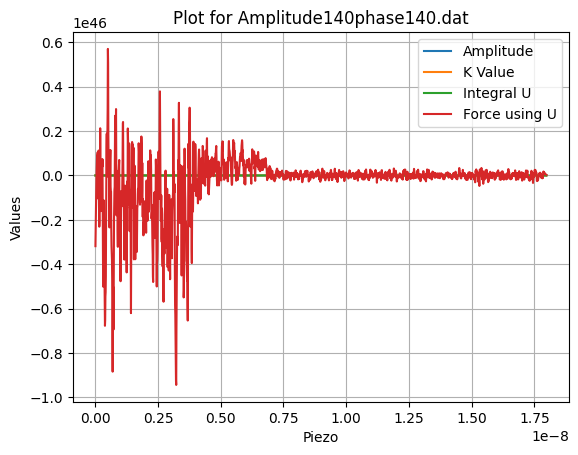

 read the .dat file processed 
           piezo     amplitude      phase
0  1.668425e-08  2.467734e-08 -90.000000
1  1.667523e-08  2.468757e-08 -89.988259
2  1.666622e-08  2.469660e-08 -89.974989
3  1.665720e-08  2.470450e-08 -89.960623
4  1.664819e-08  2.471133e-08 -89.945593
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.668425e-08  2.467734e-08 -90.000000  1.273345e-19   2.546690e-18   
1  1.667523e-08  2.468757e-08 -89.988259  4.259513e-07   8.519026e-06   
2  1.666622e-08  2.469660e-08 -89.974989  9.070463e-07   1.814093e-05   
3  1.665720e-08  2.470450e-08 -89.960623  1.427600e-06   2.855200e-05   
4  1.664819e-08  2.471133e-08 -89.945593  1.971955e-06   3.943909e-05   

     Integral_U  Force_using_U  
0  4.679119e+20  -1.736512e+44  
1  1.565229e+33  -1.848916e+44  
2  3.333093e+33  -2.041753e+44  
3  5.245955e+33  -2.170701e+44  
4  7.246276e+33  -2.235857e+44  


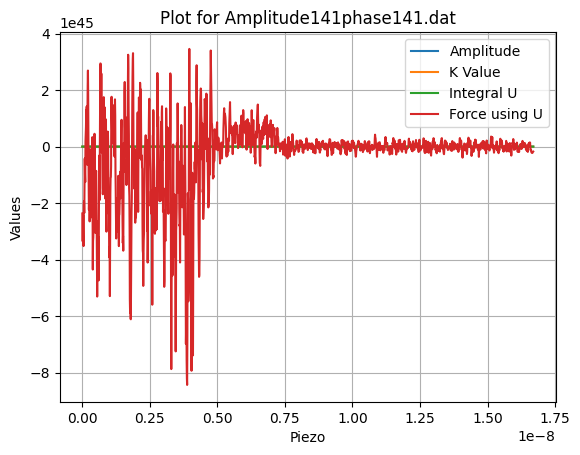

 read the .dat file processed 
           piezo     amplitude      phase
0  1.797320e-08  5.288198e-09 -90.000000
1  1.796418e-08  5.289130e-09 -89.989323
2  1.795517e-08  5.290001e-09 -89.978990
3  1.794616e-08  5.290810e-09 -89.969023
4  1.793714e-08  5.291556e-09 -89.959447
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.797320e-08  5.288198e-09 -90.000000  1.273381e-19   2.546762e-18   
1  1.796418e-08  5.289130e-09 -89.989323  3.874566e-07   7.749132e-06   
2  1.795517e-08  5.290001e-09 -89.978990  7.623288e-07   1.524658e-05   
3  1.794616e-08  5.290810e-09 -89.969023  1.123778e-06   2.247556e-05   
4  1.793714e-08  5.291556e-09 -89.959447  1.470965e-06   2.941929e-05   

     Integral_U  Force_using_U  
0  4.679250e+20  -1.579577e+44  
1  1.423774e+33  -1.553926e+44  
2  2.801304e+33  -1.500913e+44  
3  4.129510e+33  -1.444478e+44  
4  5.405305e+33  -1.384621e+44  


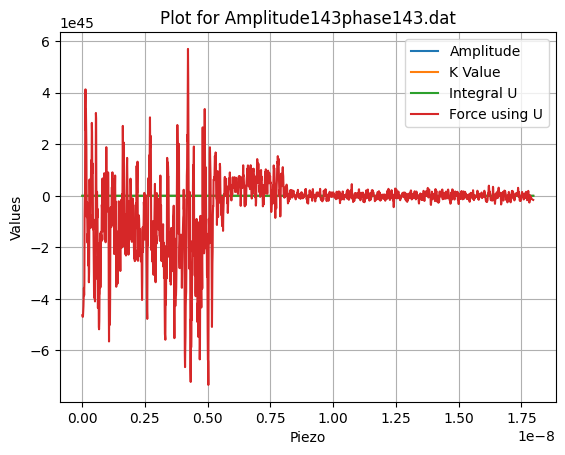

 read the .dat file processed 
           piezo     amplitude      phase
0  1.778391e-08  2.227188e-08 -90.000000
1  1.777490e-08  2.228668e-08 -89.991638
2  1.776588e-08  2.229882e-08 -89.985599
3  1.775687e-08  2.230850e-08 -89.981604
4  1.774786e-08  2.231590e-08 -89.979373
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.778391e-08  2.227188e-08 -90.000000  1.274302e-19   2.548604e-18   
1  1.777490e-08  2.228668e-08 -89.991638  3.035399e-07   6.070799e-06   
2  1.776588e-08  2.229882e-08 -89.985599  5.224559e-07   1.044912e-05   
3  1.775687e-08  2.230850e-08 -89.981604  6.670984e-07   1.334197e-05   
4  1.774786e-08  2.231590e-08 -89.979373  7.477413e-07   1.495483e-05   

     Integral_U  Force_using_U  
0  4.682634e+20  -1.237467e+44  
1  1.115408e+33  -1.064970e+44  
2  1.919851e+33  -7.410747e+43  
3  2.451364e+33  -4.592199e+43  
4  2.747700e+33  -2.191295e+43  


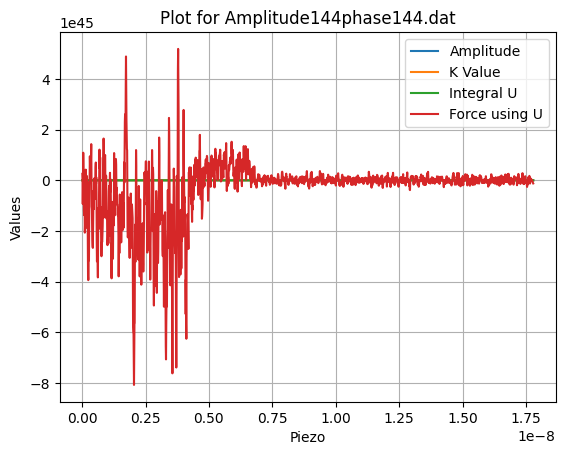

 read the .dat file processed 
           piezo     amplitude      phase
0  1.766673e-08  2.297547e-08 -90.000000
1  1.765772e-08  2.296454e-08 -90.043105
2  1.764871e-08  2.295489e-08 -90.075606
3  1.763969e-08  2.294644e-08 -90.098730
4  1.763068e-08  2.293912e-08 -90.113702
          piezo     amplitude      phase       K_value  Force_using_K  \
0  1.766673e-08  2.297547e-08 -90.000000  1.270380e-19   2.540761e-18   
1  1.765772e-08  2.296454e-08 -90.043105 -1.561572e-06  -3.123143e-05   
2  1.764871e-08  2.295489e-08 -90.075606 -2.740166e-06  -5.480332e-05   
3  1.763969e-08  2.294644e-08 -90.098730 -3.579555e-06  -7.159110e-05   
4  1.763068e-08  2.293912e-08 -90.113702 -4.123699e-06  -8.247397e-05   

     Integral_U  Force_using_U  
0  4.668225e+20   6.366191e+44  
1 -5.738255e+33   5.585533e+44  
2 -1.006920e+34   4.113442e+44  
3 -1.315367e+34   2.820182e+44  
4 -1.515322e+34   1.706453e+44  


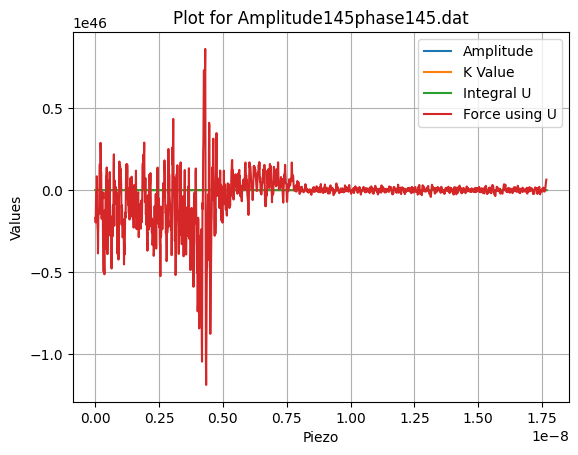

PermissionError: [Errno 13] Permission denied: 'E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\processdata\\processpotential'

In [1]:
import os
import pandas as pd
import numpy as np
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
pi_val = math.pi
c_z = 2.756  # N/m spring constant
fd = 72.7163e3
f0 = 72.7163e3
Qfactor = 241

# Define the functions
def Kvalue(A_i, P_i, aexc):
    k = (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    return k

def integration(A_i, P_i, aexc):
    k = (0.5) * ((aexc / A_i) * (math.cos((P_i * pi_val) / 180)) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    
    def u(t):  # Define the integrand function
        return 4 * c_z * k * (t ** 3 + ((((A_i) * (t ** 2)) / (16 * pi_val)) ** 0.5) + ((((A_i) ** 3) ** 0.5) / ((2) ** 0.5)))
    
    integral_value, error = quad(u, 0.001, 10e12, weight='cauchy', wvar=0)
    return integral_value

def Force_integrating_K(A_i, P_i, aexc, D_min):
    def k_exp(zeta=c_z):
        return (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2)) * (2 * zeta)
    
    integral_value, error = quad(k_exp, D_min, 10, weight='cauchy', wvar=0)
    return integral_value

def calculate_force_using_U(integral_U, piezo):
    # Numerical differentiation
    force_using_U = - np.gradient(integral_U, piezo)
    return force_using_U

# Directory paths
# directory_path =  
# fdata_path = data_path
directory_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\processdata\\"  # Change this to your directory containing the .dat files
output_directory = "processpotential\\"
# directory_name = "processdata\\"
directory_pathnew = os.path.join(directory_path,output_directory)
if not os.path.exists(directory_pathnew):
    # If not, create the directory
    os.makedirs(directory_pathnew)
    print(f"Directory '{output_directory}' created successfully.")
else:
    print(f"Directory '{output_directory}' already exists.")


# directory_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\curves on protein\\with 2000 points\\processdata\\"  # Change this to your directory containing the .dat files
# output_directory = "processpotential\\"

# # Create the output directory if it doesn't exist
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

listDatfiles = os.listdir(directory_path)
count = 0
for file in listDatfiles:
    count +=1
    df = pd.read_csv(directory_path+file,delimiter=' ')
#     df = pd.read_csv(directory_path+file), delimiter='')
    print(" read the .dat file processed \n", df.head(5))
    
    p = df['phase']  # p phase is a vector
    A = df['amplitude']
    piezo = df['piezo']
    aexc = max(A) / Qfactor
#     near_distance = piezo - A
    df['near_distance'] = df['piezo'] - df['amplitude']
    
    # Calculate k values using apply
    df['K_value'] = df.apply(lambda row: Kvalue(row['amplitude'], row['phase'], aexc), axis=1)
    
    # Calculate Force using K using apply
    D_min = min(piezo)
    df['Force_using_K'] = df.apply(lambda row: Force_integrating_K(row['amplitude'], row['phase'], aexc, D_min), axis=1)
    
    # Calculate integral U using apply
    df['Integral_U'] = df.apply(lambda row: integration(row['amplitude'], row['phase'], aexc), axis=1)
    
    # Calculate Force using U
    df['Force_using_U'] = calculate_force_using_U(df['Integral_U'], df['near_distance'])
    
    # Save the DataFrame to an Excel file
#     output_file_path = os.path.join(output_directory, f"{os.path.splitext(file)[0]}_potential.xlsx")
    output_file_path = os.path.join(directory_pathnew, f"{file[0:-4]}_potential.xlsx")
    
    print(df.head())
    df.to_excel(output_file_path, index=False)
    
#   Plot the data
    plt.figure()
    plt.plot(piezo, A, label='Amplitude')
    plt.xlabel('Piezo')
    plt.ylabel('amplitude')
    plt.show()
    plt.figure()
    plt.plot(piezo, df['K_value'], label='K Value')
    plt.show()
    plt.figure()
    plt.plot(piezo, df['Integral_U'], label='Integral U')
    plt.show()
    plt.figure()
    plt.plot(piezo, df['Force_using_U'], label='Force using U')
    plt.xlabel('Piezo')
    plt.ylabel('Values')
    plt.title(f'Plot for {file}')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Save the plot
#     plot_file_path = os.path.join(output_directory, f"{os.path.splitext(file)[0]}_plot.png")
#     plt.savefig(plot_file_path)
#     plt.close()

print("Processing complete.")

In [ ]:
"""Shift + Enter run the current cell, select below
Ctrl + Enter run selected cells
Alt + Enter run the current cell, insert below
Ctrl + S save and checkpoint"""

import pandas as pd
import numpy as np
import os
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt

# data_path = 
# excel_path = 
# excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
# excel_path = "/media/mrafik/Drive/python_programs/xlsfileprocess/"

# excel_path+filename
# here xls file is read
df = pd.read_csv(excel_path+filename,delimiter=' ')
# df = pd.read_excel(
#     '/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/FRAME_20230418.xls',
#     usecols='A:F')
print(" read the .dat file processed \n",df.head(5))

print(" ------------****** Reading of the data excel file is over ------------******\n")
p = df['phase']  # p phase is a vector
A = df['amplitude']         # A --> amplitude
pi_val = math.pi
c_z = 2.756  # --> it is in N/m spring constant , he was using 40
# c_z = 2.756e-9   # now in N/nm spring constant
fd = 72.7163e3
f0 = 72.7163e3
D_min = min(df['piezo'])
Qfactor = 241
aexc = max(A) / Qfactor 
# aexc = 220e-9/Qfactor

def Kvalue(A_i, P_i):
    """
    call the function in a loop, it will calculate the
    k value for each phase and amplitude value taken from the each data file.
    """
    k = (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    return k


# ********* code for potential U integration ***********
# import numpy as np

def integration(A_i, P_i):
    k = (0.5) * ((aexc / A_i) * (math.cos((P_i * pi_val) / 180)) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    
    def u(t):  ## Define the integrand function, t is time 
        return (4 * c_z * k * (t ** 3 + ((((A_i) * (t ** 2)) / 16 * pi_val) ** 0.5) + ((((A_i) ** 3) ** 0.5) / ((2) ** 0.5))))
    
    integral_value, error = quad(u, 0.001, 10e12, weight='cauchy', wvar=0)
    
#     integral_value, error = quad(u, 0, np.inf, weight='cauchy', wvar=0)
#     integral_value, error = quad(u, 0, np.inf)   # this is working 1st.
    #  print("The value of the integral and error is:", integral_value,error)
    #     print(integral_value,error)
    return integral_value

print("------------****** Integration is done ------------******\n ")
# ********* code for writing data in the file ***********


#*************** force using k expression.**********

def Force_integrating_K(A_i, P_i):
    def k_exp(zeta = c_z):
        return (0.5) * (((aexc / A_i) * (math.cos((P_i * pi_val) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))*(2*zeta)
    integral_value, error = quad(k_exp, D_min, 10, weight='cauchy', wvar=0)
    #     integral_value, error = quad(u, 0, np.inf, weight='cauchy', wvar=0)
#     integral_value, error = quad(u, 1, np.inf)   # this is working 1st.
    #     print("The value of the integral and error is:", integral_value,error)
#     print(integral_value,error)
    return integral_value

# ********* code for writing data in the file ***********

# potential= []
import csv
# Open the CSV file in write mode.
filename = "force_potentialkval.csv"
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["piezo", "potential(U)", "Kvalue","integral_usingK"]) 
    # Write the header row
    for i in range(len(p)):           # Write data in each iterative loop
        kval = Kvalue(A[i],p[i])
#         if i<3:
#             print("kval = ",kval)
        integral_U = integration(A[i], p[i])
#         print("after integration argument=",kval)
        Force_usingK = Force_integrating_K(A[i], p[i])
    
        writer.writerow([df['piezo'][i], df['amplitude'][i], integral_U, kval,Force_usingK])
        # Write the iteration and data as a row

print("Data saved in", filename)
csvfile.close()

# df_datoutspec = pd.read_csv(
#     '/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/spec_dataout_aniqadat.csv')
# df_datoutspec = pd.read

df_datoutspec = pd.read_csv('force_potentialkval.csv')

# df_datoutspec = pd.read_csv(
#     '/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/spec_dataout_aniqa.csv')
# df_datoutspec = pd.read_csv("spec_dataout_aniqa.csv")
# df_datoutspec.head(3)
print(f"------------****** data file: {filename} is created and data is read from the written file {filename} for plotting and analysis ------------****** ")
# df_idx = df_datoutspec['potential(U)'].idxmax()

# print("index of max = ",df_idx)
# print("val at max idx = ",iloc.df_datoutspec[df_idx,])

# ********** normalization ***********
# df_U = df_datoutspec['potential(U)']
# df_U =(df_U - df_U.min())/(df_U.max() - df_U.min())

# ********** normalization using std ***********
# df_U = df_datoutspec['potential(U)']
# df_U =(df_U - df_U.mean())/df_U.std()
# # df =(df - df.mean())/df.std()
# df_U


# df_datoutspec['potential(U)'].iloc[df_idx]  # to find the max value at the df_idx index(row)
# df_datoutspec.drop(df_idx,axis =0,inplace =True)
# k = []
# for i in range(len(p)):
# #      k1 = (0.5) * ((aexc / A[i]) * (math.cos((p[i] * pi) / 180)) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
#     val =  Kvalue(A[i],p[i])
#     k.append(val)

# df_datoutspec['potential(U)']

# ********* for plotting the Kvalue and U  ..

# df_plot = pd.read_csv('/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/spec_dataout_aniqa.csv')

fig1 = plt.figure("Figure 1")
# plt.figure(figsize=(4, 3))
plt.plot(df_datoutspec['piezo'],df_datoutspec['Kvalue'], '-b')
plt.xlabel('distance')
plt.ylabel('k value')
plt.title('K VALUES vs NUMBERS')
# plt.ylim([0.0010,0.0035])
plt.show()

print("plotting for k value is done")
# ********* for plotting U  ..

print("------------****** plotting for potential value is going on ..........")

fig2 = plt.figure("Figure 2")
# plt.figure(figsize=(4, 3))
# plt.plot(df_datoutspec['distance(D-A)(nm)'], df_U, '-r')
plt.plot(df_datoutspec['piezo'], df_datoutspec['potential(U)'], '-r')
plt.xlabel('distance(D)')
plt.ylabel('potential')
plt.title('potential vs piezo')

# plt.ylim([0.0010,0.0035])
# plt.xlim([-17.0,-14])
plt.show()

print(" ------------******  plotting for potential value is done ------------****** ")
# this is for the differentiation  for Force calculation *****
print("------------******  differentiation for force is going on ------------****** ")
# Convert dataframes to NumPy arrays

x = df_datoutspec['piezo'].values
# y = df_U.values
y = df_datoutspec['potential(U)']

# Perform numerical differentiation
dy_dx = np.gradient(y, x)

# Create a new dataframe for the differentiation result
differentiation_result = pd.DataFrame({'dy_dx': dy_dx})

# Plot the result
fig3 = plt.figure("Figure 3")
plt.plot(x, dy_dx, '-m')
plt.xlabel('Distance')
plt.ylabel('F = force(i.e. dU/dD)')
plt.title('Force = Numerical Differentiation Result')
# plt.xlim([-17.0,-16.4])
plt.show()


# ************** FORCE PLOTTED using K ********************

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# plt.plot(df_datoutspec['piezo'].sort_values(),df_datoutspec['integral_usingK'] , '. m')
# plt.plot(df_datoutspec['piezo'].sort_values(),df_datoutspec['integral_usingK'] , '. m')
plt.plot(df_datoutspec['piezo']*(1.0e9),df_datoutspec['integral_usingK'] , '.-m')
# plt.plot(df_datoutspec['integral_usingK'] , '-sm')
# plt.tight_layout
# plt.xlim([0.7e-8,1.4e-8]) # if Force plot is w.r.to Distance. 
# plt.xlim([10,30])  # if Force plot is without any Distance, just raw plot 
ll =  list(range(len(df['piezo'])))
xx=np.zeros(len(ll))

plt.plot(df_datoutspec['piezo']*(1.0e9),xx,'y-.')
# plt.tight_layout()
plt.xlabel('Distance(nm)')
plt.ylabel('F = force(i.e. dU/dD)')
plt.xlim([min(df_datoutspec['piezo']*(1.0e9)),max(df_datoutspec['piezo']*(1.0e9))]) # if Force plot is w.r.to Distance. 
plt.title('Force = Numerical Differentiation Result')

plt.show()

print("------------ program is executed ------------ ")

In [2]:
# ampfrominflexion2flat_nm.head()
name1 = 'ramu.xlsx'
name1
name1 = name1[:-5]
print(name1)
name2 = 'cena.xlsx'
name2 = name2[:-5]
print(name2)
newname = name1+name2+"hamaker.xlsx"
print(newname)

ramu
cena
ramucenahamaker.xlsx


In [ ]:
ampfrominflexion2flat_nm = ampfrominflexion2flat_nm.reset_index(drop=True)
phasefrominflexion2flat_degree = phasefrominflexion2flat_degree.reset_index(drop=True)
piezofrominflexion2flat_nm  = piezofrominflexion2flat_nm.reset_index(drop=True)
print("\n type of the amplitude:\n",(ampfrominflexion2flat_nm),ampfrominflexion2flat_nm.shape,
      "\n type of the phase:\n",phasefrominflexion2flat_degree,phasefrominflexion2flat_degree.shape,
      "\n type of the piezo:\n",piezofrominflexion2flat_nm,piezofrominflexion2flat_nm.shape)
# df.head()
# # df['phase']
# import pandas as pd
# import numpy as np
# import os

# def hamaker_save_data(,ampfrominflexion2flat_nm,phasefrominflexion2flat_degree,piezofrominflexion2flat_nm,K = 2.56,Q = 234,R = 10 * 10E-9,A0):
#     ampfrominflexion2flat_nm = ampfrominflexion2flat_nm.reset_index(drop=True)
#     phasefrominflexion2flat_degree = phasefrominflexion2flat_degree.reset_index(drop=True)
#     piezofrominflexion2flat_nm  = piezofrominflexion2flat_nm.reset_index(drop=True)
    
#     amp_df_meter = ampfrominflexion2flat_nm/1e9
#     piezo_df_meter = piezofrominflexion2flat_nm/1e9
#     phase_df_radian = np.radians(phasefrominflexion2flat_degree)    
# #     hamaker_values = ((-3 * K * A0) / (Q * R)) * ((df['amplitude'] ** 2) * np.cos(df['phase'])) * ((((df['piezo'] + df['amplitude']) / df['amplitude']) ** 2) - 1) ** 1.5
#     hamaker_values = ((-3 * K * A0) / (Q * R)) * ((amp_df_meter ** 2) * np.cos(phase_df_radian)) * ((((piezo_df_meter + amp_df_meter) / amp_df_meter) ** 2) - 1) ** 1.5
    
#     return hamaker_values

In [ ]:
# import pandas as pd
# import numpy as np
# import os

# def hamaker_save_data(data_path, ampfrominflexion2flat_nm, phasefrominflexion2flat_degree, piezofrominflexion2flat_nm, K=2.56, Q=234, R=10 * 10E-9, A0):
    
#     ampfrominflexion2flat_nm = ampfrominflexion2flat_nm.reset_index(drop=True)
#     phasefrominflexion2flat_degree = phasefrominflexion2flat_degree.reset_index(drop=True)
#     piezofrominflexion2flat_nm  = piezofrominflexion2flat_nm.reset_index(drop=True)
    
#     # Convert values to meters and radians
#     amp_df_meter = ampfrominflexion2flat_nm / 1e9
#     piezo_df_meter = piezofrominflexion2flat_nm / 1e9
#     phase_df_radian = np.radians(phasefrominflexion2flat_degree)

#     # Calculate Hamaker values
#     hamaker_values = ((-3 * K * A0) / (Q * R)) * ((amp_df_meter ** 2) * np.cos(phase_df_radian)) * ((((piezo_df_meter + amp_df_meter) / amp_df_meter) ** 2) - 1) ** 1.5

#     # Create DataFrame with columns 'piezo', 'amplitude', 'phase', and 'hamaker_values'
#     df = pd.DataFrame({
#         'piezo_meter': piezo_df_meter,
#         'amplitude_meter': amp_df_meter,
#         'phase_degree': phasefrominflexion2flat_degree,
#         'phase_rad': phase_df_radian,
#         'hamaker_values': hamaker_values
#     })

#     # Create directory 'hamaker_data' if it doesn't exist
#     hamaker_dir = os.path.join(data_path, 'hamaker_data')
#     if not os.path.exists(hamaker_dir):
#         os.makedirs(hamaker_dir)
    
#     # Save DataFrame to Excel file in 'hamaker_data' directory
    
#     excel_file_path = os.path.join(hamaker_dir, 'hamaker_data.xlsx')
#     df.to_excel(excel_file_path, index=False)


In [ ]:
# df_phase = df['phase']

# print("phase wd:",df_phase.head())
# df = df_phase/1e3
# print("phase after division by 1000:",df.head())


# print(" this is the A0: ",A0)
# print(df.dtype)
# data = {'column_name': [1000, 2000, 3000, 4000]}  # Example values in nanometers
# df = pd.DataFrame(data)

# # Convert nanometers to meters
# df['column_name'] = df['column_name'] / 1e9

# print(df)

In [ ]:
np.pi

In [ ]:
# import pandas as pd
# import numpy as np
# import os

# K = 2.56
# Q = 234
# R = 10 * 10E-9
# A0 = A0  # Example value for A0

# # Function to calculate Hawmaker constant
# def calculate_hamaker(df):
#     amp_df_meter = df['amplitude']/1e9
#     piezo_df_meter = df['piezo']/1e9
#     phase_df_radian = np.radians(df['phase'])
    
# #     hamaker_values = ((-3 * K * A0) / (Q * R)) * ((df['amplitude'] ** 2) * np.cos(df['phase'])) * ((((df['piezo'] + df['amplitude']) / df['amplitude']) ** 2) - 1) ** 1.5
#     hamaker_values = ((-3 * K * A0) / (Q * R)) * ((amp_df_meter ** 2) * np.cos(phase_df_radian)) * ((((piezo_df_meter + amp_df_meter) / amp_df_meter) ** 2) - 1) ** 1.5
#     return hamaker_values

# # Function to process each .dat file
# def process_dat_file(file_path):
#     # Read the .dat file into a DataFrame
# #     df = pd.read_csv(file_path, delim_whitespace=True, names=['piezo', 'amplitude', 'phase'])
#     df = pd.read_csv(file_path,delimiter=' ')
    
#     # Calculate Hawmaker constant
#     df['hawmaker'] = calculate_hawmaker(df)
    
#     return df

# # Function to process all .dat files in a directory
# def process_dat_files(directory):
#     for file in os.listdir(directory):
#         if file.endswith('.dat'):
#             file_path = os.path.join(directory,file)
#             df = process_dat_file(file_path)
            
#             # Save DataFrame to Excel file
#             excel_file_path = os.path.splitext(file_path)[0] + '_output.xlsx'
#             df.to_excel(excel_file_path, index=False)

# # Specify the directory containing .dat files
# # directory = 'path/to/your/dat/files'
# # directory_path
# directory = directory_path
# # Process .dat files
# process_dat_files(directory)


In [ ]:
# x = list(range(12))
# x1 = len(x)
# print(x1)
# y = list(range(7))
# y1= len(y)
# print(y1)

In [ ]:
# minimunmval = min(x1,y1)
# minimunmval

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def detect_inflexion_pointAfterAverage(ampdf,list_avg, consecutive_decrease_windowsize):
    ampdfAmplitudeColumn = np.array(ampdf['Amplitude'])
    # rows = ampdfAmplitudeColumn.shape[0]
    # flipampdfAmplitudeColumn = np.flip(ampdfAmplitudeColumn)
    # values  = ampdfAmplitudeColumn   # it is list or numpy array.
    # ampdfPiezoColumn = np.array(ampdf['Piezo'])
    # print(list_avg)  # <- 
    consecutive_decreases = consecutive_decrease_windowsize
#    
    num_decreases = 0
    inflexion_indexofAveragedAmplitude = None

    for i in range(1, len(list_avg)):
        print("just entered inside the for loop",i,len(list_avg))
        if list_avg[i] < list_avg[i-1]:  # Check if the current value is less than the previous one
            num_decreases += 1
            if i%20 == 0:
                print("modified check",num_decreases)
            
            # if num_decreases >= consecutive_decreases and (abs(list_avg[i] - list_avg[i-consecutive_decreases]) >= 0.0625125):
            if num_decreases >= consecutive_decreases:
                print("<------------------------!!!!----------------------------->",list_avg[i],list_avg[i-consecutive_decreases-1])
                inflexion_indexofAveragedAmplitude = i - consecutive_decreases + 1   # (<- it should be 1 less, index start from zero in actual.)
#                 inflexion_index = i - consecutive_decreases + 1
                # inflexion_indexofAveragedAmplitude = i - consecutive_decreases    # (<- it should be 1 less, index start from zero in actual.)
                
                break
        else:
            num_decreases = 0  # Reset the count 
    try:
        return inflexion_indexofAveragedAmplitude
    except :
        print("check the average window size :")
    finally:    
         print(f"please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None")
    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(list_avg)
plt.grid()
# from detect_inflexiondy_dxZero import detect_inflexion_pointAfterAverage
consecutive_decrease_windowsize = 3
ind = detect_inflexion_pointAfterAverage(ampdf,list_avg,consecutive_decrease_windowsize)

print("index result is :",ind)

In [ ]:
def div11(x,y):
#     print(x+y)
    z= x/y
    return z    
    
for i in range(10):
    try:
        print("loop no. ",i)
        res= div11(i,i-3)
        print(res)
    except:
        print("divide by zeros")
        print("loop no. in except -- ",i)
        continue
            

In [ ]:
for i in range(10):

    print("loop no. ",i)
    res= div11(i,i-3)
    print(res)

    print("divide by zeros")
    print("loop no. in except -- ",i)
    continue

In [ ]:
# print(ampdata2saveAspiezo_nm.shape)
# ampfrominflexion2flat_nm.shape
# phasefrominflexion2flat_degree.shape
# ampdata2saveAsAmplitude_nm.shape

Ediss = (pi.k.A^2/Q)((A0/A)*sin(phi)-1)

In [ ]:
# import numpy as np 
# xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

# x_diff = np.diff(ampdf['Piezo'])

# d_nm = 1000*x_diff[5]   # this is in nanometer now. 

# print("d in nm \t:",d_nm)

# count = 0
# for val in x_diff:
#     # just to check common differences between piezo values.
#     count = count+1
#     print(val)
#     if count ==5:
#         break
        
# plt.plot(list(range(len(x_diff))),x_diff)    
# # plt.ylim([0,10e-19])
# plt.show()

# print("max",max(x_diff)," \n min:",min(x_diff))
#     print()

In [ ]:
backward_MinimaBump_nmValue = 4.0
forward_MinimaBump_nmValue = 10.0

def convertpiezonm(backward_MinimaBump_nmValue,forward_MinimaBump_nmValue)
import numpy as np 
xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 
x_diff = np.diff(ampdf['Piezo'])
d_nm = 1000*x_diff[5]   # this is in nanometer now. 
# print("d in nm \t:",d_nm)
# count = 0
# for val in x_diff:
#     # just to check common differences between piezo values.
#     count = count+1
#     print(val)
#     if count ==5:
#         break
        
# plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# plt.show()
# #     print()


# here 2.5,3nm any value we put get corresponding N 
# backward_MinimaBump_nmValue = 4.0  # <------------- make it as argument in func.
N_count_back = (backward_MinimaBump_nmValue)/(d_nm)  # (using a+(n-1)D)

N_count_back = np.ceil(N_count_back)
print("n count back = ",N_count_back)

desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point
desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# desired_nmBackIndex

# now time to choose the data 3nm after the minima(bump):
# forward_MinimaBump_nmValue = 10.0     # <------------- make it as argument in func.
N_count_forward = (forward_MinimaBump_nmValue)/(d_nm)  # (using a+(n-1)D)
N_count_forward = np.ceil(N_count_forward)
data_choose_endindex = res_indices[1] + int(N_count_forward)
data_choose_endindex = data_endamp

print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
     "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# Perform linear regression for linear fitting

ampdf_x_nm = 1000*ampdf['Piezo'][desired_nmBackIndexwrtoInflexion:index_inflexion]
ampdf_y_nA = ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:index_inflexion]

coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

m, c = coefficients
# Print the results
print(f"m (slope in nA/nm ): {m}")
print(f"c, zero intercept nA (intercept): {c}")

ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# Plot the data and the linear fit
fig, ax1 = plt.subplots()
ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
ax1.set_xlabel('piezo(nm)')
ax1.set_ylabel('Amplitude(nm)',color='b')
ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
ax1.grid()
ax1.legend()

ax2= ax1.twinx()  # it will share the x axis --> twinx()
ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
ax2.set_xlabel('piezo(nm)')
ax2.set_ylabel('Amplitude(nA)',color='r')
ax2.tick_params('y',colors = 'r')
ax2.set_ylim([6,10])
# ax2.set_grid()
ax2.legend(loc=[0.02,0.79])
plt.title('Linear fitting of the ampltitude and piezo data')
plt.show()


# ************ ------------ this is working fine for me ----------------------******************
# same data but another figure 

fig
plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nA)')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()


# ----------------******************************* this is the final data we will save in .dat file .------------------
ampdata2saveAspiezo_nm = xpiezo_nm[desired_nmBackIndexwrtoInflexion:data_choose_endindex]
print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[desired_nmBackIndexwrtoInflexion] 

ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:data_choose_endindex]

ampdata2saveAsAmplitude_nm.shape
plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nm)')
plt.title('just to check before saving to .dat file')
# plt.legend()
plt.show()


# #  this is for the phase values:---------------------------------********


print(phasedf.iloc[0,1]) # first value added -- phasedf.iloc[0,1]
# last value add ---- > phasedf.iloc[data_endamp-1,1] 

phase  = - phasedf['Phase'] -90 + phasedf.iloc[data_endamp-1,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])

phasedata2savedegree = phase[desired_nmBackIndexwrtoInflexion:data_choose_endindex]

plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('phase(o)')
plt.title('PHASE in degree just to check before saving to .dat file')
# plt.legend()
plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)
from termcolor import colored

import pandas as pd
df1 = ampdata2saveAspiezo_nm*1E-9  #  converted to m 
df2 = ampdata2saveAsAmplitude_nm*1E-9 # converted to m 
df3 = phasedata2savedegree  #  in degree 
print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
combined_df = pd.concat([df1,df2,df3], axis=1)  
print(colored("Below this is before reverse and scientific notation and deletion: \n",'green', attrs=['bold']),combined_df.head())

# from here start process for 1. delete the first row 2. denote in the scientific notation 3. reverse and add header in combined_df

combined_df = combined_df.iloc[1:]   # 1.

combined_df = combined_df.apply(lambda x: x.apply(lambda y: f'{y:.9E}'))  # 2. Format data in scientific notation

combined_df = combined_df[::-1] # 3.-- Reverse DataFrame

combined_df.columns = ['piezo', 'amplitude', 'phase']   # 3.--- Add headers

print(colored("without heading or column index next we will see with index: \n",'green', attrs=['bold']),combined_df.head())
# Reset index
combined_df.reset_index(drop=True, inplace=True)

print(colored("after final procees:\n",'green', attrs=['bold']),combined_df.head())

# Concatenate the DataFrames vertically
# combined_df = pd.concat([df1,df2,df3], axis=1)
# Save the combined DataFrame to a .dat file


filename = filenameAmplitude.strip('.')[0:-5]+filenamephase.strip('.')[0:-5]+".dat"
combined_df.to_csv(excel_path+filename, sep=' ', index=False, header=True)

print(colored(f" \n HELLO ! <----------  file are saved in .dat format with name:{filename} ---------->  ",'green', attrs=['bold']))

# # Save the combined DataFrame to a .dat file
# combined_df.to_csv('combined_data.dat', sep=' ', index=False)


In [ ]:
# avg_window = 7
# list_avg = reverseArrayofAvgValuesWndsize(ampdf,phasedf,avg_window)

In [ ]:
# # <-------------------- main program is start from here --------------------------------->

# import pandas as pd
# import numpy as np 
# # from inflexionMinimadownbump import findDownBump 
# # excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
# excel_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\"
# # excel_path = "E:\\python_programs\\xlsfileprocess\\"

# filenameAmplitude = 'Amplitude40.xlsx'
# ampdf = pd.read_excel(excel_path+filenameAmplitude)
# ampdf= ampdf.set_axis(['Piezo','Amplitude'],axis='columns')
# print(ampdf.head(),"\n")
# #  ------------------------- phase -------------------- > 
# filenamephase = 'phase40.xlsx'
# phasedf = pd.read_excel(excel_path+filenamephase)
# phasedf=phasedf.set_axis(['Piezo','Phase'],axis='columns')
# print(phasedf.head(),"\n")
# print(ampdf.shape)
# # x= nm  , y= nA
# # <--------------------------- these two points are used later data_endamp and ampdfPiezoColumn  >
# data_endamp =ampdf.shape[0]
# print("end dat pints = \n",data_endamp)

# ampdfPiezoColumn = np.array(ampdf['Piezo'])
# print()

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(phasedf['Piezo'],phasedf['Phase'],'-r')
plt.legend('phase')
plt.xlabel('piezo')
plt.ylabel('Phase')
plt.grid() 
plt.subplot(1,2,2)
plt.plot(ampdf['Piezo'],ampdf['Amplitude'],'-b')
plt.legend('amplitude')
plt.xlabel('Piezo')
plt.ylabel('Amplitude')
plt.grid() 
plt.tight_layout()
plt.show()

In [ ]:
# ampdfAmplitudeColumn = np.array(ampdf['Amplitude'])
# rows = ampdfAmplitudeColumn.shape[0]
# type(rows)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
avg_window = 7  # choose any integer depends on the data.  
from reverseArrayOfAvgWindow import reverseArrayofAvgValuesWndsize
# avg_window = 10
list_avg = reverseArrayofAvgValuesWndsize(ampdf,phasedf,avg_window)


In [ ]:
from detect_inflexiondy_dxZero import detect_inflexion_pointAfterAverage

index = detect_inflexion_pointAfterAverage(ampdf,list_avg,consecutive_decrease_windowsize) 
inflexion_After_avg =  index

print("index of inflexion point w.r.to the average list(i.e. - avg_list) :",inflexion_After_avg,"<-->")

In [ ]:
 # plot --> To have a rough idea --- it works or not --->  
inflexion_index_afterAverage   = inflexion_After_avg
y_scatter_indexforavg = list_avg[inflexion_index_afterAverage]
print("Inflexion index:", inflexion_index_afterAverage)
plt.plot(list_avg)
plt.scatter(inflexion_index_afterAverage,y_scatter_indexforavg)
plt.grid()
plt.ylim([7,9.2])
plt.show()



# below I will calculate the actual inflexion point with the original index of the ampdf.
# <---------------- now Calculate the original index for that resversed Array and then conver back that point in Straight array also ----> 
inflexion_index_afterAverage_startZero =  inflexion_index_afterAverage-1
index_Actual_reverseArray = ((inflexion_index_afterAverage_startZero+ 1)* avg_window) - avg_window + 1 
last_index_ampdf = data_endamp # ampdfAmplitudeColumn.shape # <-- num of rows
# print("size of the ampdf[\"Amplitude\"] ", ampdfAmplitudeColumn.shape)
index_Actual_Array = last_index_ampdf - index_Actual_reverseArray + 1
final_Actual_index =  index_Actual_Array -1

print(" this the actual index from where we get flat amplitude almost ! --> ",final_Actual_index)
# main plot and inflexion point w.r.to main data 
y_actual = ampdfAmplitudeColumnarr[final_Actual_index]
x_scatter = ampdfPiezoColumnarr[final_Actual_index] 
# plt.figure
plt.plot(ampdfPiezoColumnarr,ampdfAmplitudeColumnarr,'-r',alpha=0.2)
plt.scatter(x_scatter,y_actual,marker ='<',s=100,alpha=0.8,label='Data(nm)')
plt.title(" it is final ")
plt.grid()
plt.show()


In [ ]:
 # plot --> To have a rough idea --- it works or not --->  
def findActualInflexion(inflexion_After_avg,list_avg,data_endamp,avg_window,ampdfAmplitudeColumnarr,ampdfPiezoColumnarr):

    inflexion_index_afterAverage   = inflexion_After_avg
    y_scatter_indexforavg = list_avg[inflexion_index_afterAverage]
    print("Inflexion index:", inflexion_index_afterAverage)
    plt.plot(list_avg)
    plt.scatter(inflexion_index_afterAverage,y_scatter_indexforavg)
    plt.grid()
    plt.ylim([7,9.2])
    plt.show()



    # below I will calculate the actual inflexion point with the original index of the ampdf.
    # <---------------- now Calculate the original index for that resversed Array and then conver back that point in Straight array also ----> 
    inflexion_index_afterAverage_startZero =  inflexion_index_afterAverage-1
    index_Actual_reverseArray = ((inflexion_index_afterAverage_startZero+ 1)* avg_window) - avg_window + 1 
    last_index_ampdf = data_endamp # ampdfAmplitudeColumn.shape # <-- num of rows
    # print("size of the ampdf[\"Amplitude\"] ", ampdfAmplitudeColumn.shape)
    index_Actual_Array = last_index_ampdf - index_Actual_reverseArray + 1
    final_Actual_index =  index_Actual_Array -1

    print(" this the actual index from where we get flat amplitude almost ! --> ",final_Actual_index)
    # main plot and inflexion point w.r.to main data 
    y_actual = ampdfAmplitudeColumnarr[final_Actual_index]
    x_scatter = ampdfPiezoColumnarr[final_Actual_index] 
    # plt.figure
    plt.plot(ampdfPiezoColumnarr,ampdfAmplitudeColumnarr,'-r',alpha=0.2)
    plt.scatter(x_scatter,y_actual,marker ='<',s=150,alpha=0.8,label='Data(nm)')
    plt.title(" it is final ")
    plt.grid()
    plt.show()
    return final_Actual_index

In [ ]:
# phasedf.head()
# print(ampdf.head())

In [ ]:
# ampdf= ampdf.set_axis(['Piezo','Amplitude'], axis ='columns')
print(ampdf.head())
print("\n ",ampdf.shape)

In [ ]:
phasedf= phasedf.set_axis(['Piezo','Phase'], axis ='columns')
print("\n",phasedf.head(),"\n",phasedf.shape,"\n")
print(phasedf.iloc[0,1])
phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])

In [ ]:
# import matplotlib.pyplot as plt

# plt.subplot(1,2,1)
# plt.plot(phasedf['Piezo'],phasedf['Phase'],'-r')
# plt.legend('phase')
# # plt.xlabel('piezo')
# plt.ylabel('Phase')
# plt.grid() 
# plt.subplot(1,2,2)
# plt.plot(ampdf['Piezo'],ampdf['Amplitude'],'-b')
# plt.legend('amplitude')
# plt.xlabel('Piezo')
# plt.ylabel('Amplitude')
# plt.grid() 
# plt.tight_layout()
# plt.show()

In [ ]:
# import numpy as np
# zero_indices = df.loc[df['Column1'] == 0].index
# Print the indices
# print("Indices where 'Column1' has zero values:", zero_indices)
# indices_zero = ampdf.loc[ampdf['Piezo'] >= 0].index
# print("index of indices_zero: ",indices_zero)
# zero_orFlatAmp = indices_zero[0]   # zero_orFlatAmp --> this will be used in future 
zero_orFlatAmp = final_Actual_index
print(zero_orFlatAmp )
# print(ampdf.iloc[322,0])
print(ampdf.iloc[final_Actual_index,0])

In [ ]:
# ampdf
# zero_orFlatAmp
# this is for the bump inflexion and bump minima only. above is for the inflexion in  the vicinity of the flat values.
from inflexionMinimadownbump import findDownBump 
res_indices = findDownBump(ampdf,zero_orFlatAmp)
index_inflexion = res_indices[0]
print("\n index_inflexion ---------->",index_inflexion)
index_minima = res_indices[1]
print("\n index_minima ---------->",index_minima)


In [ ]:
# index_inflexion = res_indices[0]
# print("index_inflexion",index_inflexion)
# index_minima = res_indices[1]
# print("index_minima",index_minima)

In [ ]:
import numpy as np 
xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

x_diff = np.diff(ampdf['Piezo'])

d_nm = 1000*x_diff[5]   # this is in nanometer now. 

print("d in nm \t:",d_nm)

count = 0
for val in x_diff:
    # just to check common differences between piezo values.
    count = count+1
    print(val)
    if count ==5:
        break
        
# plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# plt.show()
# #     print()

# here 2.5,3nm any value we put get corresponding N 

N_count_back = (4.0)/(d_nm)  # (using a+(n-1)D)

N_count_back = np.ceil(N_count_back)
print("n count back = ",N_count_back)

desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# desired_nmBackIndex

# now time to choose the data 3nm after the minima(bump):
N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
N_count_forward = np.ceil(N_count_forward)
data_choose_endindex = res_indices[1] + int(N_count_forward)
data_choose_endindex = data_endamp

print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
     "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# Perform linear regression for linear fitting

ampdf_x_nm = 1000*ampdf['Piezo'][desired_nmBackIndexwrtoInflexion:index_inflexion]
ampdf_y_nA = ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:index_inflexion]

coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

m, c = coefficients
# Print the results
print(f"m (slope in nA/nm ): {m}")
print(f"c, zero intercept nA (intercept): {c}")

ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# Plot the data and the linear fit
fig, ax1 = plt.subplots()
ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
ax1.set_xlabel('piezo(nm)')
ax1.set_ylabel('Amplitude(nm)',color='b')
ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
ax1.grid()
ax1.legend()

ax2= ax1.twinx()  # it will share the x axis --> twinx()
ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
ax2.set_xlabel('piezo(nm)')
ax2.set_ylabel('Amplitude(nA)',color='r')
ax2.tick_params('y',colors = 'r')
ax2.set_ylim([6,10])
# ax2.set_grid()
ax2.legend(loc=[0.02,0.79])
plt.title('Linear fitting of the ampltitude and piezo data')
plt.show()




# ************ ------------ this is working fine for me ----------------------******************
# same data but another figure 
fig
plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nA)')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()


# ----------------******************************* this is the final data we will save in .dat file .------------------
ampdata2saveAspiezo_nm = xpiezo_nm[desired_nmBackIndexwrtoInflexion:data_choose_endindex]
print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[desired_nmBackIndexwrtoInflexion] 

ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:data_choose_endindex]

ampdata2saveAsAmplitude_nm.shape
plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nm)')
plt.title('just to check before saving to .dat file')
# plt.legend()
plt.show()


# #  this is for the phase values:---------------------------------********


print(phasedf.iloc[0,1]) # first value added -- phasedf.iloc[0,1]
# last value add ---- > phasedf.iloc[data_endamp-1,1] 

phase  = - phasedf['Phase'] -90 + phasedf.iloc[data_endamp-1,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])

phasedata2savedegree = phase[desired_nmBackIndexwrtoInflexion:data_choose_endindex]

plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('phase(o)')
plt.title('PHASE in degree just to check before saving to .dat file')
# plt.legend()
plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)
from termcolor import colored

import pandas as pd
df1 = ampdata2saveAspiezo_nm*1E-9  #  converted to m 
df2 = ampdata2saveAsAmplitude_nm*1E-9 # converted to m 
df3 = phasedata2savedegree  #  in degree 
print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
combined_df = pd.concat([df1,df2,df3], axis=1)  
print(colored("Below this is before reverse and scientific notation and deletion: \n",'green', attrs=['bold']),combined_df.head())

# from here start process for 1. delete the first row 2. denote in the scientific notation 3. reverse and add header in combined_df

combined_df = combined_df.iloc[1:]   # 1.

combined_df = combined_df.apply(lambda x: x.apply(lambda y: f'{y:.9E}'))  # 2. Format data in scientific notation

combined_df = combined_df[::-1] # 3.-- Reverse DataFrame

combined_df.columns = ['piezo', 'amplitude', 'phase']   # 3.--- Add headers

print(colored("without heading or column index next we will see with index: \n",'green', attrs=['bold']),combined_df.head())
# Reset index
combined_df.reset_index(drop=True, inplace=True)

print(colored("after final procees:\n",'green', attrs=['bold']),combined_df.head())

# Concatenate the DataFrames vertically
# combined_df = pd.concat([df1,df2,df3], axis=1)
# Save the combined DataFrame to a .dat file


filename = filenameAmplitude.strip('.')[0:-5]+filenamephase.strip('.')[0:-5]+".dat"
combined_df.to_csv(excel_path+filename, sep=' ', index=False, header=True)

print(colored(f" \n HELLO ! <----------  file are saved in .dat format with name:{filename} ---------->  ",'green', attrs=['bold']))

# # Save the combined DataFrame to a .dat file
# combined_df.to_csv('combined_data.dat', sep=' ', index=False)


In [ ]:
# for i in range(20,26,1):
#     name = f"amplitude{i}.xlsx"
# #     name =filenameAmplitude
#     x=name.strip('.')[0:-5]
# #     print(name.strip('.')[0:-5])
#     print(x)
print(1E-9)

In [ ]:
# # # import pandas as pd
# # # dfx = pd.DataFrame(x)
# # # print("\n",dfx)
# # dfx = dfx[1:,0]
# # print("\n",dfx)
# # dfx = dfx[::-1]
# # print("\n",dfx)
# # # new_header = ['piezo','amplitude', 'phase']

# import pandas as pd

# # Sample DataFrame
# data = {
#     'piezo': [100.123456, 200.234567, 300.345678],
#     'Amplitude': [0.000123, 0.000234, 0.000345],
#     'phase': [10.123, 20.234, 30.345]
# }
# df = pd.DataFrame(data)

# # Delete first row
# df = df.iloc[1:]

# # Format data in scientific notation
# df = df.apply(lambda x: x.apply(lambda y: f'{y:.6E}'))

# # Reverse DataFrame
# df = df[::-1]

# # Add headers
# df.columns = ['piezo', 'Amplitude', 'phase']

# # Reset index
# df.reset_index(drop=True, inplace=True)

# print(df)



In [ ]:
# ##-------------*********************-this is another methode without triming from the left.*************

# import numpy as np 
# xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

# x_diff = np.diff(ampdf['Piezo'])
# d_nm = 1000*x_diff[8]   # this is in nanometer now. common difference.
# print("d in nm \t:",d_nm)

# # count = 0
# # for val in x_diff:
# #     # just to check common differences between piezo values.
# #     count = count+1
# #     print(val)
# #     if count ==5:
# #         break
        
# # plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# # plt.show()
# # #     print()

# # here 2.5,3nm any value we put get corresponding N 

# # N_count_back = (4.0)/(d_nm)  #(using a+(n-1)D)

# # N_count_back = np.ceil(N_count_back)
# # print("n count back = ",N_count_back)

# # desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

# # desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# # # desired_nmBackIndex

# # now time to choose the data 3nm after the minima(bump):
# N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
# N_count_forward = np.ceil(N_count_forward)
# data_choose_endindex = res_indices[1] + int(N_count_forward)


# # print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
# #      "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

# # desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
# # desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



# ##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# # Perform linear regression for linear fitting
# start_slice = 5
# ampdf_x_nm = 1000*ampdf['Piezo'][start_slice:index_inflexion]
# ampdf_y_nA = ampdf['Amplitude'][start_slice:index_inflexion]

# coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

# m, c = coefficients
# # Print the results
# print(f"m (slope in nA/nm ): {m}")
# print(f"c, zero intercept nA (intercept): {c}")

# ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

# poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# # Plot the data and the linear fit
# fig, ax1 = plt.subplots()
# ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
# ax1.set_xlabel('piezo(nm)')
# ax1.set_ylabel('Amplitude(nm)',color='b')
# ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
# ax1.grid()
# ax1.legend()

# ax2= ax1.twinx()  # it will share the x axis --> twinx()
# ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
# ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
# ax2.set_xlabel('piezo(nm)')
# ax2.set_ylabel('Amplitude(nA)',color='r')
# ax2.tick_params('y',colors = 'r')
# ax2.set_ylim([6,10])
# # ax2.set_grid()
# ax2.legend(loc=[0.02,0.79])
# plt.title('Linear fitting of the ampltitude and piezo data')
# plt.show()




# # ************ ------------ this is working fine for me ----------------------******************
# # same data but another figure 
# fig
# plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

# plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

# plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('Amplitude(nA)')
# plt.title('Linear fitting of the ampltitude and piezo data')
# plt.legend()
# plt.show()


# # ************************** this is the finsl data we will save in .dat file .------------------
# ampdata2saveAspiezo_nm = xpiezo_nm[start_slice:data_choose_endindex]
# # ampdata2saveAspiezo_nm.shape
# # print(ampdata2saveAspiezo_nm.head())
# # ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[start_slice]
# # print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][start_slice:data_choose_endindex]
# print(" size of the data \n",ampdata2saveAsAmplitude_nm.shape)



# plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('Amplitude(nm)')
# plt.title('just to check before saving to .dat file')
# # plt.legend()
# plt.show()


# #  this is for the phase values:---------------------------------********


# print(phasedf.iloc[0,1])
# phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
# print("\n", phase.shape)
# print("\n new phase values: \n", phase[0:5])

# phasedata2savedegree = phase[start_slice:data_choose_endindex]

# plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('phase(o)')
# plt.title('PHASE in degree just to check before saving to .dat file')
# # plt.legend()
# plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)

# import pandas as pd
# df1 = ampdata2saveAspiezo_nm
# df2 = ampdata2saveAsAmplitude_nm
# df3 = phasedata2savedegree
# print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
# # Concatenate the DataFrames vertically
# combined_df = pd.concat([df1,df2,df3], axis=1)
# # Save the combined DataFrame to a .dat file
# combined_df.to_csv(excel_path+'finalcombined_data.dat', sep=' ', index=False, header=False)



# # # Save the combined DataFrame to a .dat file
# # combined_df.to_csv('combined_data.dat', sep=' ', index=False)


    #                  <------------------- project is ended ------------------->